<a href="https://colab.research.google.com/github/thepankaj018/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [90]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from scipy.stats import skew


In [91]:
pd.set_option('display.max_columns', None)

### Dataset Loading

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
# Load Dataset
file_path = "/content/drive/MyDrive/SeoulBikeData.csv"
df = pd.read_csv(file_path,encoding= 'unicode_escape')

### Dataset First View

In [94]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [95]:
# Dataset Rows & Columns count
print(f'number of rows in dataframe are {df.shape[0]}')
print(f'number of columns in dataframe are {df.shape[1]}')

number of rows in dataframe are 8760
number of columns in dataframe are 14


### Dataset Information

In [96]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [97]:
# Dataset Duplicate Value Count
print(f'number of duplicates values are {df.duplicated().sum()}')

number of duplicates values are 0


#### Missing Values/Null Values

In [98]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

####No Missing values are present in the dataframe. 

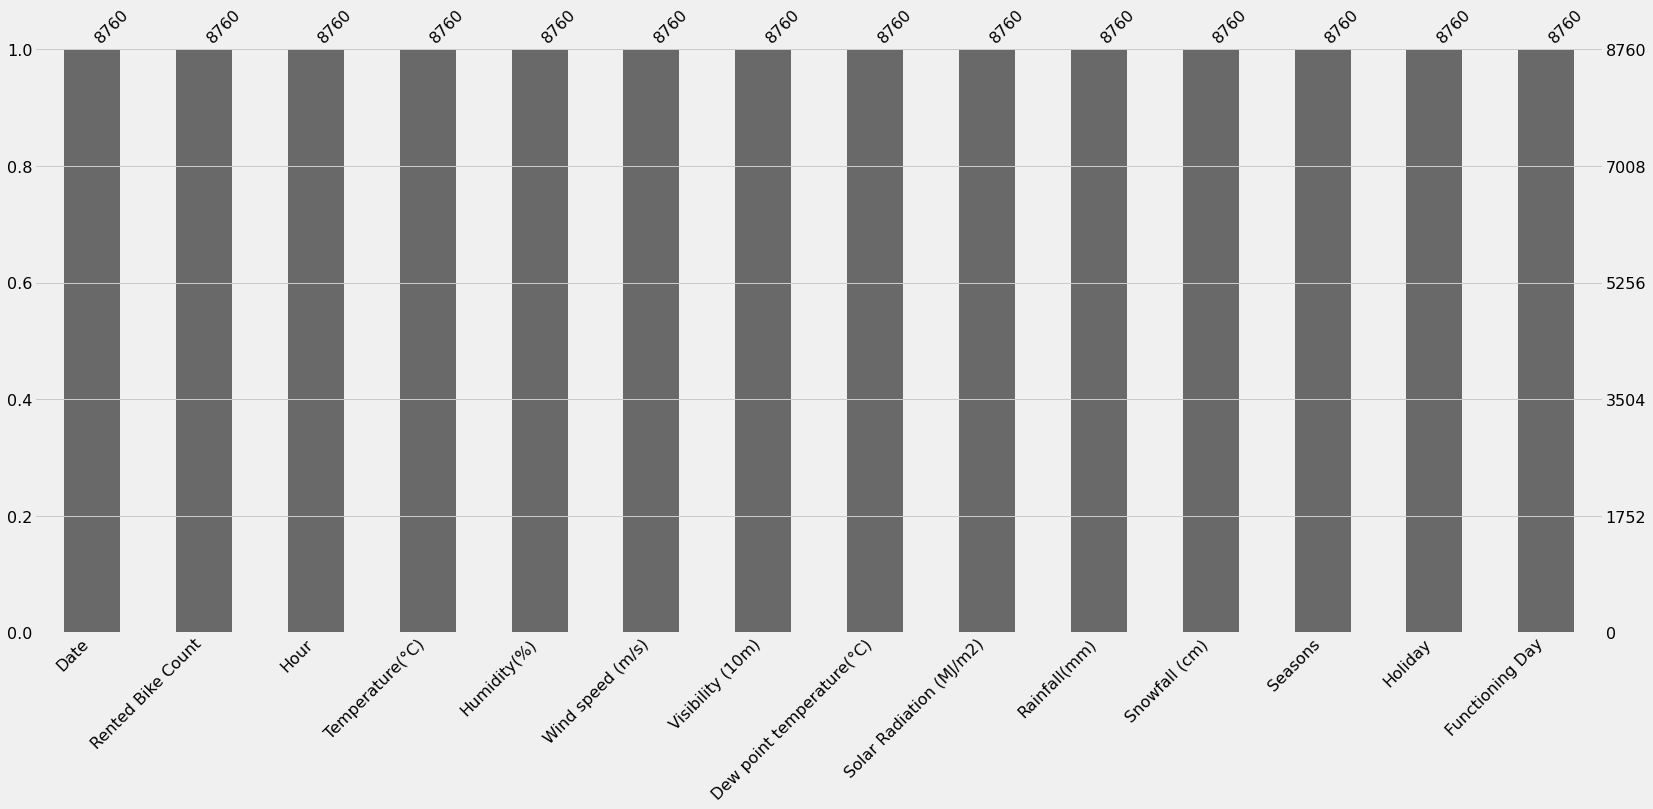

In [99]:
# Visualizing the missing values
import missingno as msno
msno.bar(df)
plt.show()

###ABOUT MISSINGNO LIBRARY - Missingno provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows us to get a quick visual summary of the completeness (or lack thereof) of our dataset. 

### It is clearly seen from the above visualization that there is no missing value present in the datasets.

### What did you know about your dataset?

###1) There are 8760 rows and 14 columns present in dataset.
###2) Datatypes of variables present in datasets are integer,float and object.
###3) There is no duplicate entries in the dataset.
###4) There is no missing values present in the datasets.

## ***2. Understanding Your Variables***

In [100]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [101]:
# Dataset Describe
df.describe().T.style.background_gradient(cmap='RdPu')

### Variables Description 


*  Date : year-month-day
*  Rented Bike count - Count of bikes rented at each hour
*  Hour - Hour of the day
*  Temperature-Temperature in Celsius
*  Humidity - %
*  Windspeed - m/s
*  Visibility - 10m
*  Dew point temperature - Celsius
*  Solar radiation - MJ/m2
*  Rainfall - mm
*  Snowfall - cm
*  Seasons - Winter, Spring, Summer, Autumn
*  Holiday - Holiday/No holiday
*  Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [102]:
# Check Unique Values for each variable.
for elem in df.columns:
  print("-"*100)
  print(" ")
  print(f'Unique values present in {elem} are')
  print(" ")
  print(df[elem].unique())
  print(" ")
  print("*"*100)

----------------------------------------------------------------------------------------------------
 
Unique values present in Date are
 
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '0

## 3. ***Data Wrangling***

### Data Wrangling Code

In [103]:
# Write your code to make your dataset analysis ready.

In [104]:
# Converting column Date into datetime64[ns] format
df['Date'] = pd.to_datetime(df['Date'])

In [105]:
# Separating Day,Month.Year from dataframe column.
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [106]:
# Dropping Date columns
df.drop("Date",axis = 1,inplace = True)

In [107]:
# Sorting columns by datatypes.
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Rented Bike Count', 'Hour', 'Humidity(%)', 'Visibility (10m)', 'Day', 'Month', 'Year'], float64: ['Temperature(°C)', 'Wind speed (m/s)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'], object: ['Seasons', 'Holiday', 'Functioning Day']}

In [108]:
# Separating Numerical and Categorical column
numerical_features = df.describe().columns.tolist()
categorical_features = list(set(df.columns.tolist()) - set(numerical_features))

In [109]:
numerical_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Year']

In [110]:
categorical_features

['Holiday', 'Functioning Day', 'Seasons']

### What all manipulations have you done and insights you found?

####1)Converted column Date into datetime64[ns] format.
####2)Separated Day,Month.Year from dataframe columns.
####3)Dropped Date columns.
####4)Separated Numerical and Categorical columns.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

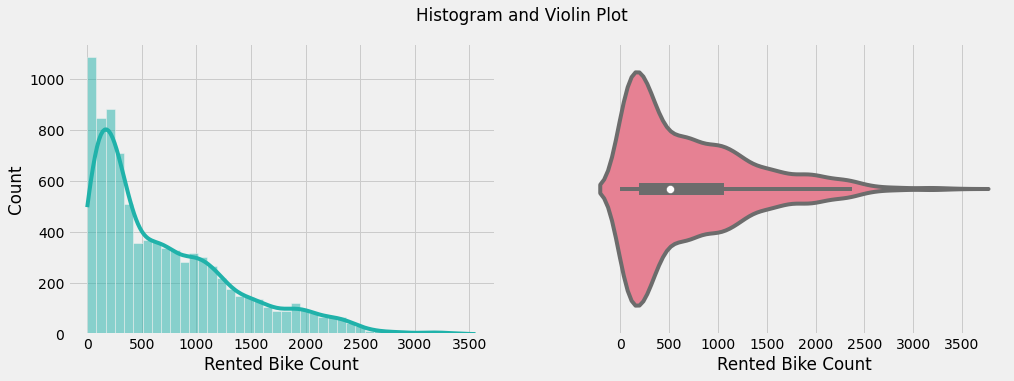


Mean is 704.6020547945205 & median is 504.5

Skewness of data are :1.1534281773679014


In [111]:
# Chart - 1 visualization 
# Create a subplot with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Create a histogram in the first subplot
sns.histplot(data=df,x = 'Rented Bike Count',kde = True, color = 'lightseagreen',ax=ax1)

# Create a violin plot in the second subplot
sns.violinplot(data=df,x = 'Rented Bike Count' ,color='#1f77b4',palette = 'husl' ,ax=ax2)

# Add a title to the figure
fig.suptitle("Histogram and Violin Plot")

# Show the plot
plt.show() 

print("")
mean = df['Rented Bike Count'].mean()
median = df['Rented Bike Count'].median()
skewness = df['Rented Bike Count'].skew()
print(f'Mean is {mean} & median is {median}')
print('')
print(f'Skewness of data are :{skewness}')

##### 1. Why did you pick the specific chart?

I Have used Histplot and Violin Plot because these plot helps us to understand the distribution of the number of rented bikes. The histogram can show us the overall distribution of the number of rented bikes and how it is spread across different intervals. The violin plot can show us the distribution of the number of rented bikes across different groups and also gives a sense of the density of the rented bikes at different values. This can be useful to understand the patterns in rented bike count and also help to identify any outliers or skewness in the data.






##### 2. What is/are the insight(s) found from the chart?

The histogram and violin plot show that the mean of the data is 729 and the median is 542. This suggests that the data may be skewed to the right, as the mean is greater than the median. The skewness of 1.139 confirms this, as a skewness value greater than 0 indicates a right-skewed distribution.Also it is important to note that most of the data points are in the range of (0,500].

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the histogram and violin plot of the bike rental count data can be useful in identifying patterns and trends in the usage of the bikes. The right skew in the data with a skewness of 1.139 suggests that the majority of rented bike counts are lower than the mean of 729, and there are a relatively small number of counts that are much higher than the mean. This could indicate that a small number of locations or times have much higher usage than the rest, which could inform decisions about where to allocate more bikes or staff to ensure that bikes are available when demand is high. Additionally, it could also inform decisions about how to market and promote the bike rental service to increase usage at locations or times where usage is lower.

#### Chart - 2

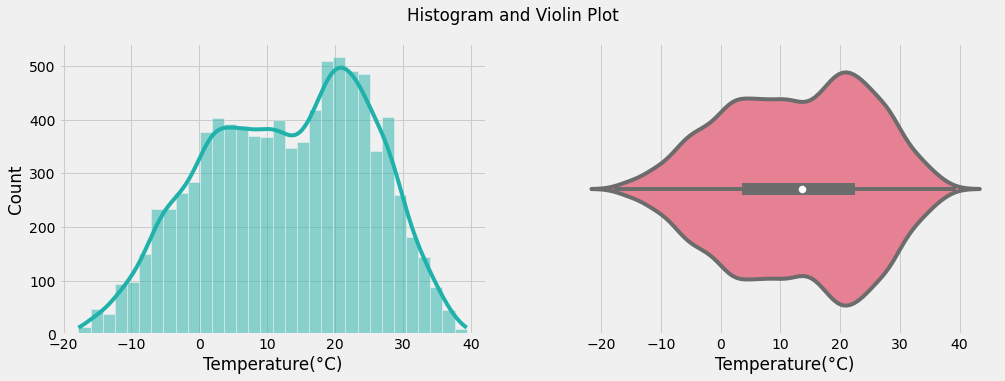


Mean is 12.882922374429223 & median is 13.7

Skewness of data are :-0.19832553450003293


In [112]:
# Chart - 2 visualization code
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Create a histogram in the first subplot
sns.histplot(data=df,x = 'Temperature(°C)',kde = True, color = 'lightseagreen',ax=ax1)

# Create a violin plot in the second subplot
sns.violinplot(data=df,x = 'Temperature(°C)' ,color='#1f77b4',palette = 'husl' ,ax=ax2)

# Add a title to the figure
fig.suptitle("Histogram and Violin Plot")

# Show the plot
plt.show() 

print("")
mean = df['Temperature(°C)'].mean()
median = df['Temperature(°C)'].median()
skewness = df['Temperature(°C)'].skew()
print(f'Mean is {mean} & median is {median}')
print('')
print(f'Skewness of data are :{skewness}')

##### 2. What is/are the insight(s) found from the chart?

The histogram and violin plot of the temperature data show that the mean of the data is 12.77 and the median is 13.5. This suggests that the data is relatively symmetric, as the mean is close to the median. The skewness of -0.1745 confirms this, as a skewness value close to 0 indicates a relatively normal distribution.

#### Chart - 3

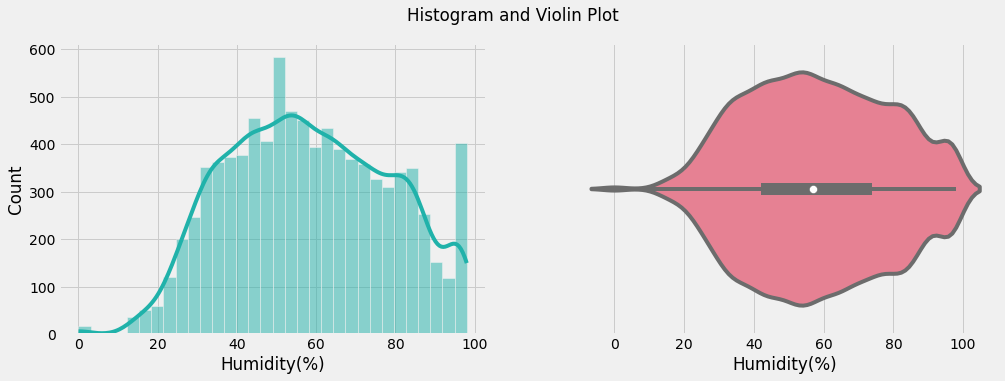


Mean is 58.226255707762554 & median is 57.0

Skewness of data are :0.05957897257708239


In [113]:
# Chart - 3 visualization code
# Create a subplot with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Create a histogram in the first subplot
sns.histplot(data=df,x = 'Humidity(%)',kde = True, color = 'lightseagreen',ax=ax1)

# Create a violin plot in the second subplot
sns.violinplot(data=df,x = 'Humidity(%)' ,color='#1f77b4',palette = 'husl' ,ax=ax2)

# Add a title to the figure
fig.suptitle("Histogram and Violin Plot")

# Show the plot
plt.show() 

print("")
mean = df['Humidity(%)'].mean()
median = df['Humidity(%)'].median()
skewness = df['Humidity(%)'].skew()
print(f'Mean is {mean} & median is {median}')
print('')
print(f'Skewness of data are :{skewness}')

##### 2. What is/are the insight(s) found from the chart?

The histogram and violin plot of the humidity data show that the mean of the data is 58.147 and the median is 57.0. This suggests that the data is relatively symmetric, as the mean is close to the median. The skewness of 0.068 confirms this, as a skewness value close to 0 indicates a relatively symmetric distribution. The violin plot shows the distribution of the data and its density, which may provide additional insights into the data such as the presence of outliers or multiple modes.

#### Chart - 4

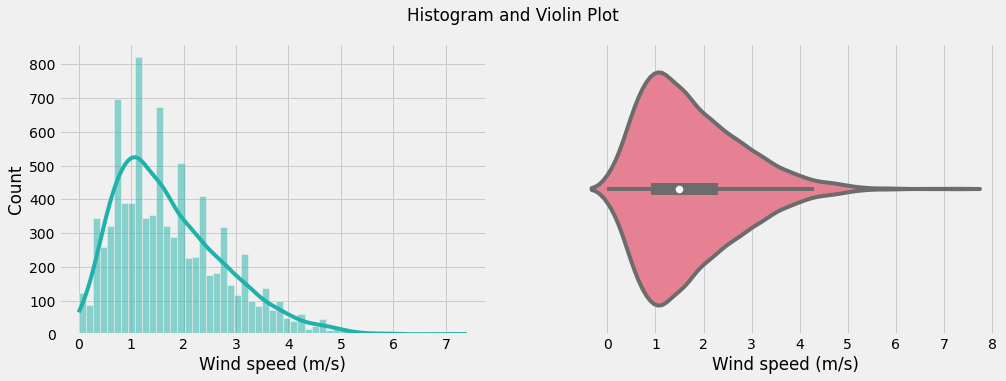


Mean is 1.7249086757990868 & median is 1.5

Skewness of data are :0.8909547980299266


In [114]:
# Chart - 4 visualization code
# Create a subplot with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Create a histogram in the first subplot
sns.histplot(data=df,x = 'Wind speed (m/s)',kde = True, color = 'lightseagreen',ax=ax1)

# Create a violin plot in the second subplot
sns.violinplot(data=df,x = 'Wind speed (m/s)' ,color='#1f77b4',palette = 'husl' ,ax=ax2)

# Add a title to the figure
fig.suptitle("Histogram and Violin Plot")

# Show the plot
plt.show() 

print("")
mean = df['Wind speed (m/s)'].mean()
median = df['Wind speed (m/s)'].median()
skewness = df['Wind speed (m/s)'].skew()
print(f'Mean is {mean} & median is {median}')
print('')
print(f'Skewness of data are :{skewness}')

##### 2. What is/are the insight(s) found from the chart?

The histogram and violin plot of the wind speed data reveal that the majority of the wind speeds are lower than the mean of 1.725, with a relatively small number of higher wind speeds. This is confirmed by the skewness value of 0.89, which is greater than 0, indicating a right-skewed distribution.

#### Chart - 5

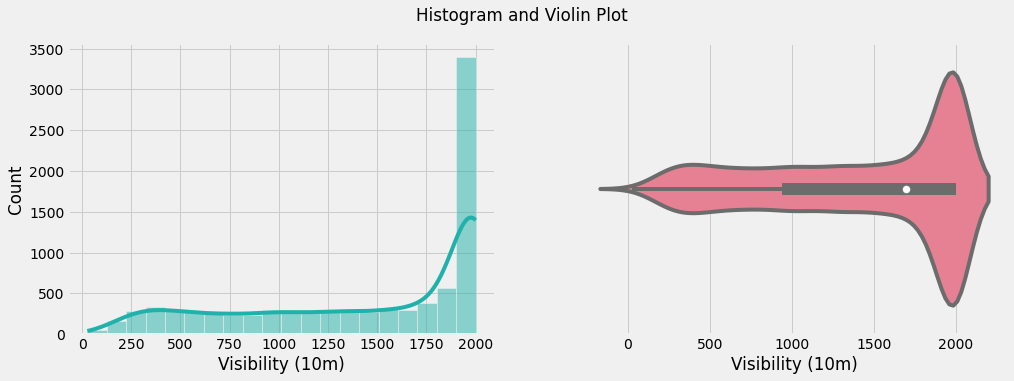


Mean is 1436.825799086758 & median is 1698.0

Skewness of data are :-0.7017864489502947


In [115]:
# Chart - 5 visualization code
# Create a subplot with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Create a histogram in the first subplot
sns.histplot(data=df,x = 'Visibility (10m)',kde = True, color = 'lightseagreen',ax=ax1)

# Create a violin plot in the second subplot
sns.violinplot(data=df,x = 'Visibility (10m)' ,color='#1f77b4',palette = 'husl' ,ax=ax2)

# Add a title to the figure
fig.suptitle("Histogram and Violin Plot")

# Show the plot
plt.show() 

print("")
mean = df['Visibility (10m)'].mean()
median = df['Visibility (10m)'].median()
skewness = df['Visibility (10m)'].skew()
print(f'Mean is {mean} & median is {median}')
print('')
print(f'Skewness of data are :{skewness}')

##### 2. What is/are the insight(s) found from the chart?

The histogram and violin plot of the visibility data show that the mean of the data is 1433.87 and the median is 1690.0. This suggests that the data is skewed to the left, as the mean is less than the median. The skewness of -0.69 confirms this, as a skewness value less than 0 indicates a left-skewed distribution

#### Chart - 6

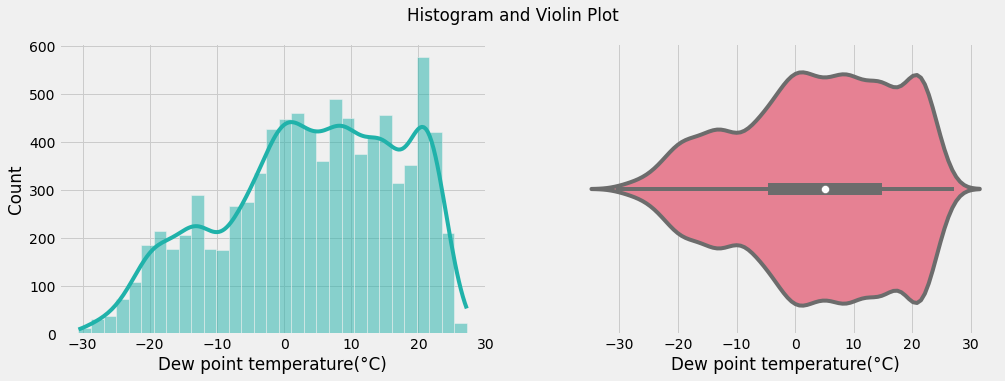


Mean is 4.073812785388128 & median is 5.1

Skewness of data are :-0.3672984396624286


In [116]:
# Chart - 6 visualization code
# Create a subplot with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Create a histogram in the first subplot
sns.histplot(data=df,x = 'Dew point temperature(°C)',kde = True, color = 'lightseagreen',ax=ax1)

# Create a violin plot in the second subplot
sns.violinplot(data=df,x = 'Dew point temperature(°C)' ,color='#1f77b4',palette = 'husl' ,ax=ax2)

# Add a title to the figure
fig.suptitle("Histogram and Violin Plot")

# Show the plot
plt.show() 

print("")
mean = df['Dew point temperature(°C)'].mean()
median = df['Dew point temperature(°C)'].median()
skewness = df['Dew point temperature(°C)'].skew()
print(f'Mean is {mean} & median is {median}')
print('')
print(f'Skewness of data are :{skewness}')


##### 2. What is/are the insight(s) found from the chart?

The histogram and violin plot of the dew point temperature data reveal that the majority of the temperature values are higher than the mean of 3.944, with relatively fewer lower temperature values. This is confirmed by the skewness value of -0.33, which is less than 0, indicating a left-skewed distribution

#### Chart - 7

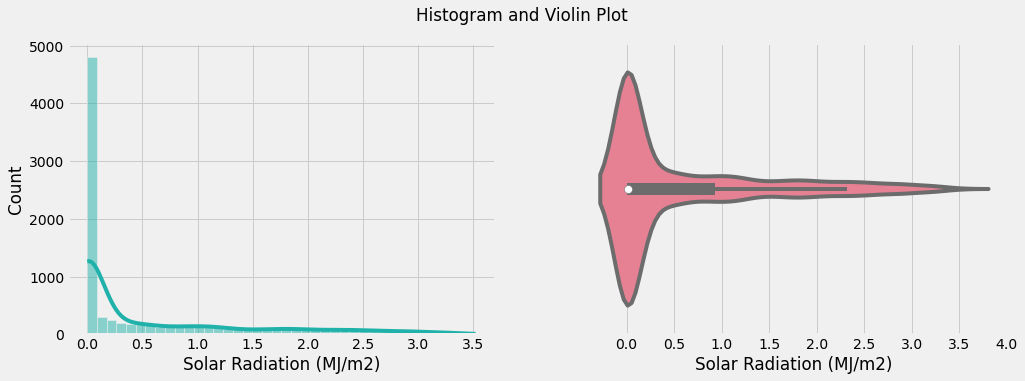


Mean is 0.5691107305936072 & median is 0.01

Skewness of data are :1.5040397173602802


In [117]:
# Chart - 7 visualization code
# Create a subplot with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Create a histogram in the first subplot
sns.histplot(data=df,x = 'Solar Radiation (MJ/m2)',kde = True, color = 'lightseagreen',ax=ax1)

# Create a violin plot in the second subplot
sns.violinplot(data=df,x = 'Solar Radiation (MJ/m2)' ,color='#1f77b4',palette = 'husl' ,ax=ax2)

# Add a title to the figure
fig.suptitle("Histogram and Violin Plot")

# Show the plot
plt.show() 

print("")
mean = df['Solar Radiation (MJ/m2)'].mean()
median = df['Solar Radiation (MJ/m2)'].median()
skewness = df['Solar Radiation (MJ/m2)'].skew()
print(f'Mean is {mean} & median is {median}')
print('')
print(f'Skewness of data are :{skewness}')

##### 2. What is/are the insight(s) found from the chart?

From the chart, it appears that the data is highly skewed towards the right, with the mean much higher than the median. This suggests that there are a few outliers in the data, which should be examined further. Additionally, the higher mean indicates that most of the data points are high, while the lower median implies that there is less variability in the data.

#### Chart - 8

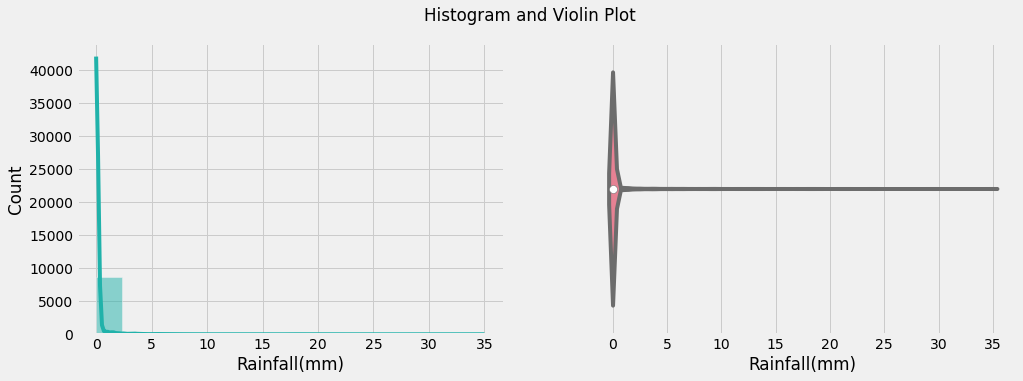


Mean is 0.14868721461187215 & median is 0.0

Skewness of data are :14.5332322425467


In [118]:
# Chart - 8 visualization code
# Create a subplot with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Create a histogram in the first subplot
sns.histplot(data=df,x = 'Rainfall(mm)',kde = True, color = 'lightseagreen',ax=ax1)

# Create a violin plot in the second subplot
sns.violinplot(data=df,x = 'Rainfall(mm)' ,color='#1f77b4',palette = 'husl' ,ax=ax2)

# Add a title to the figure
fig.suptitle("Histogram and Violin Plot")

# Show the plot
plt.show() 

print("")
mean = df['Rainfall(mm)'].mean()
median = df['Rainfall(mm)'].median()
skewness = df['Rainfall(mm)'].skew()
print(f'Mean is {mean} & median is {median}')
print('')
print(f'Skewness of data are :{skewness}')

##### 2. What is/are the insight(s) found from the chart?

The histogram and violin plot of the rainfall data show that the mean of the data is 0.149 and the median is 0.0. This suggests that the data is heavily skewed to the right, as the mean is much greater than the median. The skewness of 14.61 confirms this, as a skewness value greater than 10 indicates a high degree of skewness.

#### Chart - 9

In [119]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day', 'Month', 'Year'],
      dtype='object')

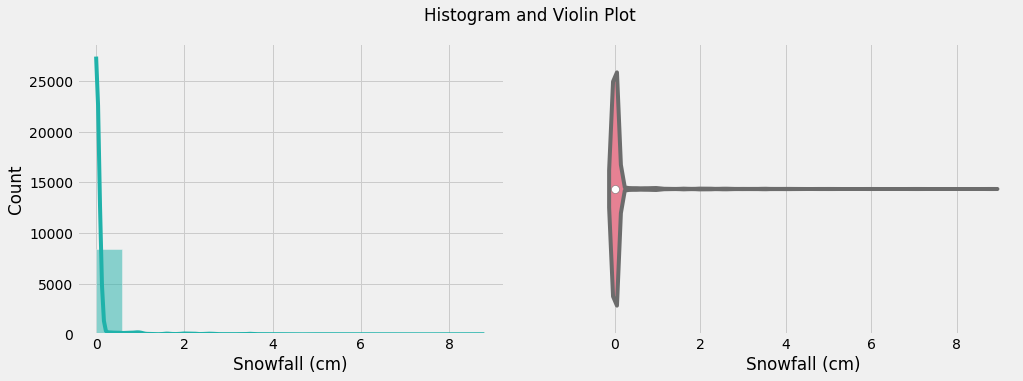


Mean is 0.07506849315068494 & median is 0.0

Skewness of data are :8.440800781484777


In [120]:
# Chart - 9 visualization code
# Create a subplot with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Create a histogram in the first subplot
sns.histplot(data=df,x = 'Snowfall (cm)',kde = True, color = 'lightseagreen',ax=ax1)

# Create a violin plot in the second subplot
sns.violinplot(data=df,x = 'Snowfall (cm)' ,color='#1f77b4',palette = 'husl' ,ax=ax2)

# Add a title to the figure
fig.suptitle("Histogram and Violin Plot")

# Show the plot
plt.show() 

print("")
mean = df['Snowfall (cm)'].mean()
median = df['Snowfall (cm)'].median()
skewness = df['Snowfall (cm)'].skew()
print(f'Mean is {mean} & median is {median}')
print('')
print(f'Skewness of data are :{skewness}')


##### 2. What is/are the insight(s) found from the chart?

The histogram and violin plot of the snowfall data show that the mean of the data is 0.077 and the median is 0.0. This suggests that the data is heavily skewed to the right, as the mean is much greater than the median. The skewness of 8.29 confirms this, as a skewness value greater than 10 indicates a high degree of skewness.

#### Chart - 10

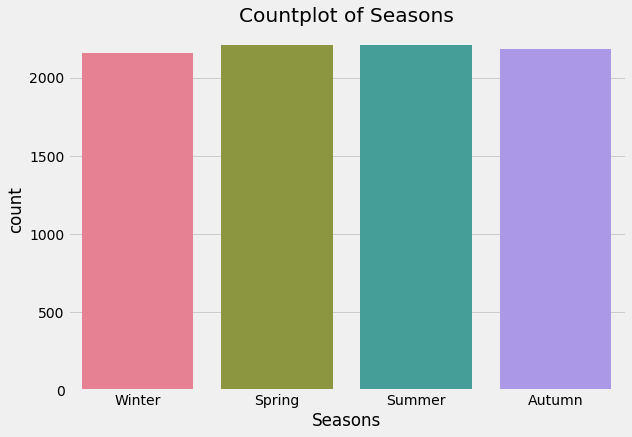

In [121]:
# Chart - 10 visualization code
sns.catplot(data = df,x = 'Seasons',kind = 'count',aspect = 1.5,height = 6,palette='husl')
plt.title('Countplot of Seasons')
plt.show()

##### 1. Why did you pick the specific chart?

I have used count plot because Count plots can be useful in understanding the frequency or count of each category in the dataset. It makes it easy to compare the relative frequencies of each category, which can provide insights into patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

All these four categories available in the dataset have more or less equal frequency.

#### Chart - 11

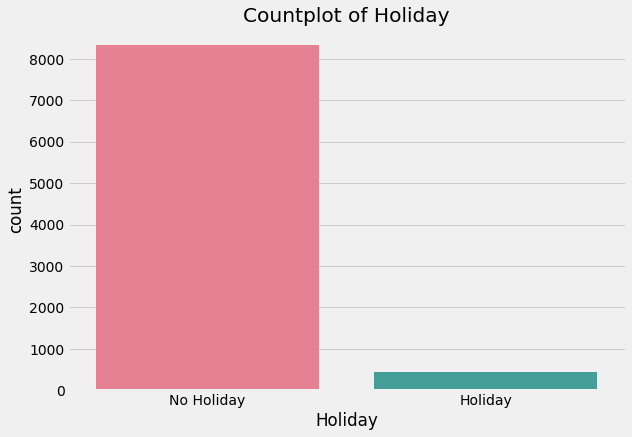

In [122]:
# Chart - 11 visualization code
sns.catplot(data = df,x = 'Holiday',kind = 'count',aspect = 1.5,height = 6,palette='husl')
plt.title('Countplot of Holiday')
plt.show()

##### 1. Why did you pick the specific chart?

I have used count plot because Count plots can be useful in understanding the frequency or count of each category in the dataset. It makes it easy to compare the relative frequencies of each category, which can provide insights into patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

In the holiday column of the dataset,there are two categories one is "No Holiday" and other is "Holiday".The frequency of occurance of "No Holiday" is much greater than "Holiday".

#### Chart - 12

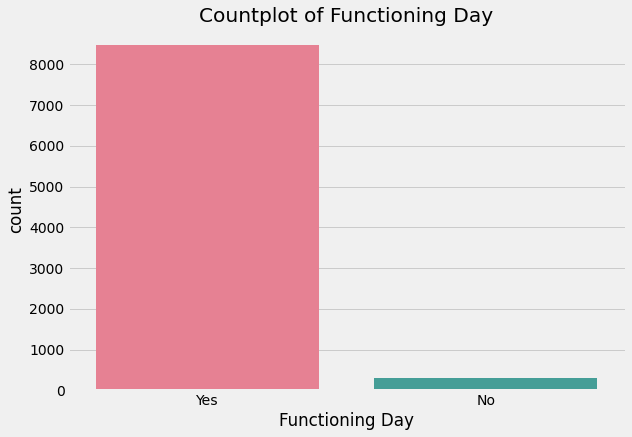

In [123]:
# Chart - 12 visualization code
sns.catplot(data = df,x = 'Functioning Day',kind = 'count',aspect = 1.5,height = 6,palette='husl')
plt.title('Countplot of Functioning Day')
plt.show()


##### 2. What is/are the insight(s) found from the chart?

Most of the datapoints are collected when there is functioning day and very less data are collected on non-functioning days.

#BIVARIATE ANALYSIS

#### Chart - 13

RENTED BIKE COUNT VS TEMPERATURE

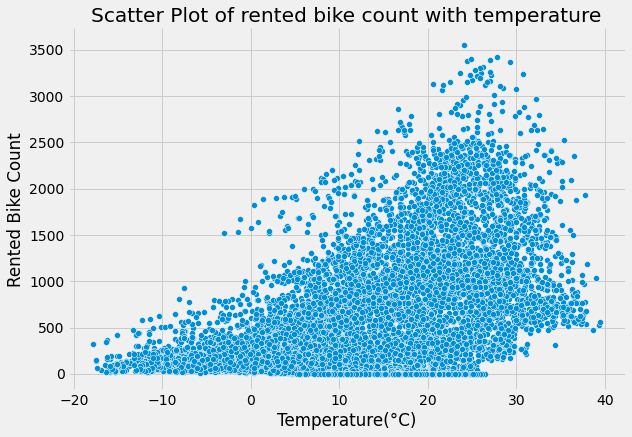

 
Correlation coefficient are :


0.5385581530139789

In [124]:
# Chart - 13 visualization code
sns.relplot(data = df,x = 'Temperature(°C)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with temperature')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Temperature(°C)'].corr(df['Rented Bike Count'])


##### 1. Why did you pick the specific chart?

I chose a scatter plot between temperature and rented bike count because it allows for a clear visualization of the relationship between these two variables. The scatter plot allows for the easy identification of any potential correlation or trend between the temperature and the number of rented bikes. Additionally, scatter plots are useful for exploring the relationship between two continuous variables, which is the case with temperature and rented bike count.

##### 2. What is/are the insight(s) found from the chart?

The correlation coefficient of 0.5385 suggests that there is a moderate positive correlation between temperature and rented bike count. A positive correlation means that as the temperature increases, the number of rented bikes also tends to increase.It also suggests that 29% of the variability in the number of rented bikes can be explained by the temperature. This means that temperature is one of the factors that can influence the number of rented bikes

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the scatter plot and correlation coefficient between temperature and rented bike count may help create a positive business impact for a bike rental company. If the company can identify that there is a strong positive correlation between temperature and rented bike count, they can use this information to make decisions about when to increase the number of bikes available for rent or when to offer promotions to encourage people to rent bikes.

Additionally, if the company can identify the specific temperature range that corresponds to the highest rented bike count, they can use this information to optimize the bike inventory and staffing during those temperature range.

Chart - 14

RENTED BIKE COUNT VS HUMIDITY

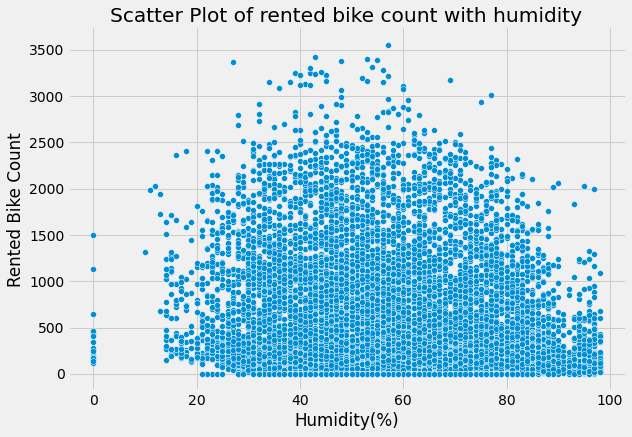

 
Correlation coefficient are :


-0.19978016700089823

In [125]:
# Chart - 14 Visualization code
sns.relplot(data = df,x = 'Humidity(%)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with humidity')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Humidity(%)'].corr(df['Rented Bike Count'])

##### 2. What is/are the insight(s) found from the chart?

There is a weak negative correlation between these two variables.A correlation coefficient of -0.1997 suggests that about 4% of the variability in the number of rented bikes can be explained by humidity.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the scatter plot and correlation coefficient between rented bike count and humidity may not necessarily help create a positive business impact for a bike rental company. The weak negative correlation suggests that as humidity increases, the number of rented bikes tends to decrease, this could lead to a negative business impact for the bike rental company.

Chart - 15

RENTED BIKE COUNT VS WIND SPEED

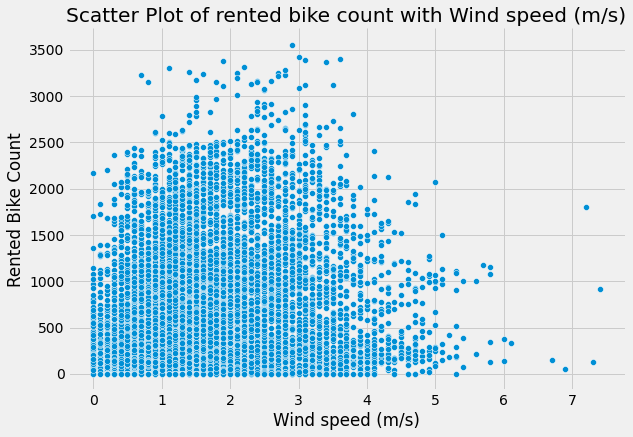

 
Correlation coefficient are :


0.12110844818838669

In [126]:
# Chart 15 Visualization code
sns.relplot(data = df,x = 'Wind speed (m/s)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Wind speed (m/s)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Wind speed (m/s)'].corr(df['Rented Bike Count'])

##### 2. What is/are the insight(s) found from the chart?

A very weak positive correlation between these two variables.A correlation coefficient of 0.1211 suggests that about 1.5% of the variability in the number of rented bikes can be explained by wind speed.

Chart - 16

RENTED BIKE COUNT VS VISIBILITY

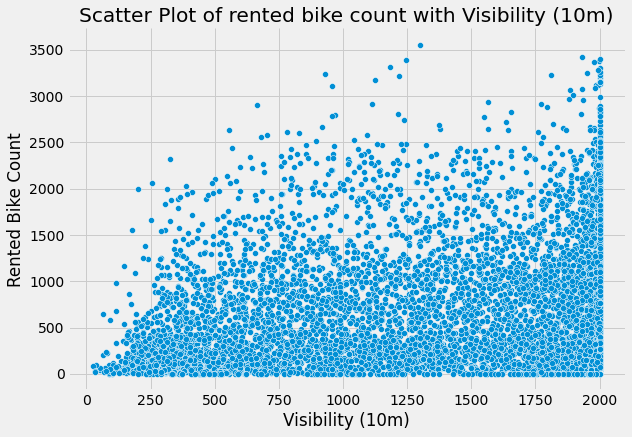

 
Correlation coefficient are :


0.19928029673135897

In [127]:
# Chart 16 Visualisation code
sns.relplot(data = df,x = 'Visibility (10m)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Visibility (10m)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Visibility (10m)'].corr(df['Rented Bike Count'])

#####2. What is/are the insight(s) found from the chart?

A very weak positive correlation between these two variables.A correlation coefficient of 0.199 suggests that about 4% of the variability in the number of rented bikes can be explained by visibility.

Chart - 17

RENTED BIKE COUNT VS DEW POINT TEMPERATURE

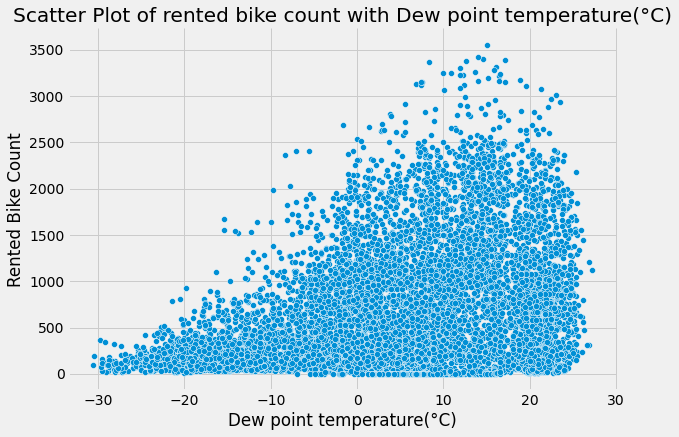

 
Correlation coefficient are :


0.37978812124497235

In [128]:
# Chart 17 Visualisation code
sns.relplot(data = df,x = 'Dew point temperature(°C)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Dew point temperature(°C)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Dew point temperature(°C)'].corr(df['Rented Bike Count'])

#####2. What is/are the insight(s) found from the chart?

the correlation coefficient between rented bike count and Dew Point Temperature is 0.3797, it suggests that there is a moderate positive correlation between these two variables. A positive correlation means that as dew point temperature increases, the number of rented bikes also tends to increase.

A correlation coefficient of 0.3797 suggests that about 14% of the variability in the number of rented bikes can be explained by dew point temperature. This means that dew point temperature is one of the factors that can influence the number of rented bikes.

Chart - 18

RENTED BIKE COUNT VS SOLAR RADIATIONS

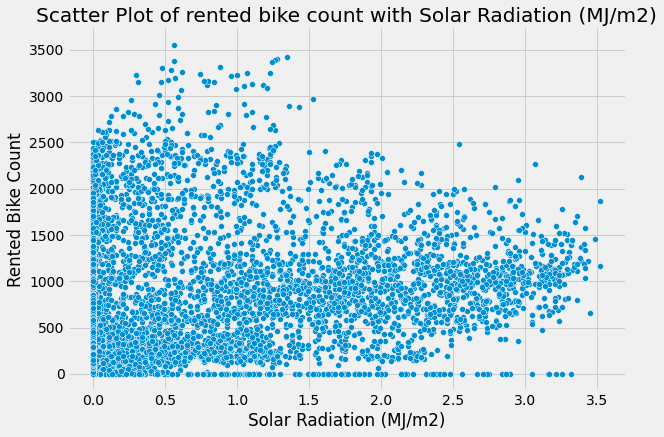

 
Correlation coefficient are :


0.261836985509591

In [129]:
# Chart 18 Visualisation code
sns.relplot(data = df,x = 'Solar Radiation (MJ/m2)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Solar Radiation (MJ/m2)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Solar Radiation (MJ/m2)'].corr(df['Rented Bike Count'])

 What is/are the insight(s) found from the chart?

Correlation coefficient between rented bike count and solar radiation is 0.2618, it suggests that there is a weak positive correlation between these two variables.A correlation coefficient of 0.2618 suggests that about 7% of the variability in the number of rented bikes can be explained by solar radiation

Chart - 19

RENTED BIKE COUNT VS RAINFALL

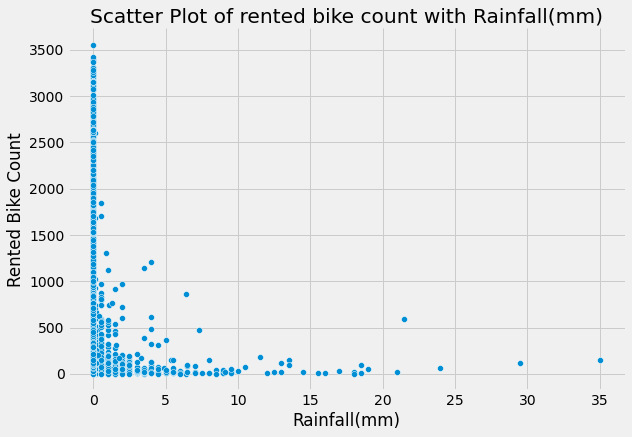

 
Correlation coefficient are :


-0.12307395980285019

In [130]:
# Chart 19 Visualisation code
sns.relplot(data = df,x = 'Rainfall(mm)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Rainfall(mm)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Rainfall(mm)'].corr(df['Rented Bike Count'])

Chart - 20

RENTED BIKE COUNT VS SNOWFALL

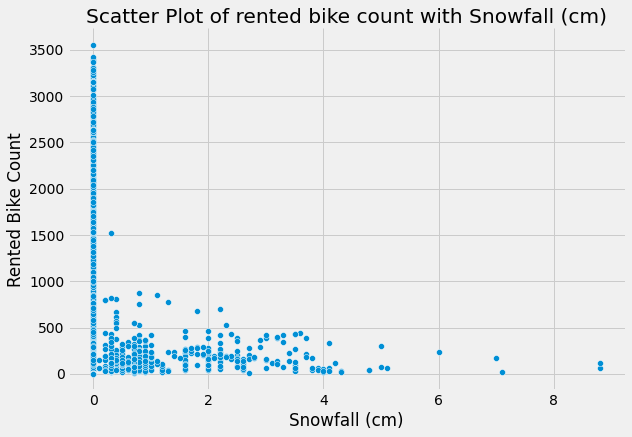

 
Correlation coefficient are :


-0.1418036499974599

In [131]:
# Chart 20 Visualisation code
sns.relplot(data = df,x = 'Snowfall (cm)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Snowfall (cm)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Snowfall (cm)'].corr(df['Rented Bike Count'])

Chart - 21

RENTED BIKE COUNT VS SEASON

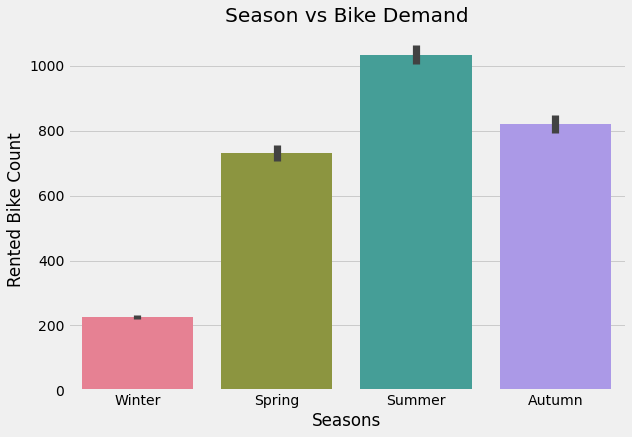

In [132]:
# Chart 21 Visualisation code
sns.catplot(data = df,x = 'Seasons',y = 'Rented Bike Count',kind = 'bar',aspect = 1.5,height = 6,palette='husl')
plt.title('Season vs Bike Demand')
plt.show()

1.Why did you pick the specific chart?

By plotting a bar chart with season on the x-axis and rented bike count on the y-axis, it makes it easy to compare the number of rented bikes across different seasons, which could help identify patterns or trends in the data.

2.What is/are the insight(s) found from the chart?

The bar chart showing the rented bike count versus season with summer having the highest demand followed by autumn, spring, and lastly winter.The chart clearly shows that there is a seasonal pattern in the demand for rented bikes, with summer having the highest demand and winter having the lowest demand. This information can be used by the company to plan for seasonal changes in demand and adjust their inventory, staffing, and pricing accordingly.

3.Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason?

The insights gained from the bar chart showing the rented bike count versus season can help create a positive business impact for a bike rental company. For example, the company can use this information to plan for seasonal changes in demand and adjust their inventory, staffing, and pricing accordingly. Additionally, by understanding the seasonal patterns in demand, the company can create marketing campaigns that target specific seasons, such as offering discounts during the low-demand seasons to increase rentals.

Chart - 22

RENTED BIKE COUNT VS HOLIDAY

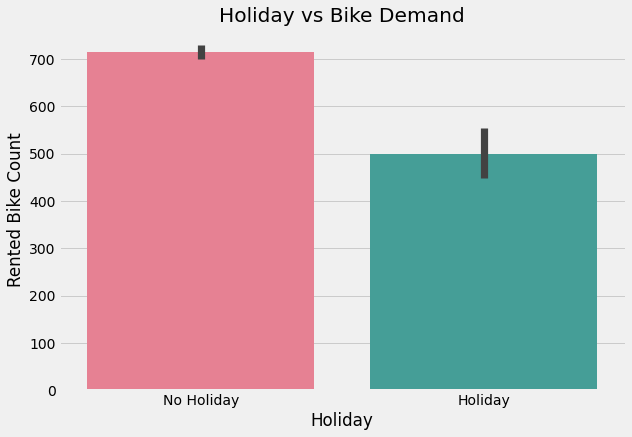

In [133]:
# Chart 22 Visualisation code
sns.catplot(data = df,x = 'Holiday',y = 'Rented Bike Count',kind = 'bar',aspect = 1.5,height = 6,palette='husl')
plt.title('Holiday vs Bike Demand')
plt.show()

2.What is/are the insight(s) found from the chart?

There is more bike demand when there is No Holiday and comparatively less bike demand when there is a Holiday.

Chart - 23

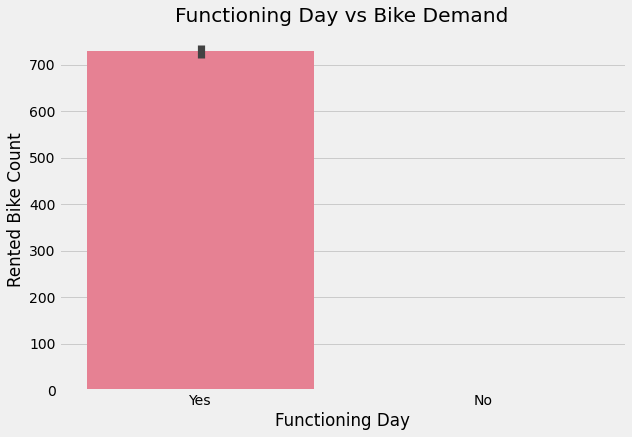

In [134]:
# Chart 23 Visualisation code
sns.catplot(data = df,x = 'Functioning Day',y = 'Rented Bike Count',kind = 'bar',aspect = 1.5,height = 6,palette='husl')
plt.title('Functioning Day vs Bike Demand')
plt.show()

2.What is/are the insight(s) found from the chart?

It is clearly observed from the plot that there is no demand of 'Bikes' on Non Functioning Day or we can say that the rental company operates only on functionong day.

In [135]:
# Finding the number of entries in dataset having 'Functioning Day' = 'No'
df[df['Functioning Day'] == 'No'].shape[0]

295

In [136]:
# Dropping those entries from the dataset
df = df.drop(df[df['Functioning Day'] == 'No'].index)

In [137]:
# Dropping functioning day column also
df.drop(columns = ['Functioning Day'],inplace = True)

Chart - 24

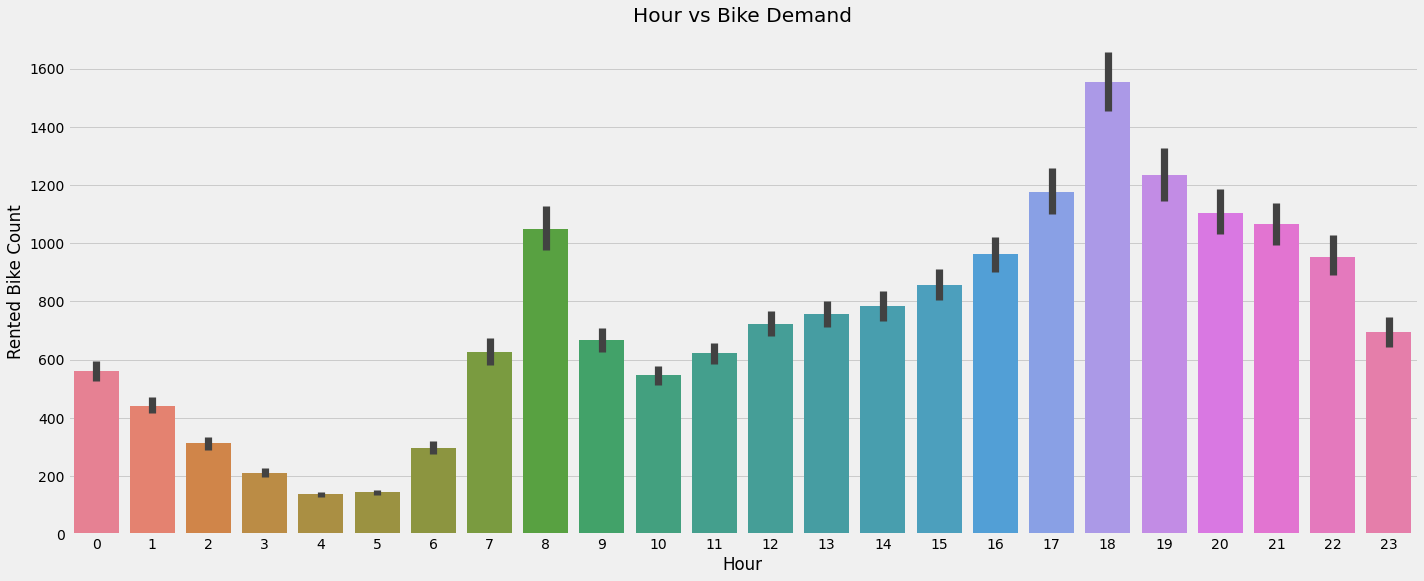

In [138]:
# Chart 24 Visualisation code
sns.catplot(data = df,x = 'Hour',y = 'Rented Bike Count',kind = 'bar',aspect = 2.5,height = 8,palette='husl')
plt.title('Hour vs Bike Demand')
plt.show()

2.What is/are the insight(s) found from the chart?

In the morning 8 O'Clock has more bike demand and in evening 6 O'Clock has most number of bike demands.Office hour,college hour,school hour might be the reason for surge in demands for these periods.  

 Chart - 25

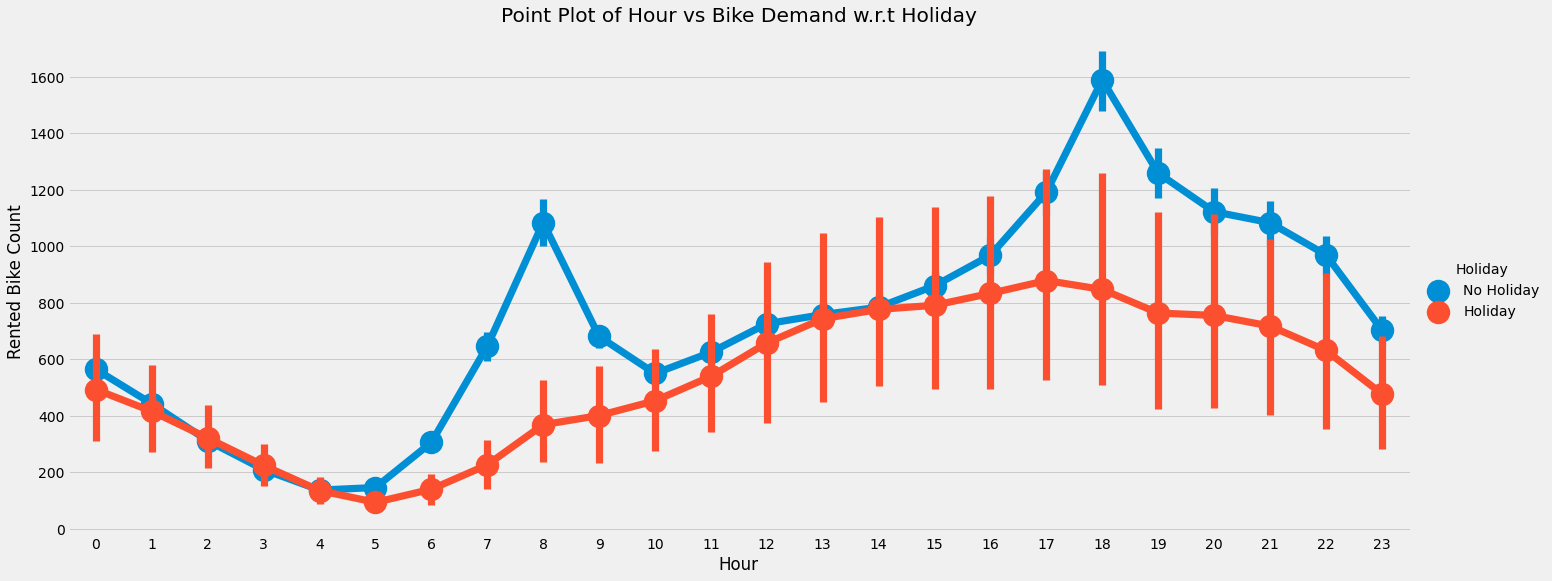

In [139]:
# Chart 25 Visualization code
sns.catplot(data = df,x = 'Hour',y = 'Rented Bike Count',hue = 'Holiday',kind = 'point',aspect = 2.5,height = 8)
plt.title('Point Plot of Hour vs Bike Demand w.r.t Holiday')
plt.show()

Chart - 26

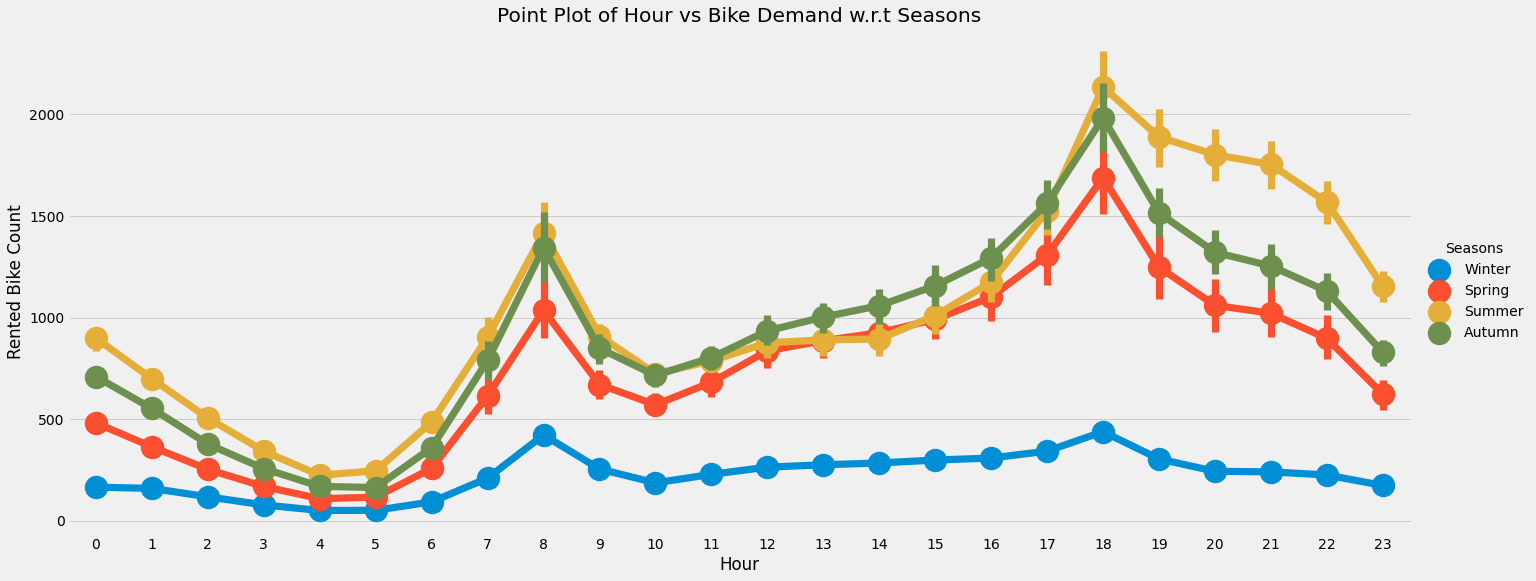

In [140]:
# Chart 26 Visualization code
sns.catplot(data = df,x = 'Hour',y = 'Rented Bike Count',hue = 'Seasons',kind = 'point',aspect = 2.5,height = 8)
plt.title('Point Plot of Hour vs Bike Demand w.r.t Seasons')
plt.show()

Chart-27

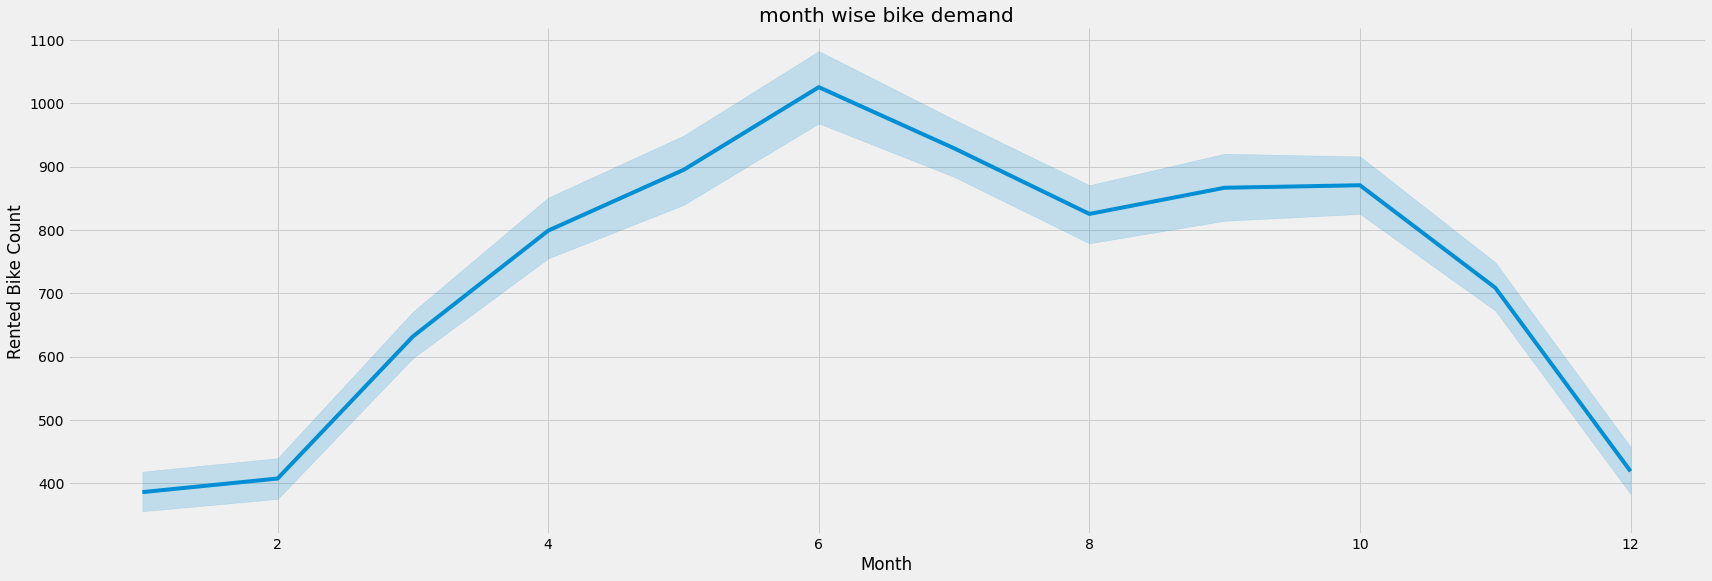

In [141]:
# Chart 27 visualization code
sns.relplot(data = df,x = 'Month',y = 'Rented Bike Count',kind = 'line',aspect = 3,height = 8)
plt.title('month wise bike demand')
plt.show()


2.What is/are the insight(s) found from the chart?

May and June has the most number of bike demands.These months generate good revenues to the Bike rental company.

Chart - 28

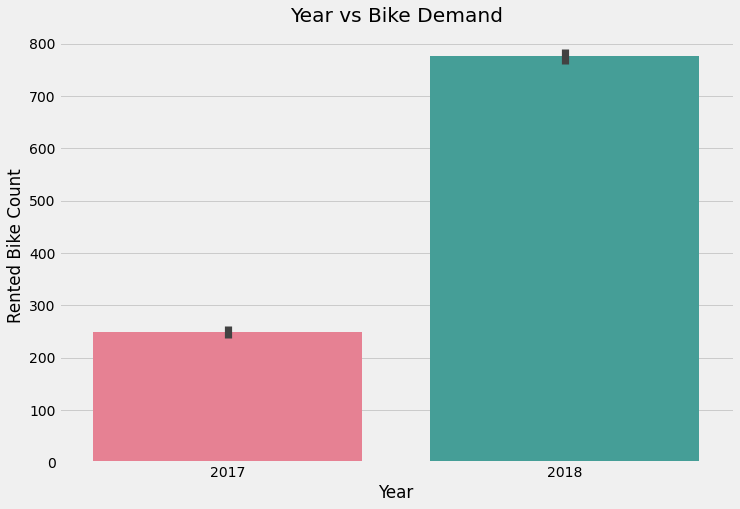

In [142]:
# Chart 28 Visualisation code
sns.catplot(data = df,x = 'Year',y = 'Rented Bike Count',kind = 'bar',aspect = 1.5,height = 7,palette='husl')
plt.title('Year vs Bike Demand')
plt.show()

What is/are the insight(s) found from the chart?

Comparing two years 2017 and 2018,2018 has the most number of bike demands.Infact there is a tremendous surge in demand in 2018

#### Chart - 29 - Correlation Heatmap

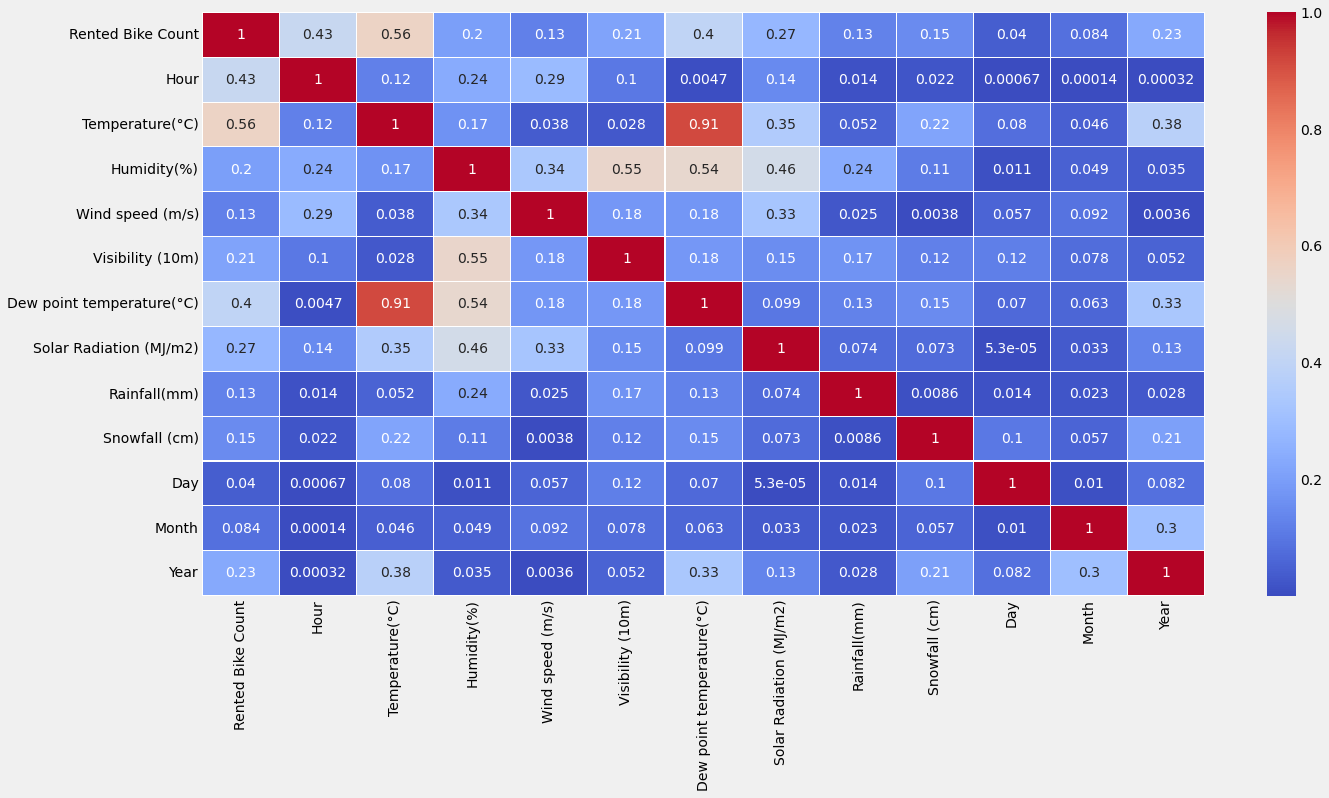

In [143]:
# Correlation Heatmap visualization code  
data_corr= df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(abs(data_corr), cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [144]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Day                          0
Month                        0
Year                         0
dtype: int64

####No missing values are present in the dataset.

### 2. Handling Outliers

In [145]:
# Lokking numeric features
numerical_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Year']

In [146]:
len(numerical_features)

13

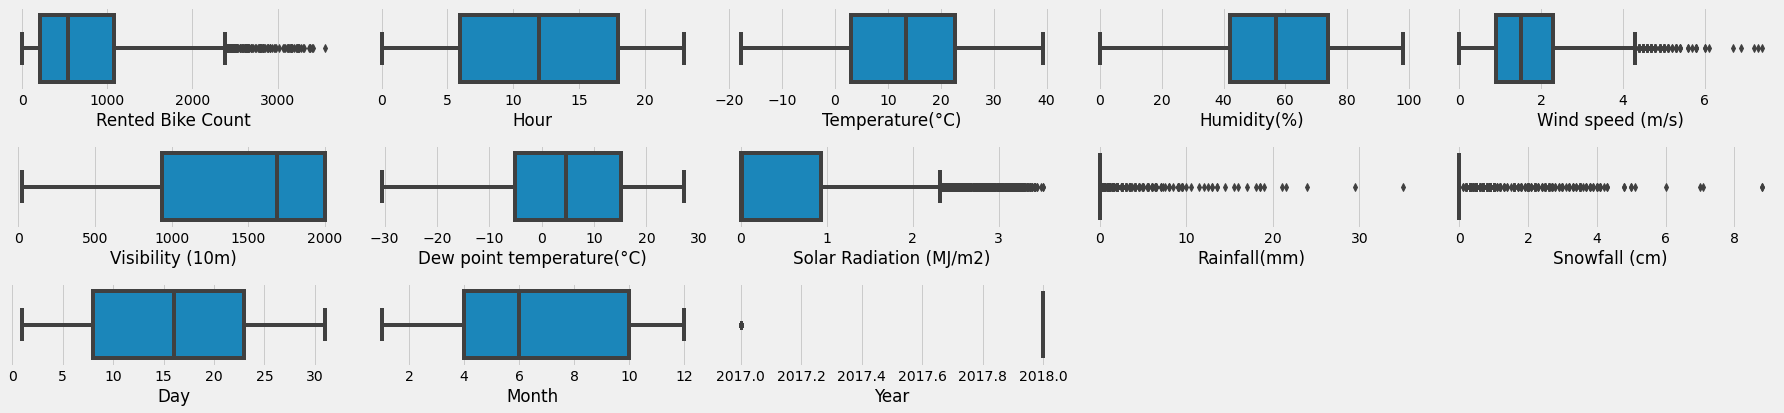

In [147]:
# Plotting Box Plot for numerical features
plt.figure(figsize=(25,15))

for i in range(0,len(numerical_features)):
  plt.subplot(8,5,i+1)
  sns.boxplot(data = df,x = numerical_features[i])
  plt.xlabel(numerical_features[i])
  plt.tight_layout()

In [148]:
# Checking skewness for numerical features.
for items in numerical_features:
  print(f'Skewness of feature {items} is : {df[items].skew()}')
  print("")

Skewness of feature Rented Bike Count is : 1.1397000550865888

Skewness of feature Hour is : -0.0012605476046427164

Skewness of feature Temperature(°C) is : -0.17454981832982763

Skewness of feature Humidity(%) is : 0.06864897817546713

Skewness of feature Wind speed (m/s) is : 0.8942215019566562

Skewness of feature Visibility (10m) is : -0.6953061678112851

Skewness of feature Dew point temperature(°C) is : -0.3387747528330898

Skewness of feature Solar Radiation (MJ/m2) is : 1.5100650462311918

Skewness of feature Rainfall(mm) is : 14.616921282975433

Skewness of feature Snowfall (cm) is : 8.29283026085502

Skewness of feature Day is : -0.019048561159293244

Skewness of feature Month is : 0.012911443375853378

Skewness of feature Year is : -2.911537892649564



In [149]:
# Handling Outliers & Outlier treatments
def outlier_detection(features):
  percentile_25 = df[features].quantile(0.25)
  percentile_75 = df[features].quantile(0.75)
  IQR = percentile_75 - percentile_25
  upper_limit = percentile_75 + 1.5 * IQR
  lower_limit = percentile_25 - 1.5 * IQR
  return df[(df[features] > upper_limit) | (df[features] < lower_limit)].shape[0]


####From the box plot shown above there may be outliers present in the column "Rented Bike Count" and "wind Speed"

In [150]:
# Checking number of data points in column "Rented Bike Count" which can be considerd as an outliers"
outlier_detection('Rented Bike Count')

152

In [151]:
# Checking number of data points in column "Wind Speed" which can be considerd as an outliers"
outlier_detection('Wind speed (m/s)')

154

In [152]:
# checking number of rows in dataset
df.shape[0]

8465

####As the dataset has only 8465 rows which is a small dataset,I think outlier removal is not a good technique.We perform some transformation in later part of this project then again we look for outlier treatment.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [153]:
# importing libraries
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [154]:
categorical_features = list(set(df.columns.tolist()) - set(df.describe().columns.tolist()))

In [155]:
categorical_features

['Holiday', 'Seasons']

In [156]:
# Fetching unique values in categorical features 
for elem in categorical_features:
  print(f'Unique values in {elem} are :{df[elem].unique()}')
  print("")

Unique values in Holiday are :['No Holiday' 'Holiday']

Unique values in Seasons are :['Winter' 'Spring' 'Summer' 'Autumn']



In [157]:
# Encode your categorical columns
df_new = pd.get_dummies(df,columns=categorical_features,drop_first = True)
df_new.sample(5)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
4310               1174    14             25.5           53               2.0   
726                  25     6             -1.3           84               2.4   
5566               1782    22             28.8           65               1.3   
35                  388    11              1.9           49               1.8   
182                 350    14             -1.3           27               3.1   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
4310               981                       15.2                     2.50   
726                425                       -3.6                     0.00   
5566              1988                       21.5                     0.00   
35                1406                       -7.7                     1.00   
182               1906                      -17.9                     1.12   

      Rainfall(mm)  Snowfall (cm)  Day  Month  Year  Holiday_No Holiday  \
4310           0.0            0.0   29      5  2018                   1   
726            0.0            1.2   31     12  2017                   0   
5566           0.0            0.0   20      7  2018                   1   
35             0.0            0.0   12      2  2017                   1   
182            0.0            0.0   12      8  2017                   1   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  
4310               1               0               0  
726                0               0               1  
5566               0               1               0  
35                 0               0               1  
182                0               0               1

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [158]:
# Manipulate Features to minimize feature correlation and create new features


In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc(df):
# VIF Dataframe
  vif_df = pd.DataFrame()
  vif_df['feature'] = df.columns

# calculating VIF for each feature
  vif_df['VIF'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
  return vif_df

In [160]:
vif_calc(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

feature         VIF
0                        Hour    4.450425
1             Temperature(°C)  185.510084
2                 Humidity(%)  182.909204
3            Wind speed (m/s)    4.866596
4            Visibility (10m)   10.737733
5   Dew point temperature(°C)  126.862428
6     Solar Radiation (MJ/m2)    2.890387
7                Rainfall(mm)    1.104193
8               Snowfall (cm)    1.154571
9                         Day    4.440890
10                      Month    4.664346
11                       Year  399.153809

In [161]:
vif_calc(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

feature        VIF
0                      Hour   4.440749
1           Temperature(°C)   3.524414
2               Humidity(%)  23.509471
3          Wind speed (m/s)   4.859930
4          Visibility (10m)  10.674435
5   Solar Radiation (MJ/m2)   2.746136
6              Rainfall(mm)   1.090794
7             Snowfall (cm)   1.149582
8                       Day   4.440079
9                     Month   4.662932
10                     Year  63.022573

In [162]:
vif_calc(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Year']]])

feature       VIF
0                     Hour  4.019820
1          Temperature(°C)  3.168105
2              Humidity(%)  6.733950
3         Wind speed (m/s)  4.639585
4         Visibility (10m)  5.455767
5  Solar Radiation (MJ/m2)  2.269320
6             Rainfall(mm)  1.082799
7            Snowfall (cm)  1.138514
8                      Day  3.847679
9                    Month  4.546114

In [163]:
vif_calc(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Year','Humidity(%)']]])

feature       VIF
0                     Hour  4.007360
1          Temperature(°C)  2.602665
2         Wind speed (m/s)  4.386313
3         Visibility (10m)  5.426576
4  Solar Radiation (MJ/m2)  1.894175
5             Rainfall(mm)  1.047690
6            Snowfall (cm)  1.112562
7                      Day  3.406064
8                    Month  3.878156

In [164]:
vif_calc(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Year',
                                                           'Humidity(%)','Visibility (10m)']]])

feature       VIF
0                     Hour  3.856814
1          Temperature(°C)  2.579765
2         Wind speed (m/s)  3.876503
3  Solar Radiation (MJ/m2)  1.891896
4             Rainfall(mm)  1.031539
5            Snowfall (cm)  1.103869
6                      Day  3.302003
7                    Month  3.290773

In [165]:
# So according to above results droppping ['Rented Bike Count','Dew point temperature(°C)','Year','Humidity(%)','Visibility (10m)']
df_new.drop(columns = ['Dew point temperature(°C)','Year','Humidity(%)','Visibility (10m)'],inplace = True)

#### 2. Feature Selection

In [166]:
# Select your features wisely to avoid overfitting
df_new.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Wind speed (m/s)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Holiday_No Holiday', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter'],
      dtype='object')

In [167]:
# Separating input and output variables
x = df_new.iloc[:,1:]
y = df_new.loc[:,'Rented Bike Count']


In [168]:
len(df_new.columns)

13

In [169]:
x.columns

Index(['Hour', 'Temperature(°C)', 'Wind speed (m/s)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Holiday_No Holiday', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter'],
      dtype='object')

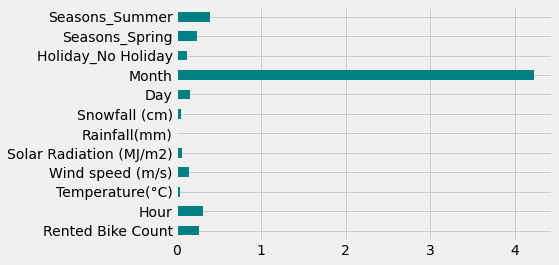

In [170]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(x,y)
feature_importances = pd.Series(importances,df_new.columns[0:len(df_new.columns) - 1])
feature_importances.plot(kind = 'barh',color = 'teal')
plt.show()

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [171]:
# Transform Your data


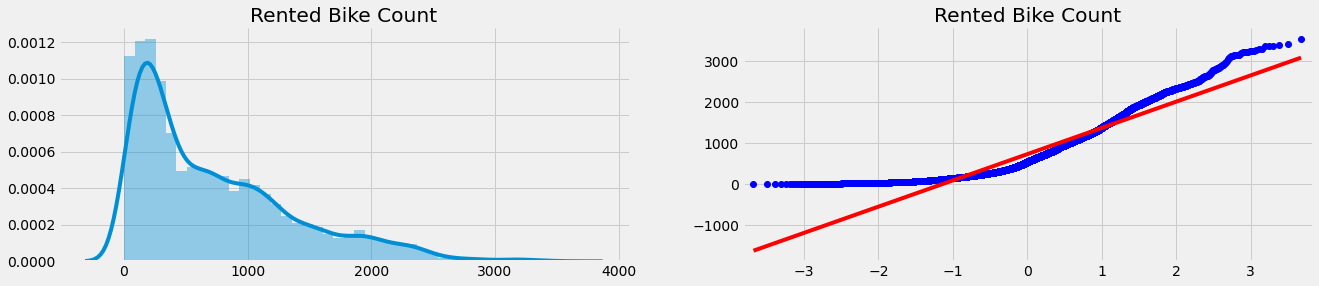

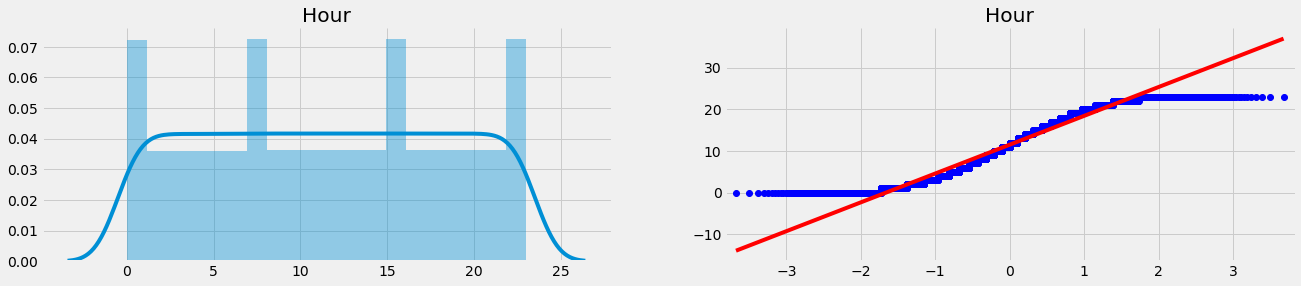

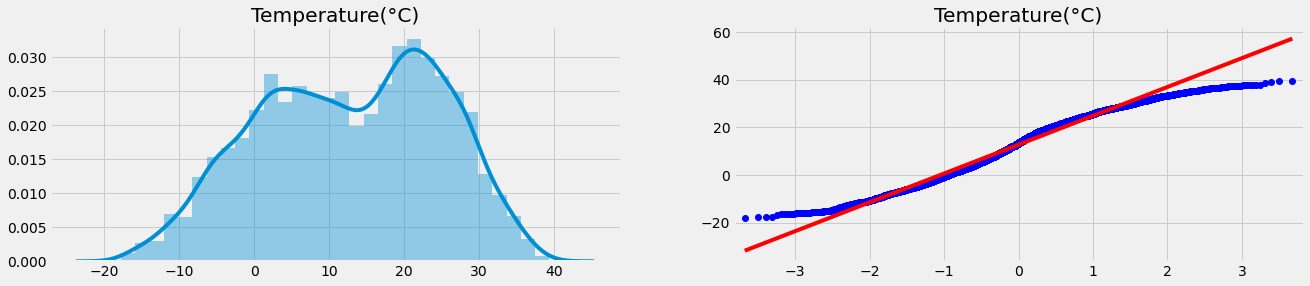

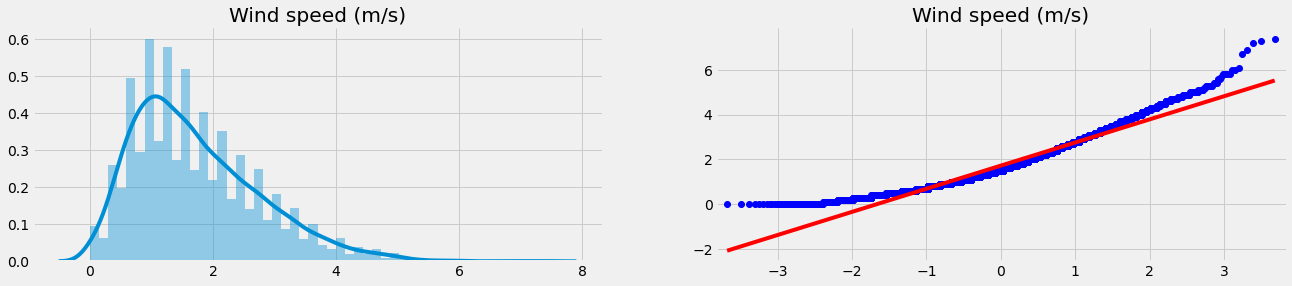

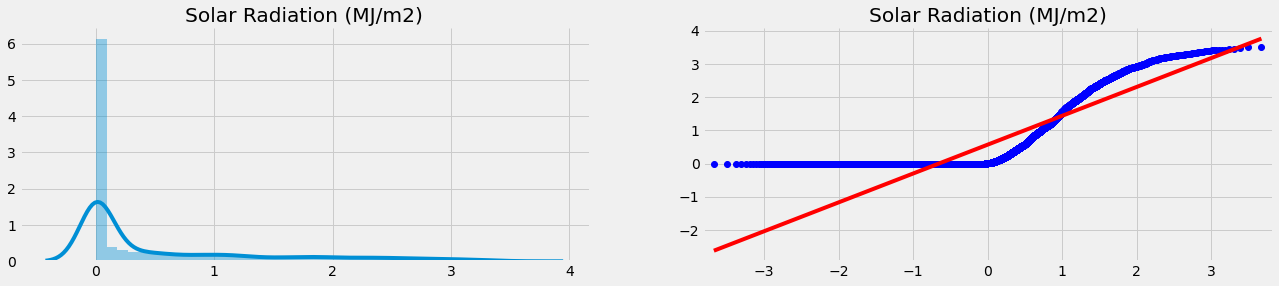

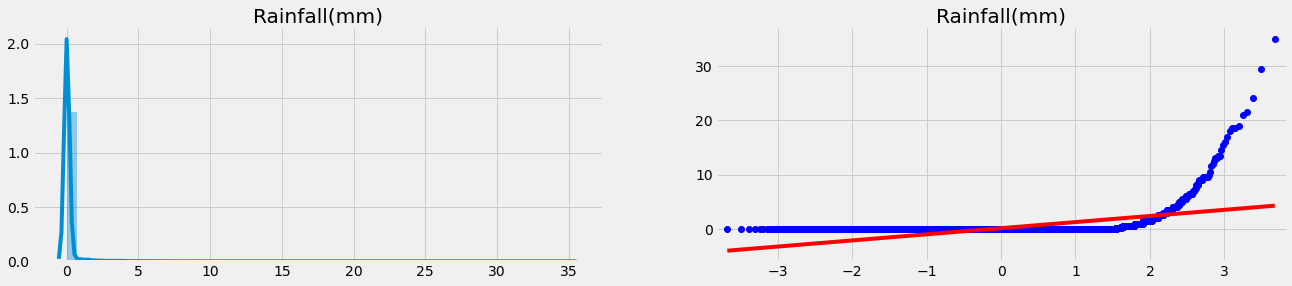

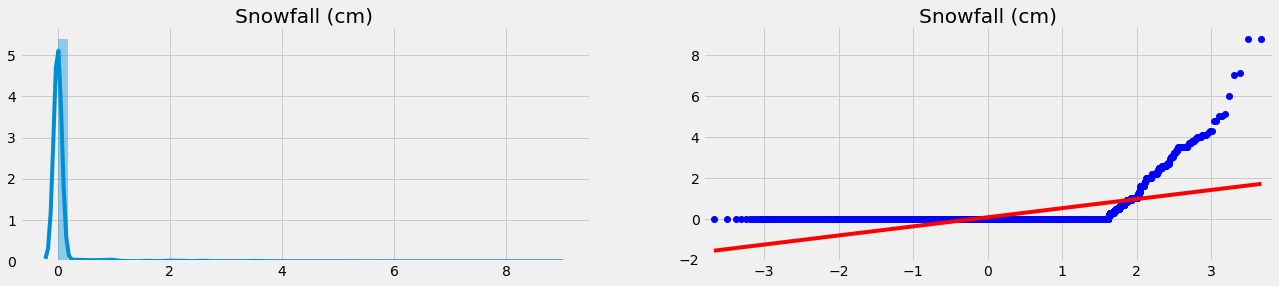

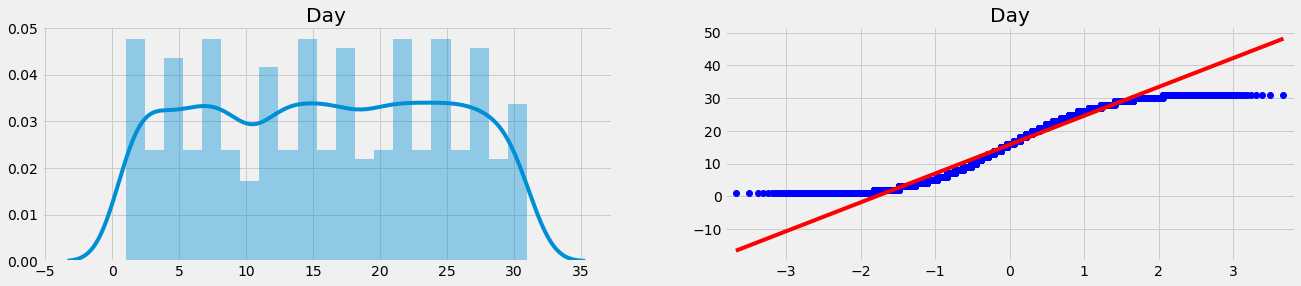

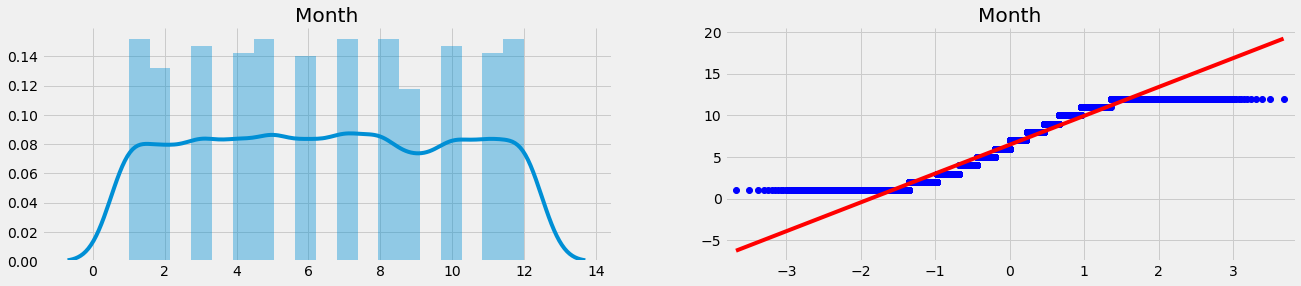

In [172]:
import scipy.stats as stats
from matplotlib import gridspec
from statsmodels.graphics.gofplots import qqplot

# select the features that we want to plot
features = ['Rented Bike Count','Hour', 'Temperature(°C)','Wind speed (m/s)',
            'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day','Month']# Skipping Rest features because they are categorical in nature

# Iterate over the features
for feature in features:
    # creating a figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
    # Ploting a distplot 
    sns.distplot(df_new[feature], ax=ax1)
    # Ploting a Q-Q plot 
    qqplot(df_new[feature], line='s',ax=ax2)
    #removing the spines 
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    # removing the axis labels
    ax1.set(xlabel='', ylabel='',title = feature)
    ax2.set(xlabel='', ylabel='',title = feature)
    # Show the plot
    plt.show() 

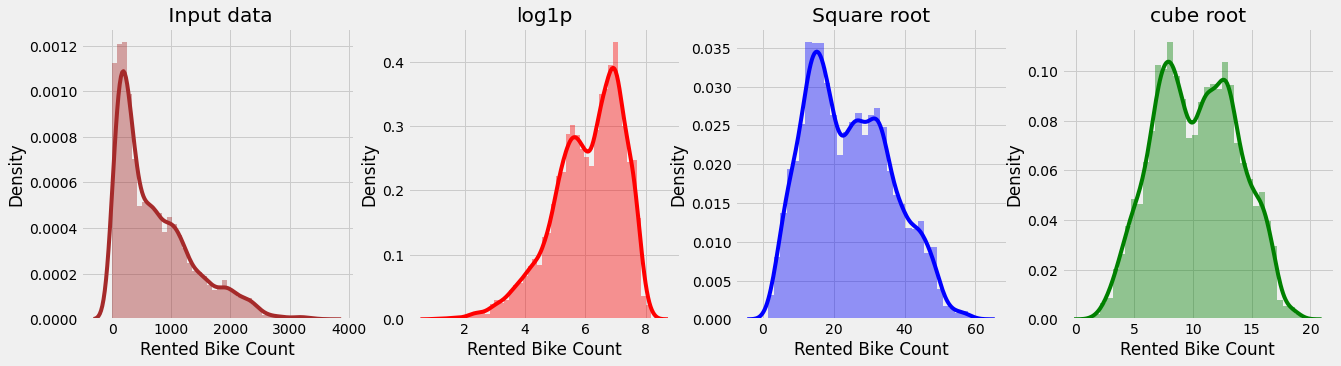

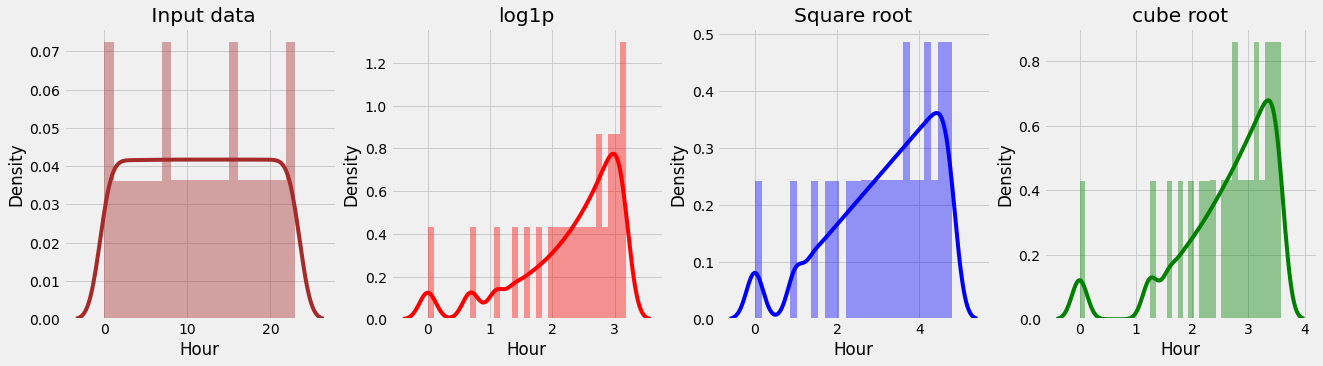

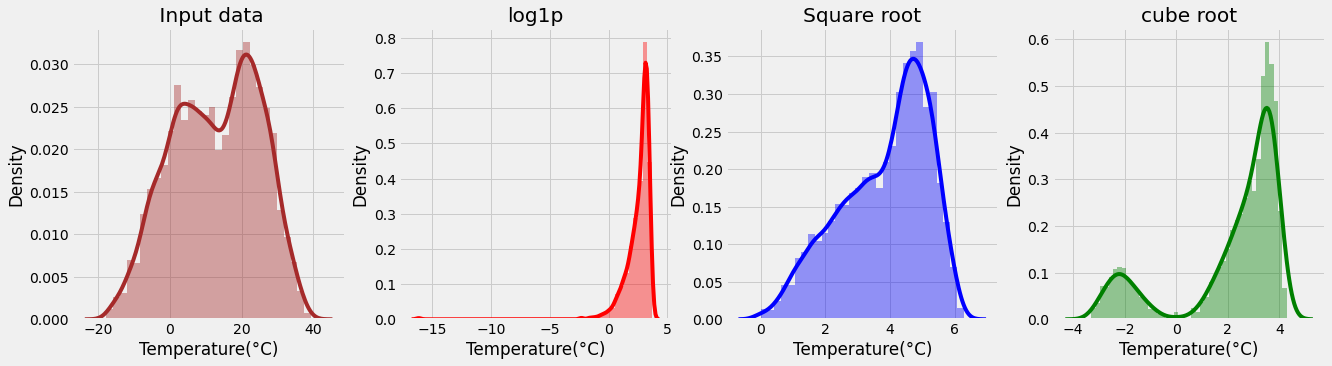

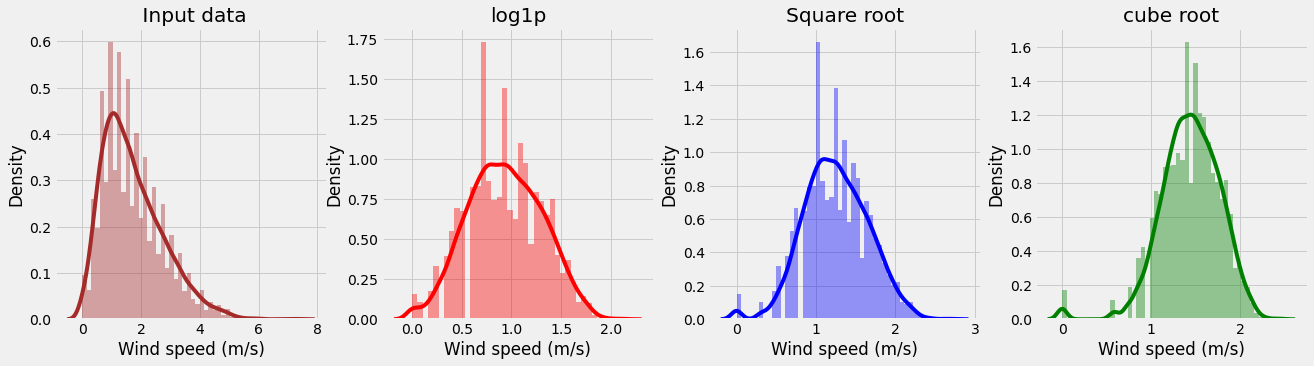

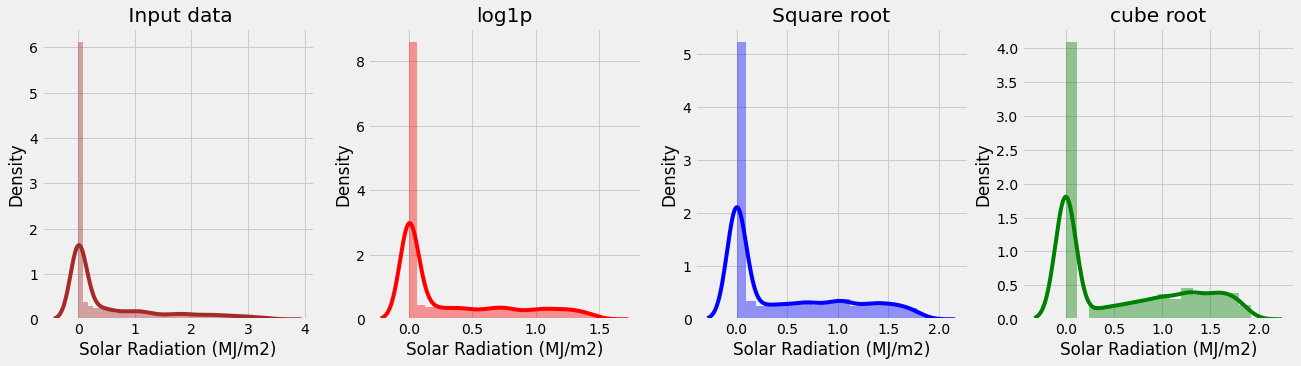

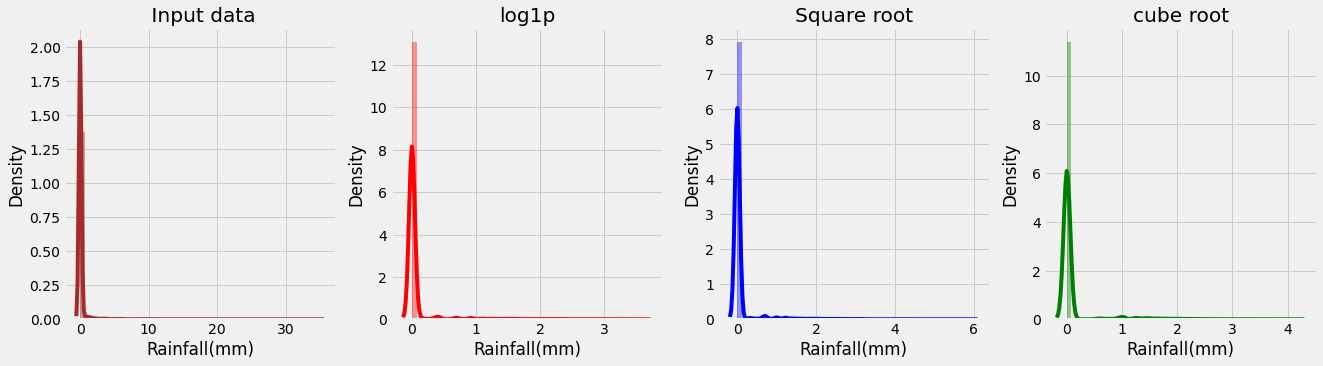

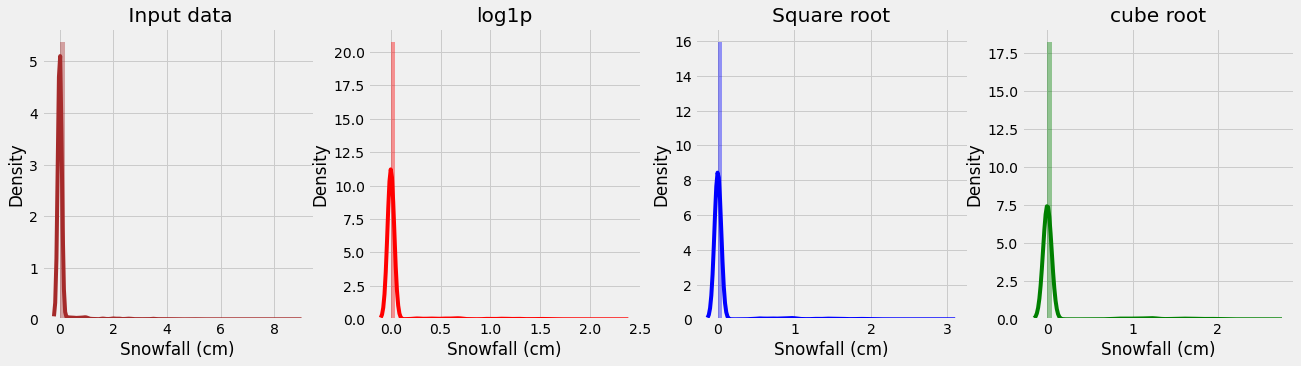

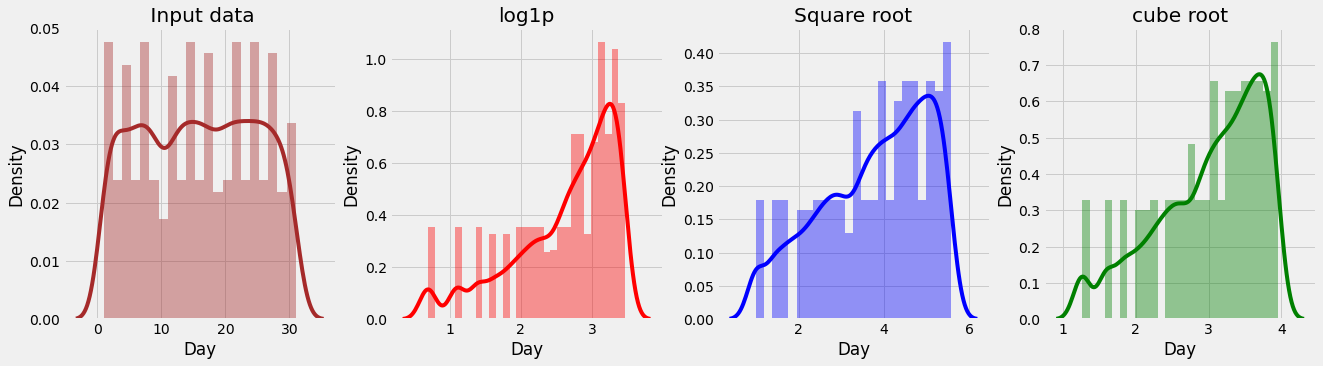

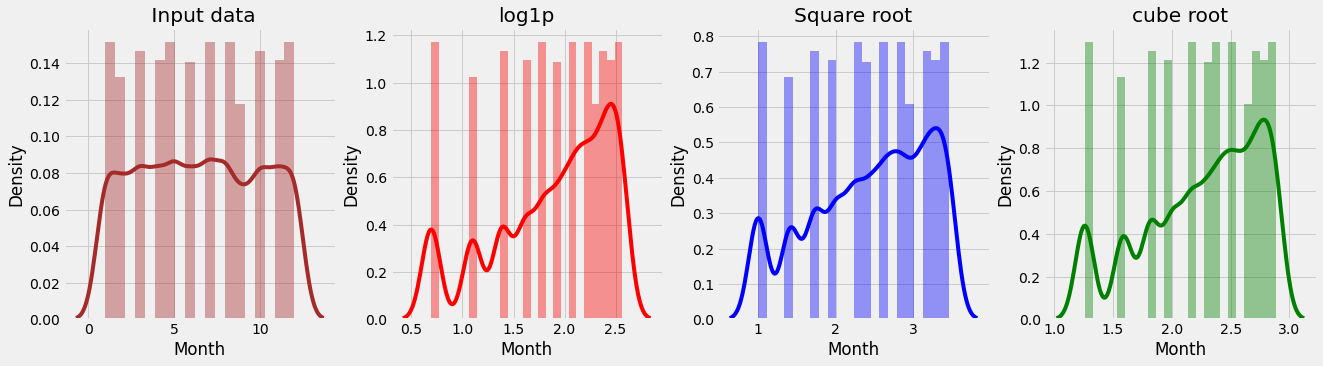

In [173]:
#apply diffrent tranformation technique and checking data distributation
for feature in features:
  fig,axes = plt.subplots(1,4,figsize=(20,5))
  sns.distplot((df_new[feature]),ax=axes[0],color='brown').set_title(" Input data")
  sns.distplot(np.log1p(df_new[feature]+0.0000001),ax=axes[1],color='red').set_title("log1p") #transform only posible in positive value so adding 0.0000001 in data
  sns.distplot(np.sqrt(df_new[feature]),ax=axes[2], color='blue').set_title("Square root")
  sns.distplot(np.cbrt(df_new[feature]*2),ax=axes[3], color='green').set_title("cube root")

In [174]:
# Creating a function so that we can apply some transformation and visualize the changes occured due to transformation.
def transformation(feature,kind):
  for feature in features:
    fig,(ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize = (20,4))
    sns.distplot(df_new[feature],color = 'red',ax = ax1)
    qqplot(df_new[feature],line = 's',ax = ax2)
    if kind == np.log1p:
      sns.distplot(kind(df_new[feature]+0.0000001),color = 'green',ax = ax3)
    else:
      sns.distplot(kind(df_new[feature]),color = 'green',ax = ax3)

     
    qqplot(kind(df_new[feature]),line = 's',ax = ax4)
     #removing the spines 
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    ax4.spines['top'].set_visible(False)
    ax4.spines['right'].set_visible(False)
     # removing the axis labels
    ax1.set(xlabel='', ylabel='',title = feature)
    ax2.set(xlabel='', ylabel='',title = feature)
    ax3.set(xlabel='', ylabel='',title = f'transformed {feature}')
    ax4.set(xlabel='',ylabel='',title = f'transformed {feature}')

    # Show the plot
  return plt.show() 





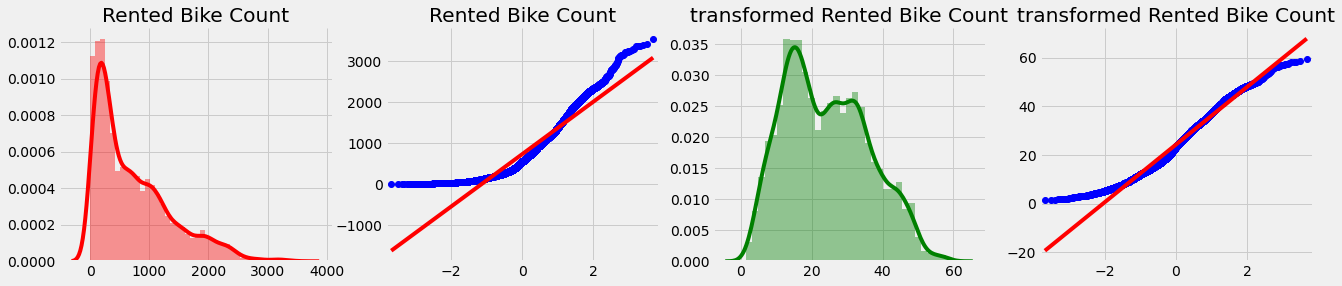

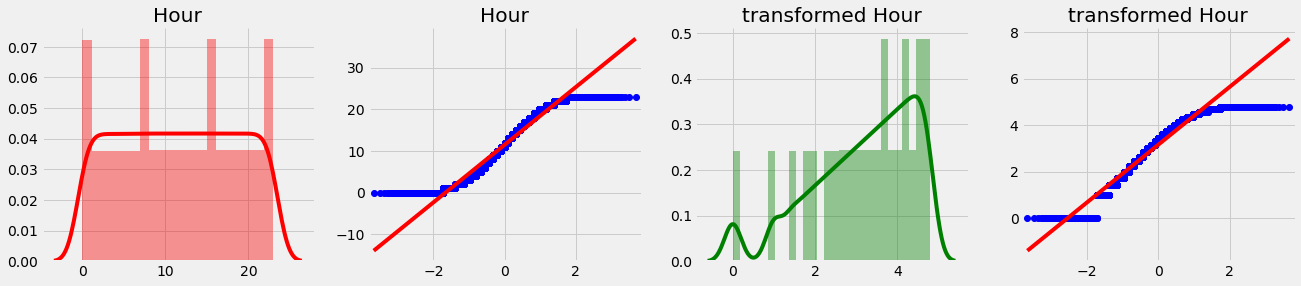

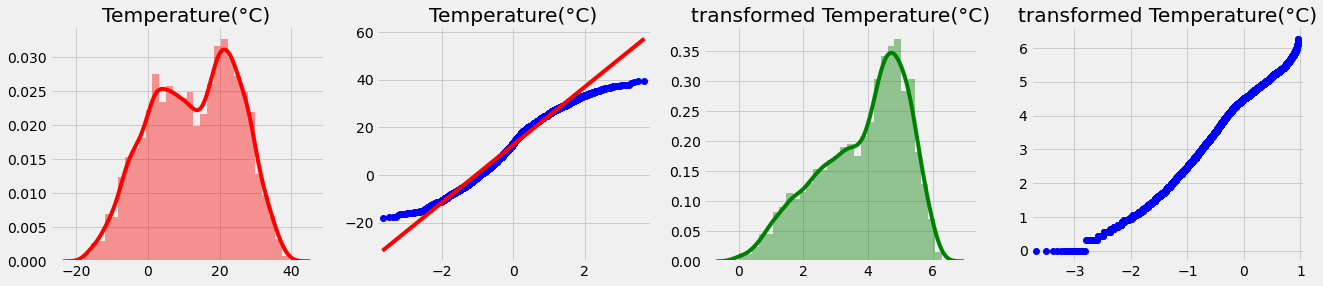

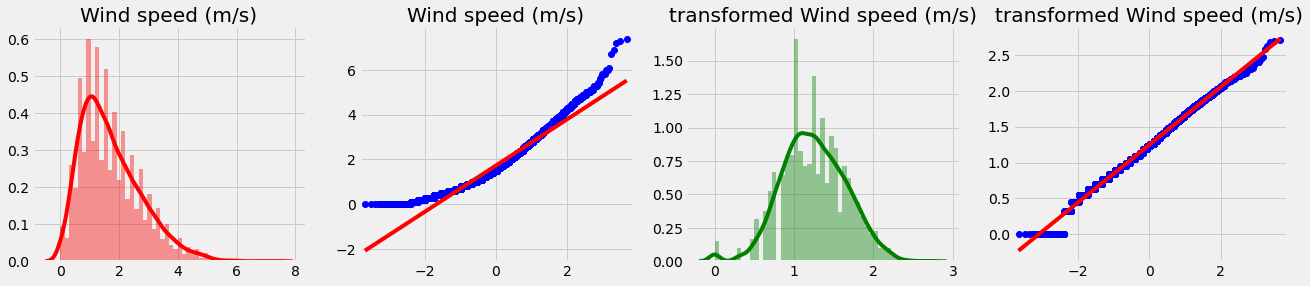

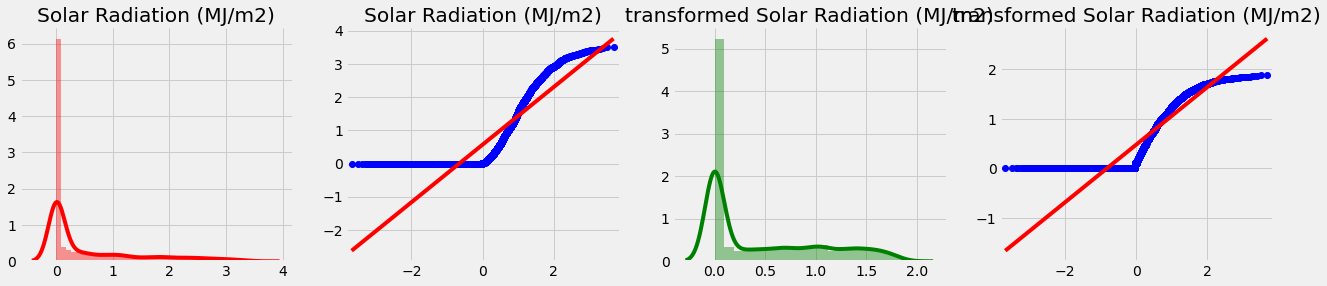

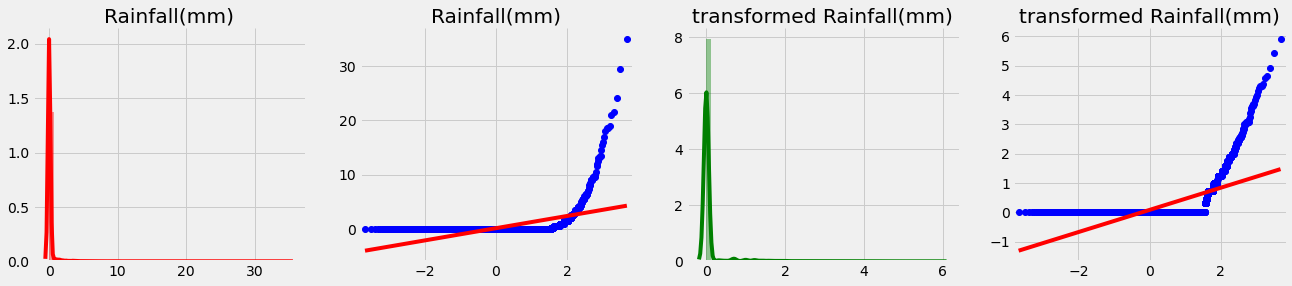

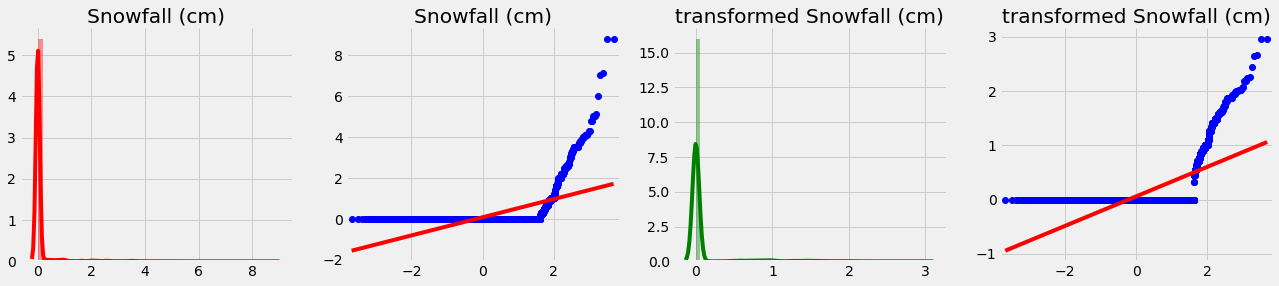

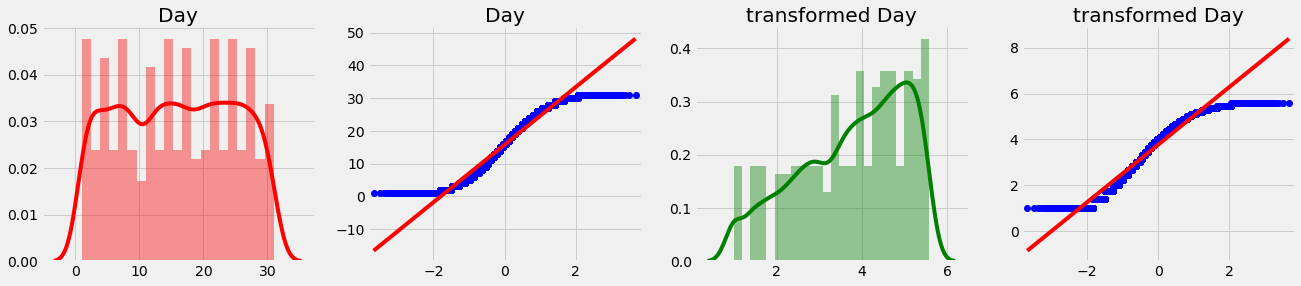

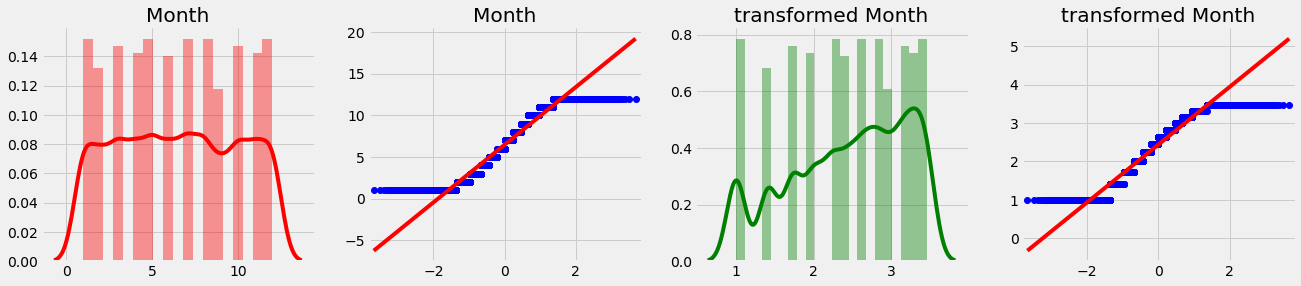

In [175]:
# Applying square root transformation
transformation(features,np.sqrt)

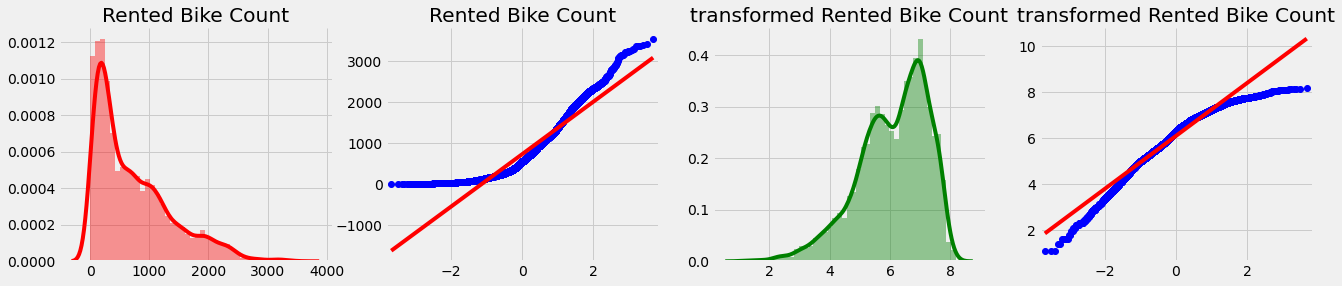

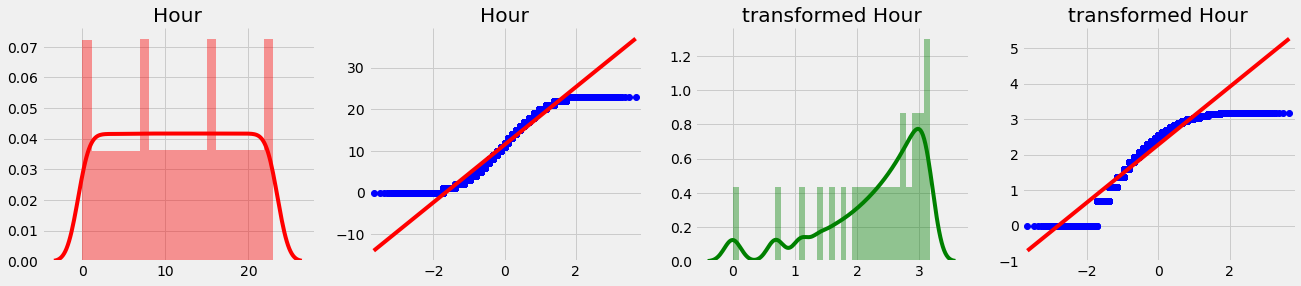

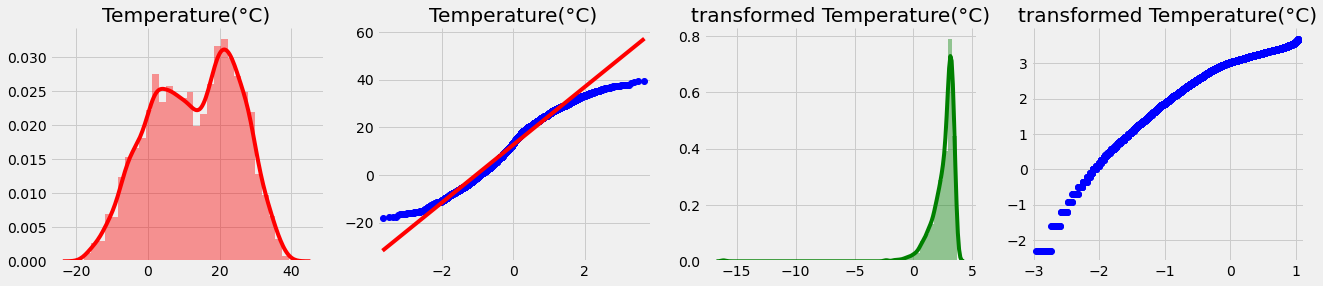

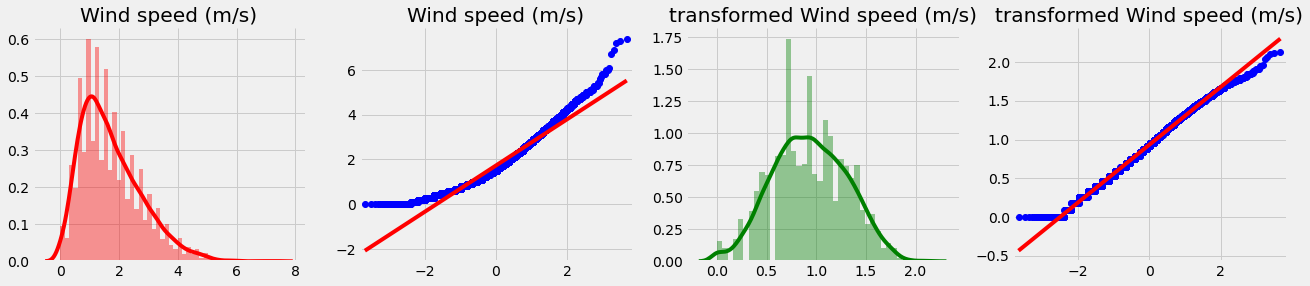

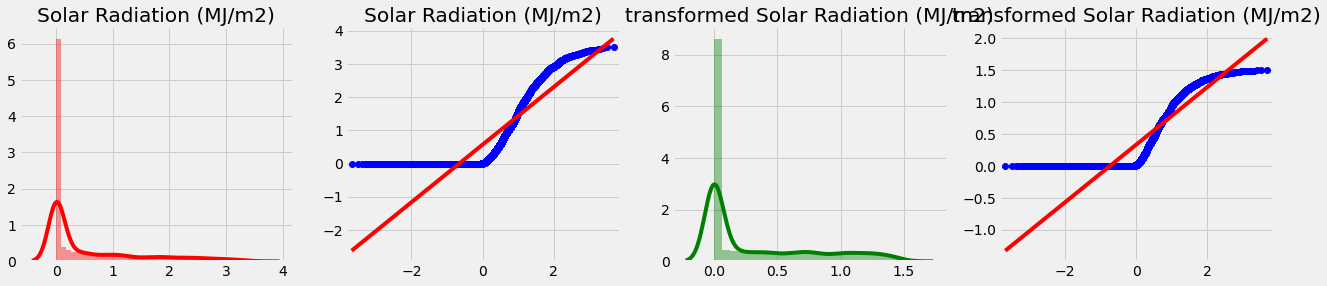

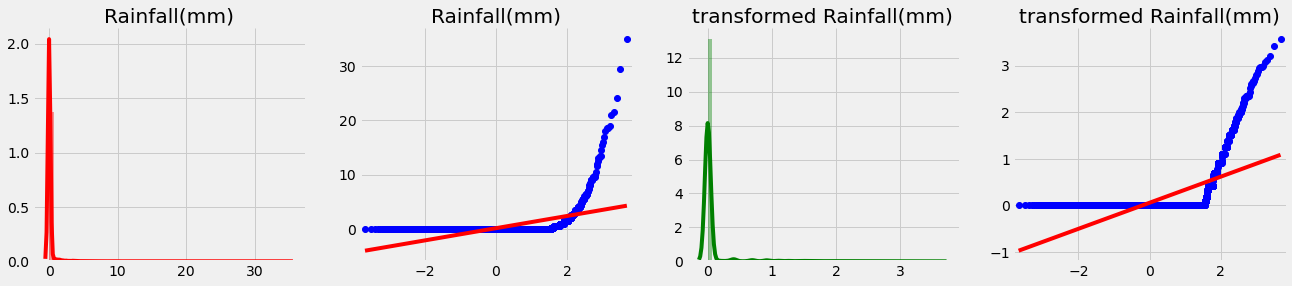

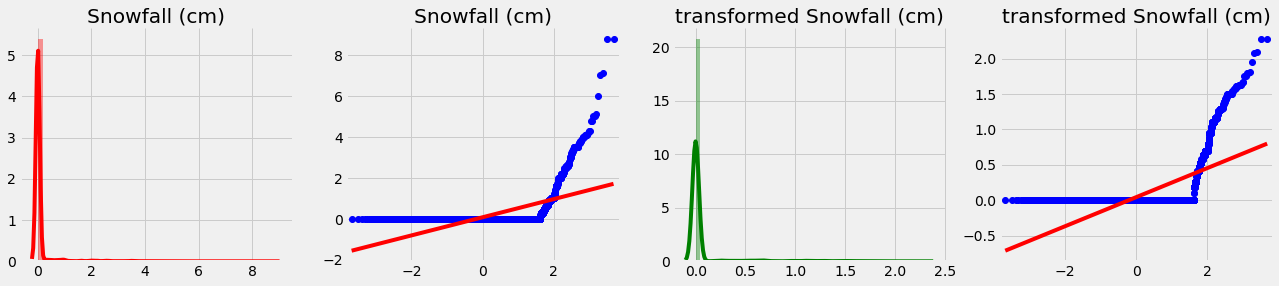

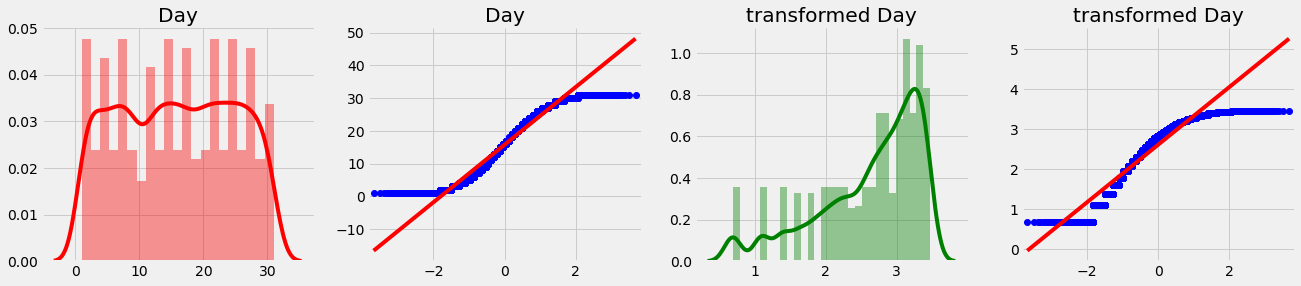

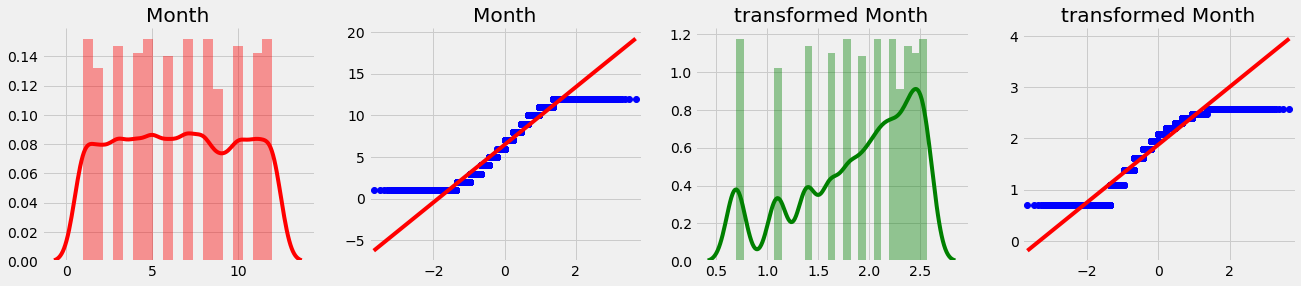

In [176]:
# Applying logarithmic transformation
transformation(features,np.log1p)

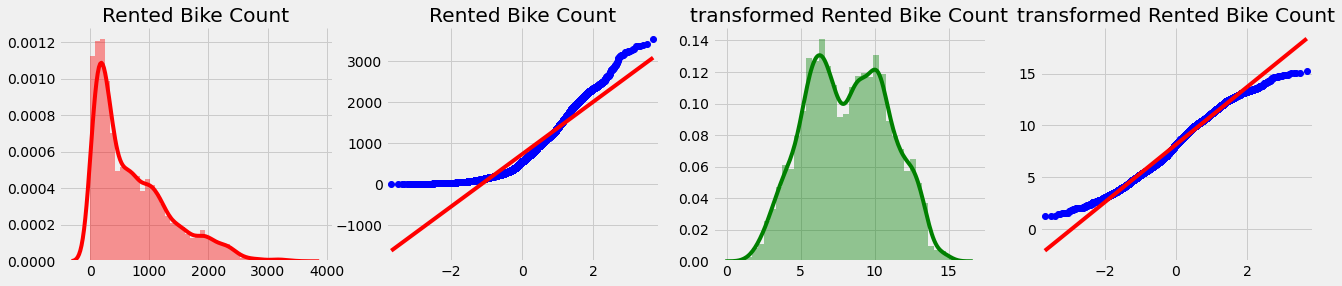

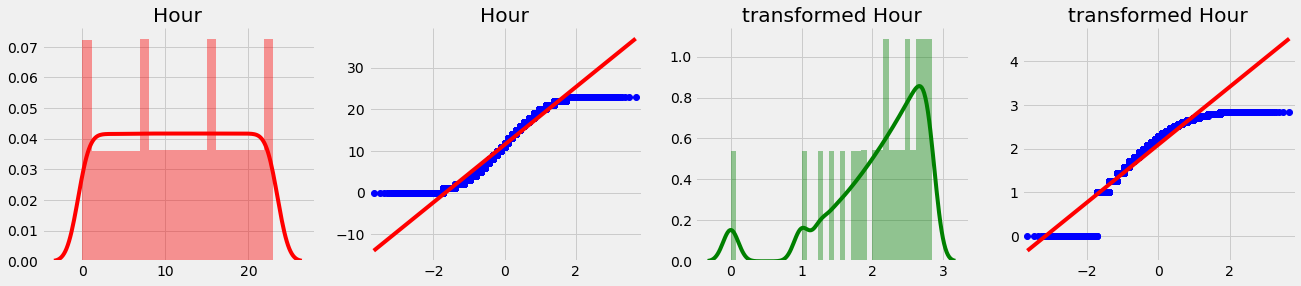

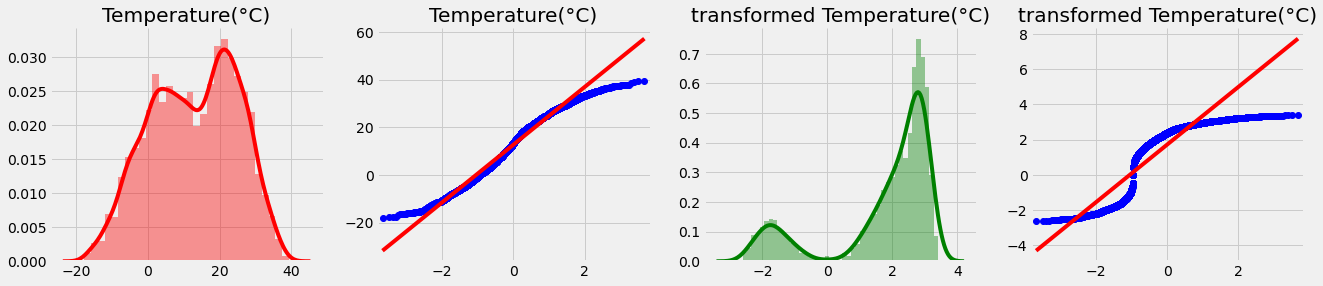

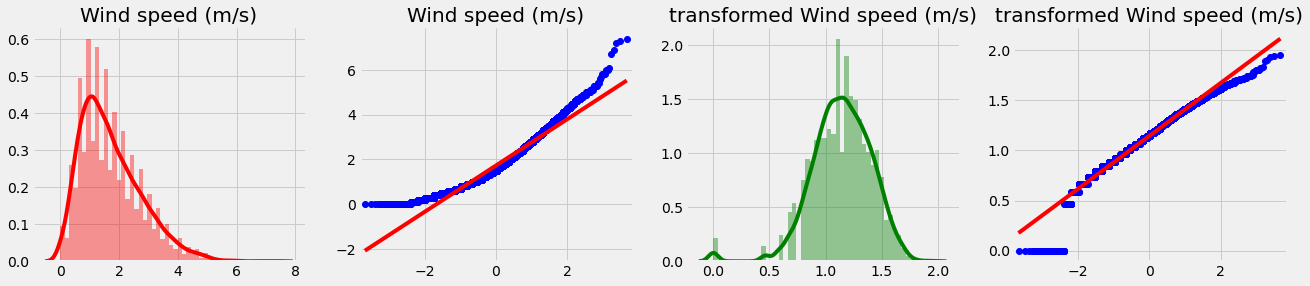

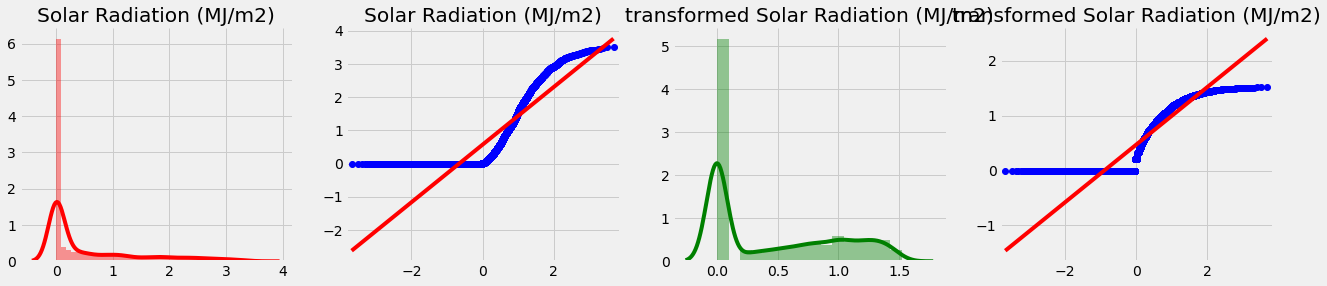

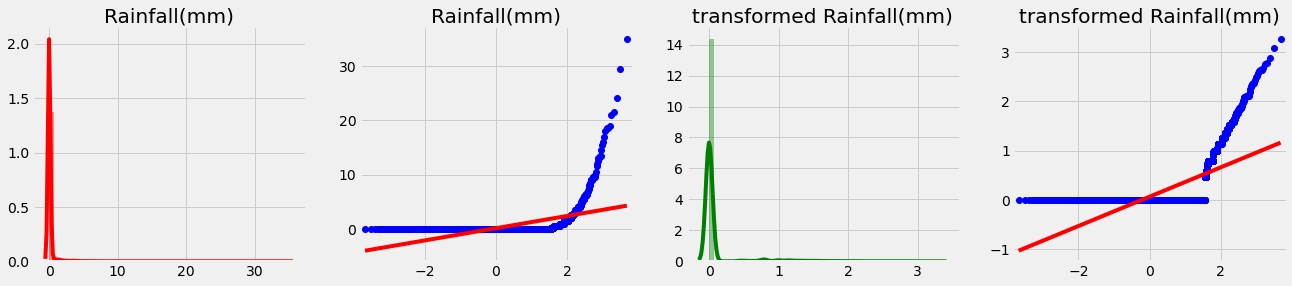

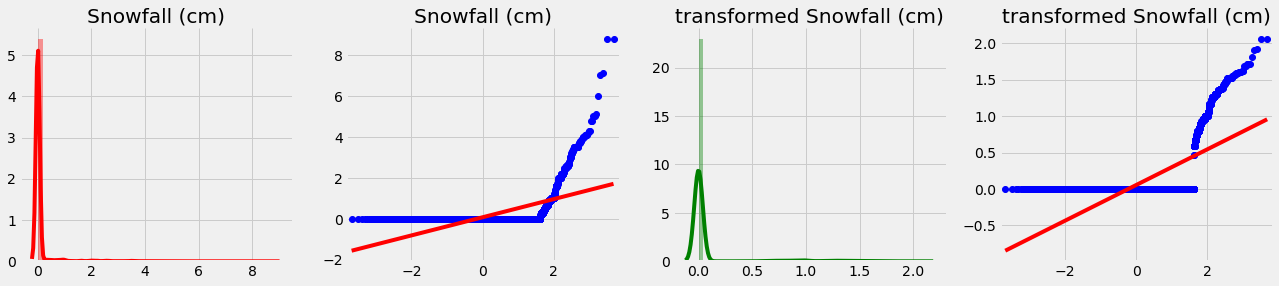

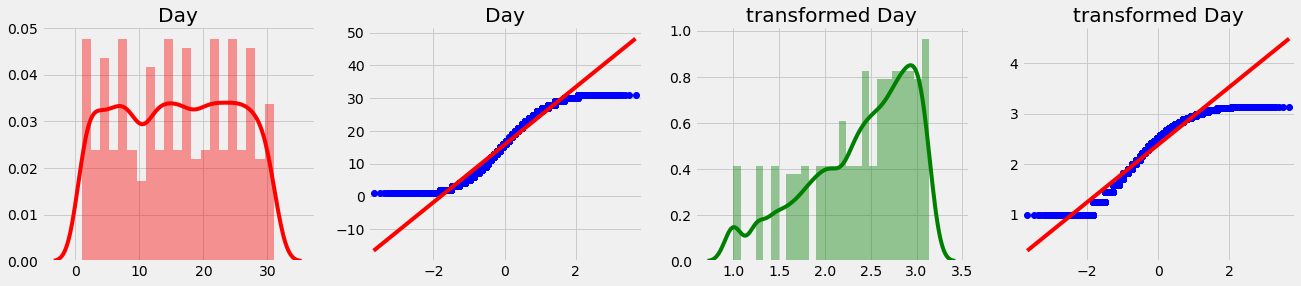

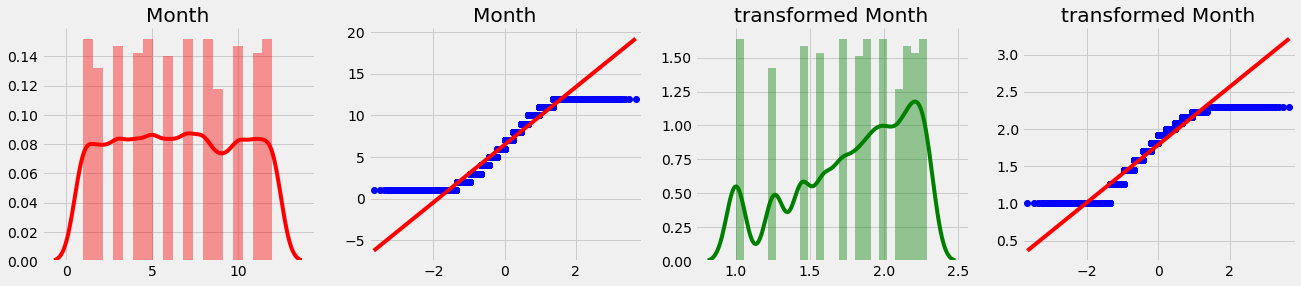

In [177]:
# Applying cube root transformation
transformation(features,np.cbrt)

##Conclusions:

#### All the transformation we applied has more or less similar behaviour.It is clear from the visualization that only feature 'Rented Bike Count' and 'Wind speed' shows a change in the distribution.That's why i will apply square root transformation on mentioned two features.

In [178]:
# Applying square root transformation on wind speed.
x['Wind speed (m/s)'] = np.sqrt(x['Wind speed (m/s)'])

In [179]:
# Applying square root transformation on 'Rented Bike Count'
y = np.sqrt(y)

##OUTLIER TREATMENT

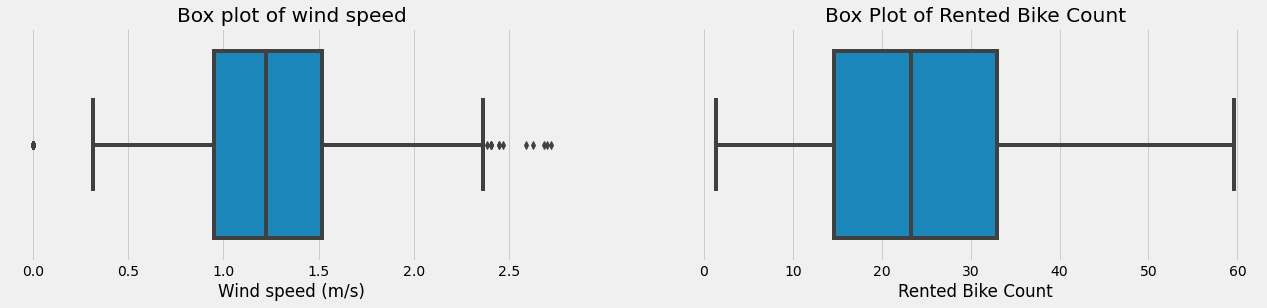

In [180]:
fig,axes = plt.subplots(nrows = 1,ncols = 2,figsize = (20,4))
# Plotting boxplot for "Wind Speed"
sns.boxplot(x['Wind speed (m/s)'],ax = axes[0]).set_title('Box plot of wind speed')
# Plotting boxplot for "Rented Bike Count"
sns.boxplot(y,ax = axes[1]).set_title('Box Plot of Rented Bike Count');


##Conclusions

####1)There are no outliers present in "Rented Bike Count".
####2)There might be outlier present in "Wind Speed"

In [181]:
# Outliers detection code
percentile_25 = x['Wind speed (m/s)'].quantile(0.25)
percentile_75 = x['Wind speed (m/s)'].quantile(0.75)
IQR = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * IQR
lower_limit = percentile_25 - 1.5 * IQR


In [182]:
# Checking number of datapoints which are outliers
x[(x['Wind speed (m/s)'] > upper_limit) | (x['Wind speed (m/s)'] < lower_limit)].shape[0]

84

In [183]:
# Stastical analysis of "Wind Speed" 
x['Wind speed (m/s)'].describe().to_frame()

Wind speed (m/s)
count       8465.000000
mean           1.250323
std            0.403231
min            0.000000
25%            0.948683
50%            1.224745
75%            1.516575
max            2.720294

In [184]:
# Checking datapoints which are outliers
outlier_df = x[(x['Wind speed (m/s)'] > upper_limit) | (x['Wind speed (m/s)'] < lower_limit)]
outlier_df.sample(5)

Hour  Temperature(°C)  Wind speed (m/s)  Solar Radiation (MJ/m2)  \
4677    21             21.8          0.000000                      0.0   
1899     3             -4.5          0.000000                      0.0   
111     15             -0.7          0.000000                      0.0   
5353     1             26.6          0.000000                      0.0   
3140    20             19.1          2.469818                      0.0   

      Rainfall(mm)  Snowfall (cm)  Day  Month  Holiday_No Holiday  \
4677           0.0            0.0   13      6                   1   
1899           0.0            0.0   18      2                   1   
111            0.0            0.0   12      5                   1   
5353           0.0            0.0    7     12                   1   
3140           0.0            0.0    4     10                   1   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  
4677               0               1               0  
1899               0               0               1  
111                0               0               1  
5353               0               1               0  
3140               1               0               0

In [185]:
# Checking unique value present in "Wind Speed"
outlier_df['Wind speed (m/s)'].unique()

array([2.40831892, 0.        , 2.58843582, 2.44948974, 2.7202941 ,
       2.68328157, 2.46981781, 2.70185122, 2.62678511, 2.38746728])

In [186]:
# Checking datapoints having 0 as "Wind Speed"
outlier_df[outlier_df['Wind speed (m/s)'] == 0.].shape[0]

71

###Out of 84 outliers data point 71 data point are having 0 wind speed.So what's is the significance of 0 wind speed?

0 Wind speed means air isn't moving at all, and if it isn't moving, it can't be going in a particular direction. Usually, in weather observations, a wind speed that rounds off to zero is reported as "Calm," and that way no direction is given. However, it is possible for wind speed to be very slight, say one third of a mile per hour.(Source - https://www.wral.com/weather/blogpost/1116592/)

###So according to above analysis I am not doing any outlier treatment on "Wind Speed" so keeping these data points as it is.

### 6. Dimesionality Reduction

In [187]:
print(f'Number of features are {x.shape[1]}')

Number of features are 12


##### Do you think that dimensionality reduction is needed? Explain Why?

As the input dataset has only 12 features so dimensionality reduction technique not required.

### 7. Data Splitting

In [188]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=10)

In [189]:
# Getting the shape of Train Test set.

print("Training Dataset Shape:--")
print("x_train shape ", x_train.shape)
print("y_train shape ", y_train.shape)
print("Testing Dataset Shape:--")
print("x_test shape ",x_test.shape)
print("y_test shape ",y_test.shape)

Training Dataset Shape:--
x_train shape  (6772, 12)
y_train shape  (6772,)
Testing Dataset Shape:--
x_test shape  (1693, 12)
y_test shape  (1693,)


##### What data splitting ratio have you used and why? 

As the dataset is small using an 80:20 data splitting ratio provides a good balance between having enough data for training and testing the model's performance. With 8465 rows, 80% of the data will be used for training, which is 6772 rows, and 20% of the data will be used for testing, which is 1693 rows. This provides a large enough training set while also having a good representation of the test set to evaluate the model performance. Using a different ratio, such as 70:30 or 90:10, would result in a smaller training or test set, which may not be ideal for effectively training or evaluating the model.

### 8. Data Scaling

In [190]:
# Importing library
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [191]:
# Using MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##### Which method have you used to scale you data and why?

I have used MinMaxScaler for scaling my data as it is a common normalization technique which transforms features by subtracting from the minimum value and dividing by maximum value, resulting in values between 0 and 1. This is useful in cases where we want to bound our values to a range and have the same scale across the features. This method is also scale-invariant and have some immunity towards outliers, unlike the StandardScaler.

## ***7. ML Model Implementation***

### ML Model - 1

###LINEAR REGRESSION

In [192]:
# importing libraries
from sklearn.linear_model import LinearRegression

In [193]:
# ML Model - 1 Implementation
linear_reg = LinearRegression()

# Fit the Algorithm
linear_reg.fit(x_train,y_train)

LinearRegression()

In [194]:
# Checking Coefficient
linear_reg.coef_

array([ 13.75974908,  23.22600012,   3.9254016 ,   3.6827427 ,
       -74.87344711,  -9.64688481,   0.32670654,   0.69482499,
         2.28714582,  -3.55509051,  -3.56084687,  -7.33515682])

In [195]:
# Creating the dataframe
pd.DataFrame(index = x.columns,data = linear_reg.coef_,columns = ['coefficient'])

coefficient
Hour                       13.759749
Temperature(°C)            23.226000
Wind speed (m/s)            3.925402
Solar Radiation (MJ/m2)     3.682743
Rainfall(mm)              -74.873447
Snowfall (cm)              -9.646885
Day                         0.326707
Month                       0.694825
Holiday_No Holiday          2.287146
Seasons_Spring             -3.555091
Seasons_Summer             -3.560847
Seasons_Winter             -7.335157

In [196]:
# Checking intercept
linear_reg.intercept_

3.9193039736227036

In [197]:
# Predicting the model on train dataset
y_pred_train = linear_reg.predict(x_train)

# Predicting the model on test dataset
y_pred = linear_reg.predict(x_test)

In [198]:
y_pred.shape

(1693,)

In [199]:
y_test.shape

(1693,)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

###LINEAR REGRESSION:
Linear regression is a widely used supervised machine learning algorithm used in data science to predict the value of a continuous dependent variable based on one or more independent variables. Linear regression models the linear relationship between the independent and dependent variables with the help of a linear equation. The linear equation is expressed in the form of y = a0 + a1X1 + a2X2 + … + an*Xn where y is the dependent variable, a0 is the intercept, ai's are the coefficients, and Xn's are the independent variables. 


The linear regression model is used to find the best fit line or the regression line that minimizes the errors between the predicted values and the observed values. The errors are typically measured using the Root Mean Squared Error (RMSE), which is the sum of the squared errors divided by the number of observations. The best fitting line is found by optimizing the cost function using gradient descent. 


Once the best fitting line is found, the coefficients and the intercept are used to make predictions on new data points. Linear regression is a simple and effective algorithm that can be used to make predictions on a variety of applications. It is important to note that linear regression assumes that there is a linear relationship between the independent and dependent variables and that the data is normally distributed.


It is also important to note that linear regression is prone to overfitting, which can lead to inaccurate predictions. To avoid this, it is important to use regularization techniques such as L1 and L2 regularization. It is also important to use cross-validation techniques to test the accuracy of the model.Overall, linear regression is a powerful and widely used machine learning algorithm that can be used to make accurate predictions for a variety of applications.


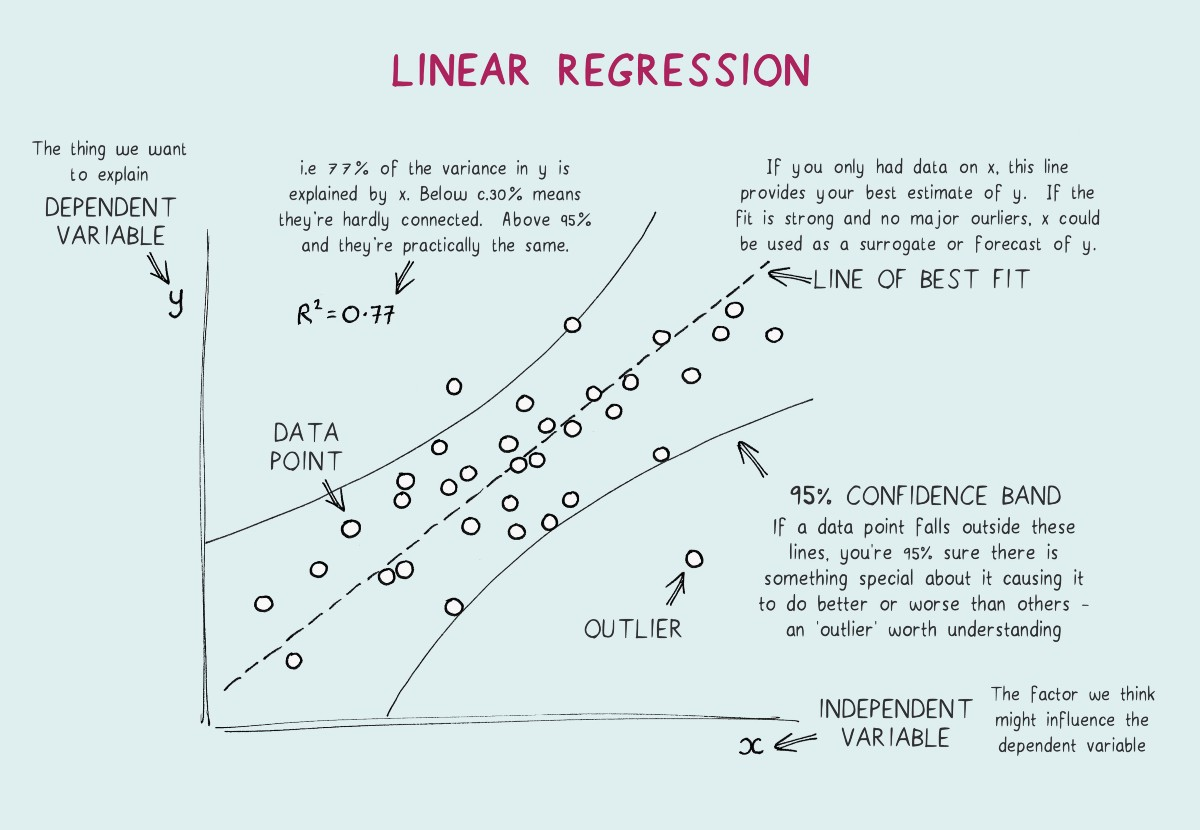

In [200]:
# Importing libraries related to evaluation metrices
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

####EVALUATION ON TRAINING DATASET

In [201]:
#calculating Mean Absolute Error
MAE = mean_absolute_error(y_train,y_pred_train)
print('MAE :',MAE)

#Calculating Mean Squared Error
MSE = mean_squared_error(y_train,y_pred_train)
print('MSE :',MSE)

#Calculating Root Mean Squared Error
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculating R2 Score
R2_score = r2_score(y_train,y_pred_train)
print('r2_score :',R2_score)



MAE : 5.844683855813622
MSE : 59.72211827376597
RMSE : 7.728008687479975
r2_score : 0.5704269025504376


In [202]:
# Creating a function to calculate adjusted r2 score
def adjusted_r2_score(r2, n, p):
    """Calculate adjusted R2 score.
    
    Parameters
    ----------
    r2 : float
        R2 score.
    n : int
        Number of observations.
    p : int
        Number of predictors.
    
    Returns
    -------
    float
        Adjusted R2 score.
    """
    return (1 - (((1 - r2) * (n - 1)) / (n - p - 1)))


In [203]:
# Calculating adjusted r2 score
adjusted_r2=adjusted_r2_score(R2_score,x_train.shape[0],x_train.shape[1])
print('adjusted_r2_score :',adjusted_r2)

adjusted_r2_score : 0.5696642339353475


In [204]:
# Creating a dictionary of training dataset metrics evaluation
train_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(R2_score,4),
            'adjusted_r2_score':round(adjusted_r2,4)}

In [205]:
# Creating a dataframe of metrices
training_metrics_df = pd.DataFrame(train_dict,index = [1])
training_metrics_df

Model     MAE      MSE   RMSE  R2_Score  adjusted_r2_score
1  Linear Regression  5.8447  59.7221  7.728    0.5704             0.5697

####EVALUATION ON TEST DATASET

In [206]:
#calculating Mean Absolute Error
MAE = mean_absolute_error(y_test,y_pred)
print('MAE :',MAE)

#Calculating Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print('MSE :',MSE)

#Calculating Root Mean Squared Error
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculating R2 Score
R2_score = r2_score(y_test,y_pred)
print('r2_score :',R2_score)


MAE : 5.94372147300092
MSE : 62.89088740368733
RMSE : 7.930377507009823
r2_score : 0.5717221397968368


In [207]:
# Calculating adjusted r2 score
adjusted_r2=adjusted_r2_score(R2_score,x_test.shape[0],x_test.shape[1])
print('adjusted_r2_score :',adjusted_r2)

adjusted_r2_score : 0.5686630122239571


In [208]:
# Creating a dictionary of testing dataset metrics evaluation
test_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(R2_score,4),
            'adjusted_r2_score':round(adjusted_r2,4)}

In [209]:
# Creating a dataframe of metrices
testing_metrics_df = pd.DataFrame(test_dict,index = [1])
testing_metrics_df

Model     MAE      MSE    RMSE  R2_Score  adjusted_r2_score
1  Linear Regression  5.9437  62.8909  7.9304    0.5717             0.5687

 R-squared score and the adjusted R-squared score are very similar, it means that the number of features in the model is not much larger than the number of observations in the dataset. This is a good indication that the model is not overfitting the training data, and that the features in the model are providing useful information for predicting the target variable.

In [210]:
# Visualizing evaluation Metric Score chart

###PREDICTED VS ACTUAL VISUALISATION

In [211]:
# Creating a function for predicted vs actual
def pred_vs_actual_visual(y_pred,y_test):
  plt.figure(figsize = (16,6))
  plt.plot(y_pred)
  plt.plot(y_test.values)
  plt.legend(['Predicted','actual'])
  plt.title('Predicted vs Actual')
  plt.show()



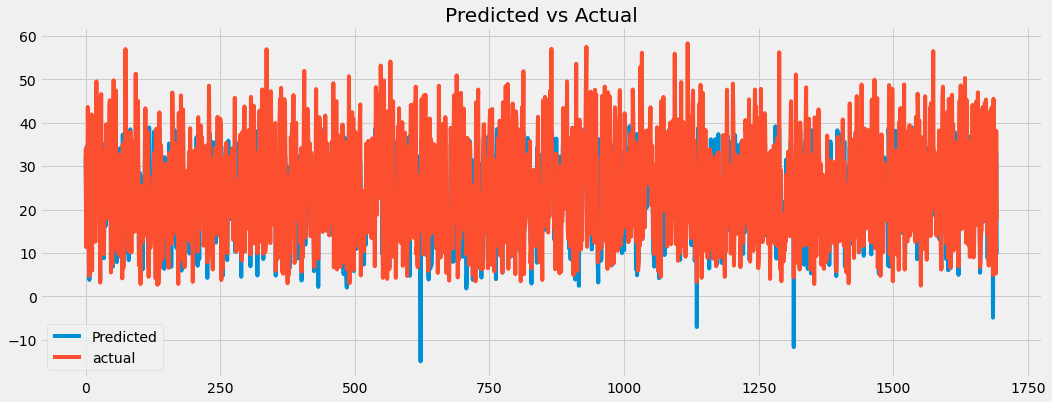

In [212]:
# visuialization
pred_vs_actual_visual(y_pred,y_test)

In [213]:
#Creating a function for visualization

def visualize_predictions_scatter(model, X_test, y_test):
    # make predictions on the test data
    y_pred = model.predict(X_test)
    
    # create a scatter plot of the predicted vs actual values
    plt.figure(figsize=(16,6))
    plt.scatter(y_pred, y_test,c=y_test)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Predicted vs Actual Values')
    
    # add a line of best fit
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    plt.plot([xmin, xmax], [ymin, ymax], 'r-', linewidth=2)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.colorbar()
    plt.show()


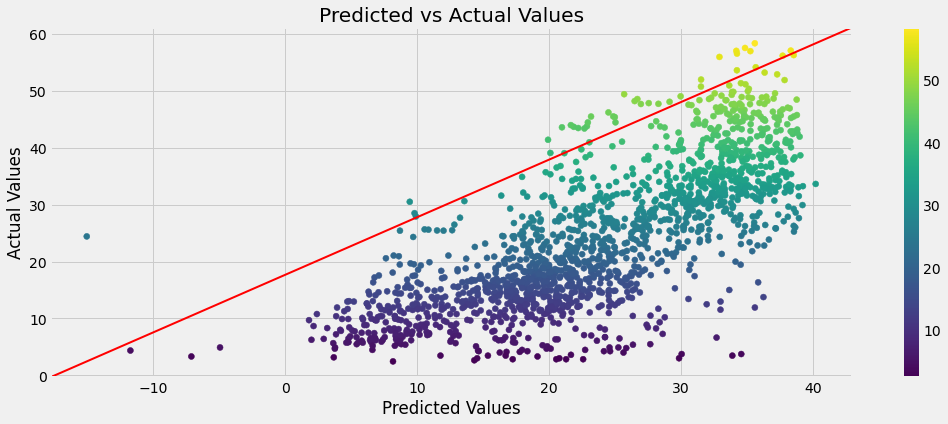

In [214]:
# Creating the plot
visualize_predictions_scatter(linear_reg,x_test,y_test)

One way to visualize the predicted vs actual values of a model is to create a scatter plot, with the predicted values on the x-axis and the actual values on the y-axis. Points on the scatter plot that fall on the y = x line indicate that the model is making accurate predictions. Points that deviate from this line indicate that the model is making errors.Hence model trained on "Linear Regression" is making lot of errors.

In [215]:
# creating a function for residual visualization
def visualize_predictions_residual(model, X_test, y_test):
    # make predictions on the training data
    y_pred = model.predict(X_test)
    
    #create residual plot
    plt.figure(figsize=(16,6))
    residuals = y_test - y_pred
    colors = ['red' if x > 0 else 'green' for x in residuals]
    plt.scatter(y_pred, residuals,c = colors)
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.axhline(y=0)
    plt.title('Residual plot')
    plt.show()

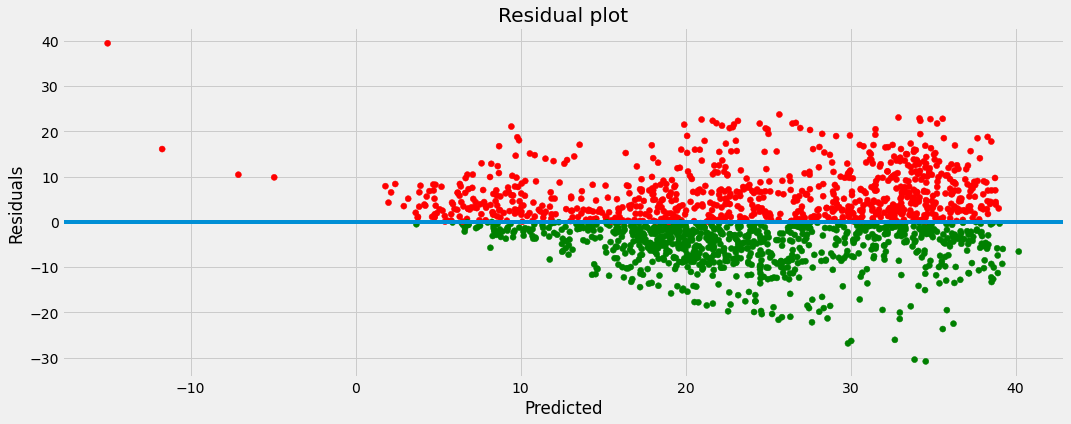

In [216]:
#Visualising the plot
visualize_predictions_residual(linear_reg,x_test,y_test)

A residual plot is a scatter plot used to visualize the difference between actual and predicted values in a dataset. It shows the residuals (actual - predicted) on the y-axis and the predicted values on the x-axis. The purpose of a residual plot is to check for patterns in the residuals that may indicate a problem with the model being used for prediction. Ideally, the residuals should be randomly scattered around zero, indicating that the model is working well. If there is a pattern in the residuals, it may indicate that the model is not capturing some important aspect of the data and a different model may be needed. It can also be used to check assumptions of the model like normality of errors, overfitting and underfitting.

#### 2. Cross- Validation & Hyperparameter Tuning

In [217]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

####CROSS VALIDATION

In [218]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(linear_reg, x, y, cv=5)

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score: ", scores.mean())
print("Standard deviation: ", scores.std())

Cross-validation scores: [-0.33799173  0.37475757  0.33579871 -0.01266681  0.43387763]
Mean score:  0.15875507606880174
Standard deviation:  0.2932019090048883


####HYPERPARAMETER TUNING

In [219]:
# Finding parameters avaailable in linear regression
linear_reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

##### Which hyperparameter optimization technique have you used and why?

Hyperparameter tuning is not applicable to linear regression models since they do not have any adjustable parameters.

### ML Model - 2

####RIDGE REGRESSION

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Ridge regression is a form of regularized linear regression which adds a penalty term to the sum of the squares of the regression coefficients. The penalty term, usually denoted by lambda, shrinks the regression coefficients in order to reduce the variance of the model and reduce overfitting. The penalty term helps to reduce the complexity of the model and make it more robust to changes in the data. It is especially useful in cases where there is multicollinearity between the independent variables. The penalty term is adjusted by changing the value of lambda. The higher the value of lambda, the more the coefficients are shrunk. This helps to reduce the variance of the model and reduce overfitting.

In [220]:
from sklearn.linear_model import Ridge

In [221]:
# ML Model - 1 Implementation
ridge_reg = Ridge()

# Fitting & training of model
ridge_reg.fit(x_train,y_train)

Ridge()

In [222]:
# Checking coefficient
ridge_reg.coef_

array([ 13.74599578,  22.84675779,   3.87457871,   3.86584655,
       -65.54441131,  -9.21034561,   0.32708347,   0.71142633,
         2.25512762,  -3.56547337,  -3.5022577 ,  -7.39961637])

In [223]:
# Checking interceppt
ridge_reg.intercept_

4.104959384958388

In [224]:
# Creating a dataframe of coefficient
pd.DataFrame(ridge_reg.coef_,x.columns,columns=['Coefficient'])

Coefficient
Hour                       13.745996
Temperature(°C)            22.846758
Wind speed (m/s)            3.874579
Solar Radiation (MJ/m2)     3.865847
Rainfall(mm)              -65.544411
Snowfall (cm)              -9.210346
Day                         0.327083
Month                       0.711426
Holiday_No Holiday          2.255128
Seasons_Spring             -3.565473
Seasons_Summer             -3.502258
Seasons_Winter             -7.399616

In [225]:
# Prediction on training dataset
y_train_pred_ridge = ridge_reg.predict(x_train)

# Predicting on test dataset
y_pred_ridge = ridge_reg.predict(x_test)

####EVALUATION ON TRAINING DATASET

In [226]:
#calculating Mean Absolute Error
MAE = mean_absolute_error(y_train,y_train_pred_ridge)
print('MAE :',MAE)

#Calculating Mean Squared Error
MSE = mean_squared_error(y_train,y_train_pred_ridge)
print('MSE :',MSE)

#Calculating Root Mean Squared Error
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculating R2 Score
R2_score = r2_score(y_train,y_train_pred_ridge)
print('r2_score :',R2_score)

MAE : 5.854938007622742
MSE : 59.814200506908584
RMSE : 7.733964087510918
r2_score : 0.569764567535296


In [227]:
# Calculating adjusted r2 score
adjusted_r2=adjusted_r2_score(R2_score,x_train.shape[0],x_train.shape[1])
print('adjusted_r2_score :',adjusted_r2)

adjusted_r2_score : 0.5690007230036233


In [228]:
# # Creating a dictionary of training dataset metrics evaluation
train_dict={'Model':"Ridge Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(R2_score,4),
            'adjusted_r2_score':round(adjusted_r2,4)}

In [229]:
training_metrics_df = training_metrics_df.append(train_dict,ignore_index = True)
training_metrics_df

Model     MAE      MSE   RMSE  R2_Score  adjusted_r2_score
0  Linear Regression  5.8447  59.7221  7.728    0.5704             0.5697
1   Ridge Regression  5.8549  59.8142  7.734    0.5698             0.5690

####EVALUATION ON TEST DATA

In [230]:
#calculating Mean Absolute Error
MAE = mean_absolute_error(y_test,y_pred_ridge)
print('MAE :',MAE)

#Calculating Mean Squared Error
MSE = mean_squared_error(y_test,y_pred_ridge)
print('MSE :',MSE)

#Calculating Root Mean Squared Error
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculating R2 Score
R2_score = r2_score(y_test,y_pred_ridge)
print('r2_score :',R2_score)

MAE : 5.955556102176318
MSE : 63.058378452468816
RMSE : 7.940930578494489
r2_score : 0.5705815499445284


In [231]:
# Calculating adjusted r2 score
adjusted_r2=adjusted_r2_score(R2_score,y_test.shape[0],x_test.shape[1])
print('adjusted_r2_score :',adjusted_r2)

adjusted_r2_score : 0.567514275301275


In [232]:
# Creating a dictionary of testing dataset metrics evaluation
test_dict={'Model':"Ridge Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(R2_score,4),
            'adjusted_r2_score':round(adjusted_r2,4)}

In [233]:
testing_metrics_df = testing_metrics_df.append(test_dict,ignore_index = True)
testing_metrics_df

Model     MAE      MSE    RMSE  R2_Score  adjusted_r2_score
0  Linear Regression  5.9437  62.8909  7.9304    0.5717             0.5687
1   Ridge Regression  5.9556  63.0584  7.9409    0.5706             0.5675

####PREDICTED VS ACTUAL VISUALIZATION

FIRST VISUALIZATION

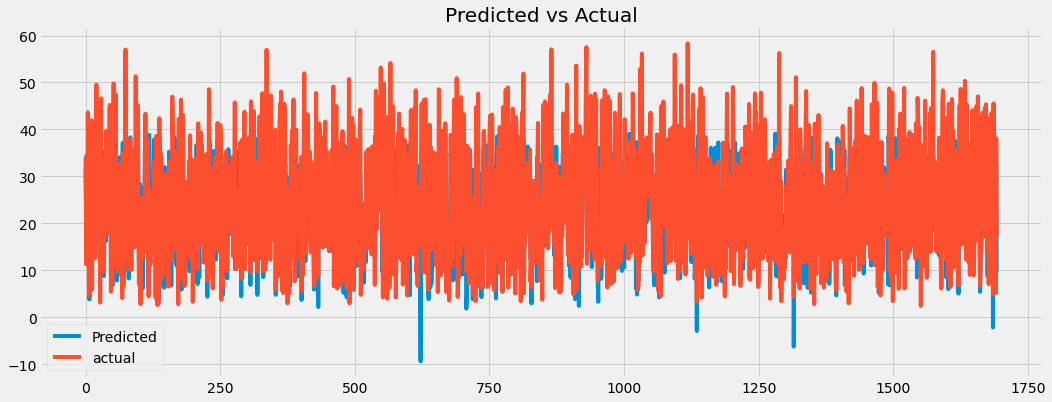

In [234]:
# Function calling
pred_vs_actual_visual(y_pred_ridge,y_test)

SECOND VISUALIZATION

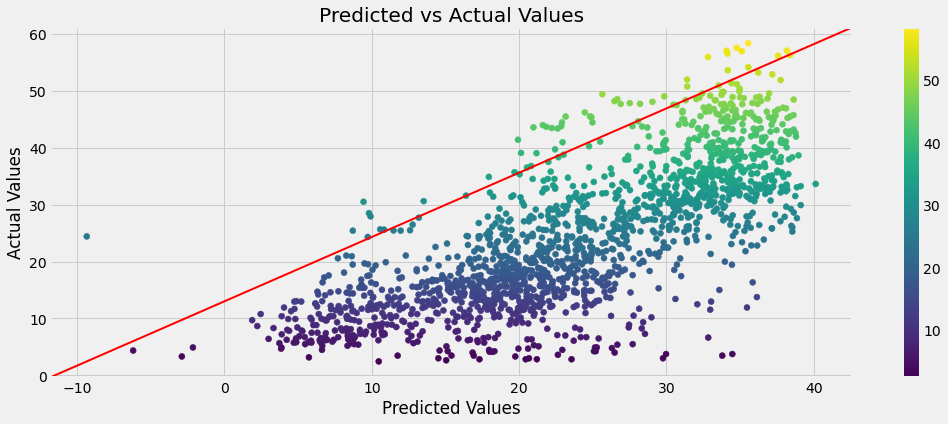

In [235]:
visualize_predictions_scatter(ridge_reg,x_test,y_test)

THIRD VISUALIZATION

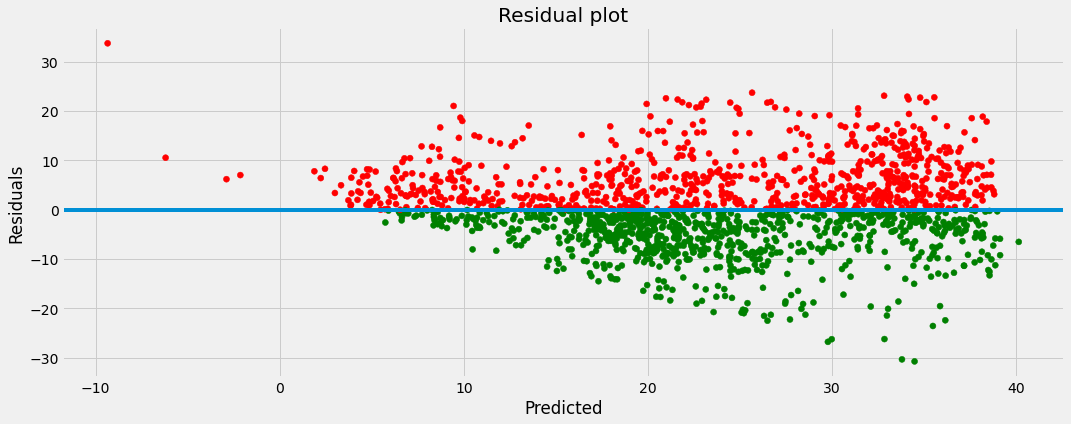

In [236]:
visualize_predictions_residual(ridge_reg,x_test,y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [237]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [238]:
from sklearn.model_selection import GridSearchCV

In [239]:
# Defining the parameter grid
param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

# Creating the GridSearchCV object
grid_search = GridSearchCV(ridge_reg, param_grid,scoring = 'r2',cv=5)

# Fitting the GridSearchCV object to the train data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [240]:
print(f'the best value of alpha is :{grid_search.best_params_}')
print(f'the best r2 score found is {grid_search.best_score_}')

the best value of alpha is :{'alpha': 0.1}
the best r2 score found is 0.5665681371411625


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV hyperparameter optimization technique because it is a simple and widely-used technique for hyperparameter optimization that can be easily implemented using the GridSearchCV function in scikit-learn library. It allows me to specify a range of values for each hyperparameter and evaluate the model's performance for each combination of values using cross-validation. This allows me to systematically explore the hyperparameter space and find the best set of hyperparameters for the model.

In [241]:
# Make predictions on the test set
y_pred_ridgecv = grid_search.predict(x_test)

In [242]:
#calculate other metrics
mae = mean_absolute_error(y_test, y_pred_ridgecv)
mse = mean_squared_error(y_test, y_pred_ridgecv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ridgecv)
adj_r2 = 1 - ((1-r2)*(y_test.shape[0]-1)/(y_test.shape[0]-x_test.shape[1]-1))

# Print the results
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2_Score: ", r2)
print("adjusted_r2_score:", adj_r2)

MAE:  5.945011407410653
MSE:  62.90100701512299
RMSE:  7.931015509701327
R2_Score:  0.5716532267044847
adjusted_r2_score: 0.5685936068952311


In [243]:
# Creating a dictionary of testing dataset metrics evaluation through GridSearchCV
test_dict={'Model':"Ridge Regression GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(r2,4),
            'adjusted_r2_score':round(adj_r2,4)}

In [244]:
# Creating a dataframe of metrices
testing_metrics_df = testing_metrics_df.append(test_dict,ignore_index = True)
testing_metrics_df

Model     MAE      MSE    RMSE  R2_Score  \
0              Linear Regression  5.9437  62.8909  7.9304    0.5717   
1               Ridge Regression  5.9556  63.0584  7.9409    0.5706   
2  Ridge Regression GridSearchCV  5.9556  63.0584  7.9409    0.5717   

   adjusted_r2_score  
0             0.5687  
1             0.5675  
2             0.5686

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No,there is not any significant improvement. 

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

LASSO REGRESSION

In [245]:
from sklearn.linear_model import Lasso

In [246]:
# ML Model - 3 Implementation
lasso_reg = Lasso()

# Fit the Algorithm
lasso_reg.fit(x_train,y_train)


Lasso()

In [247]:
# Checking coefficient
lasso_reg.coef_

array([ 5.58633783,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -8.20951401])

In [248]:
# Checking intercept
lasso_reg.intercept_

23.520364838415624

In [249]:
# Creating a dataframe of coefficient
pd.DataFrame(lasso_reg.coef_ ,x.columns,columns = ['Coefficient'])

Coefficient
Hour                        5.586338
Temperature(°C)             0.000000
Wind speed (m/s)            0.000000
Solar Radiation (MJ/m2)     0.000000
Rainfall(mm)               -0.000000
Snowfall (cm)              -0.000000
Day                         0.000000
Month                       0.000000
Holiday_No Holiday          0.000000
Seasons_Spring             -0.000000
Seasons_Summer              0.000000
Seasons_Winter             -8.209514

In [250]:
# Prediction on training dataset
y_train_pred_lasso = lasso_reg.predict(x_train)

# Prediction on testing dataset
y_pred_lasso= lasso_reg.predict(x_test)

####EVALUATION ON TRAINING DATASET

In [251]:
#calculating Mean Absolute Error
MAE = mean_absolute_error(y_train,y_train_pred_lasso)
print('MAE :',MAE)

#Calculating Mean Squared Error
MSE = mean_squared_error(y_train,y_train_pred_lasso)
print('MSE :',MSE)

#Calculating Root Mean Squared Error
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculating R2 Score
R2_score = r2_score(y_train,y_train_pred_lasso)
print('r2_score :',R2_score)

MAE : 7.778416470632817
MSE : 95.96673725885918
RMSE : 9.79626139192188
r2_score : 0.309724273552347


In [252]:
# Calling the created function to calculate adjusted r2 score
adjusted_r2=adjusted_r2_score(R2_score,x_train.shape[0],x_train.shape[1])
print('adjusted_r2_score :',adjusted_r2)

adjusted_r2_score : 0.30849875073575106


In [253]:
# Creating a dictionary of training dataset metrics evaluation
train_dict={'Model':"Lasso Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(R2_score,4),
            'adjusted_r2_score':round(adjusted_r2,4)}

In [254]:
# Creating a dataframe of metrices
training_metrics_df = pd.DataFrame(train_dict,index = [1])
training_metrics_df

Model     MAE      MSE    RMSE  R2_Score  adjusted_r2_score
1  Lasso Regression  7.7784  95.9667  9.7963    0.3097             0.3085

EVALUATION ON TESTING DATASET

In [255]:
#calculating Mean Absolute Error
MAE = mean_absolute_error(y_test,y_pred_lasso)
print('MAE :',MAE)

#Calculating Mean Squared Error
MSE = mean_squared_error(y_test,y_pred_lasso)
print('MSE :',MSE)

#Calculating Root Mean Squared Error
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculating R2 Score
R2_score = r2_score(y_test,y_pred_lasso)
print('r2_score :',R2_score)

MAE : 8.093904170011088
MSE : 101.63803749408683
RMSE : 10.081569198001214
r2_score : 0.30785964373808106


In [256]:
# Calculating adjusted r2 score
adjusted_r2=adjusted_r2_score(R2_score,x_test.shape[0],x_test.shape[1])
print('adjusted_r2_score :',adjusted_r2)

adjusted_r2_score : 0.3029157840504959


In [257]:
# Creating a dictionary of testing dataset metrics evaluation
test_dict={'Model':"Lasso Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(R2_score,4),
            'adjusted_r2_score':round(adjusted_r2,4)}

In [258]:
# Creating a dataframe of metrices
testing_metrics_df = testing_metrics_df.append(test_dict,ignore_index = True)
testing_metrics_df

Model     MAE       MSE     RMSE  R2_Score  \
0              Linear Regression  5.9437   62.8909   7.9304    0.5717   
1               Ridge Regression  5.9556   63.0584   7.9409    0.5706   
2  Ridge Regression GridSearchCV  5.9556   63.0584   7.9409    0.5717   
3               Lasso Regression  8.0939  101.6380  10.0816    0.3079   

   adjusted_r2_score  
0             0.5687  
1             0.5675  
2             0.5686  
3             0.3029

####PREDICTED VS ACTUAL VISUALIZATION

FIRST VISUALIZATION

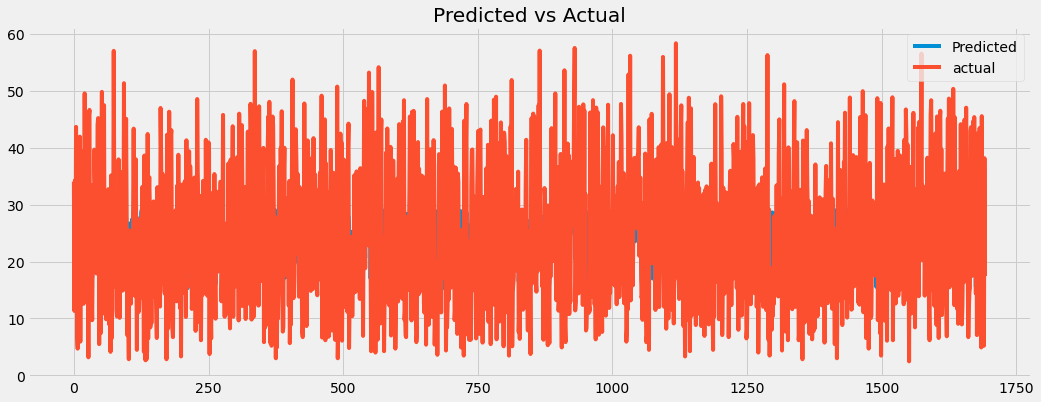

In [259]:
# visuialization
pred_vs_actual_visual(y_pred_lasso,y_test)

SECOND VISUALIZATION

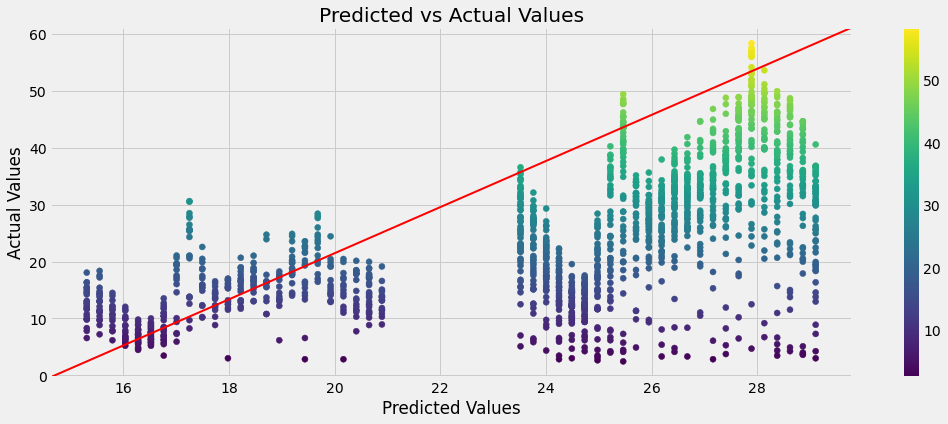

In [260]:
# Visualization
visualize_predictions_scatter(lasso_reg,x_test,y_test)

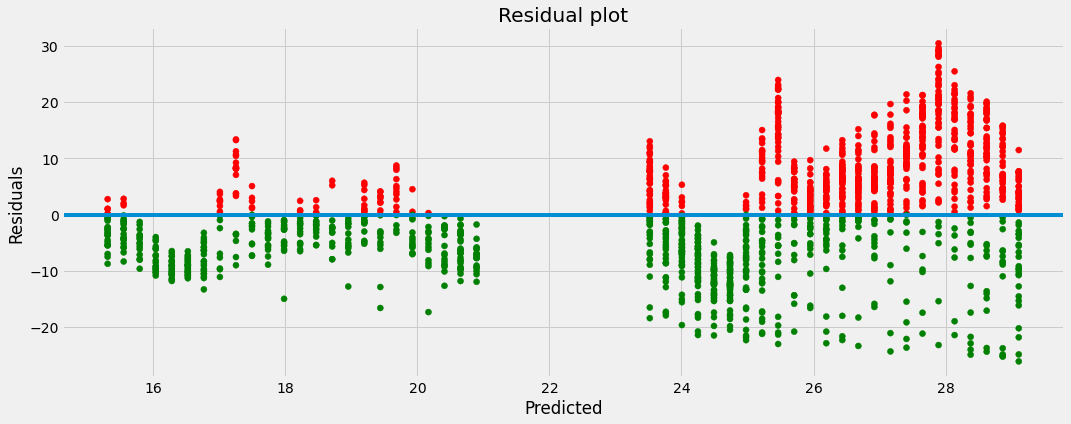

In [261]:
#Visualization
visualize_predictions_residual(lasso_reg,x_test,y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [262]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [263]:
# Defining the parameter grid
param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

# Creating the GridSearchCV object
grid_search = GridSearchCV(lasso_reg, param_grid,scoring = 'r2',cv=5)

# Fitting the GridSearchCV object to the train data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [264]:
print(f'the best value of alpha is :{grid_search.best_params_}')
print(f'the best r2 score found is {grid_search.best_score_}')

the best value of alpha is :{'alpha': 0.001}
the best r2 score found is 0.566498032440812


In [265]:
# Make predictions on the test set
y_pred_lassocv = grid_search.predict(x_test)

In [266]:
#calculate other metrics
mae = mean_absolute_error(y_test, y_pred_lassocv)
mse = mean_squared_error(y_test, y_pred_lassocv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lassocv)
adj_r2 = 1 - ((1-r2)*(y_test.shape[0]-1)/(y_test.shape[0]-x_test.shape[1]-1))

# Print the results
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2_Score: ", r2)
print("adjusted_r2_score:", adj_r2)

MAE:  5.945414628759015
MSE:  62.90863177524416
RMSE:  7.931496187683895
R2_Score:  0.5716013031892655
adjusted_r2_score: 0.5685413124977603


In [267]:
# Creating a dictionary of testing dataset metrics evaluation through GridSearchCV
test_dict={'Model':"Lasso Regression GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(r2,4),
            'adjusted_r2_score':round(adj_r2,4)}

In [268]:
# Creating a dataframe of metrices
testing_metrics_df = testing_metrics_df.append(test_dict,ignore_index = True)
testing_metrics_df

Model     MAE       MSE     RMSE  R2_Score  \
0              Linear Regression  5.9437   62.8909   7.9304    0.5717   
1               Ridge Regression  5.9556   63.0584   7.9409    0.5706   
2  Ridge Regression GridSearchCV  5.9556   63.0584   7.9409    0.5717   
3               Lasso Regression  8.0939  101.6380  10.0816    0.3079   
4  Lasso Regression GridSearchCV  8.0939  101.6380  10.0816    0.5716   

   adjusted_r2_score  
0             0.5687  
1             0.5675  
2             0.5686  
3             0.3029  
4             0.5685

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV because it  provides a more robust estimate of the model's performance by using cross-validation, which involves dividing the data into multiple subsets, training the model on different subsets, and evaluating its performance on the remaining subsets. This allows the model to be evaluated on unseen data, which is important for ensuring that the model generalizes well to new data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes there is significant improvement in r2 score it goes from 0.3079 to 0.5716

### ML Model - 4

DECESION TREE REGRESSOR

In [269]:
from sklearn.tree import DecisionTreeRegressor

In [270]:
# Create the decision tree regressor
dt_reg = DecisionTreeRegressor(max_depth=7,max_features="auto",)

# Fit the regressor to the training data
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=7, max_features='auto')

In [271]:
# Predicting the model on train dataset.
y_pred_dtreg_train = dt_reg.predict(x_train)

# Predicting the model on test dataset.
y_pred_dtreg = dt_reg.predict(x_test)

####EVALUATION ON TRAINING DATASET

In [272]:
#calculating Mean Absolute Error
MAE = mean_absolute_error(y_train,y_pred_dtreg_train)
print('MAE :',MAE)

#Calculating Mean Squared Error
MSE = mean_squared_error(y_train,y_pred_dtreg_train)
print('MSE :',MSE)

#Calculating Root Mean Squared Error
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculating R2 Score
R2_score = r2_score(y_train,y_pred_dtreg_train)
print('r2_score :',R2_score)


MAE : 3.4741785509743472
MSE : 23.87445123035241
RMSE : 4.886148916104831
r2_score : 0.8282743100651864


In [273]:
# Calculating adjusted r2 score
adjusted_r2=adjusted_r2_score(R2_score,x_train.shape[0],x_train.shape[1])
print('adjusted_r2_score :',adjusted_r2)

adjusted_r2_score : 0.8279694264612187


In [274]:
# Creating a dictionary of training dataset metrics evaluation
train_dict={'Model':"Decision Tree Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(R2_score,4),
            'adjusted_r2_score':round(adjusted_r2,4)}

In [275]:
# Creating a dataframe of metrices
training_metrics_df = pd.DataFrame(train_dict,index = [1])
training_metrics_df

Model     MAE      MSE    RMSE  R2_Score  \
1  Decision Tree Regression  3.4742  23.8745  4.8861    0.8283   

   adjusted_r2_score  
1              0.828

####EVALUATION ON TEST DATASET

In [276]:
#calculating Mean Absolute Error
MAE = mean_absolute_error(y_test,y_pred_dtreg)
print('MAE :',MAE)

#Calculating Mean Squared Error
MSE = mean_squared_error(y_test,y_pred_dtreg)
print('MSE :',MSE)

#Calculating Root Mean Squared Error
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculating R2 Score
R2_score = r2_score(y_test,y_pred_dtreg)
print('r2_score :',R2_score)

MAE : 3.6897382052986147
MSE : 27.22876568792727
RMSE : 5.218118979855411
r2_score : 0.8145760381794981


In [277]:
# Calculating adjusted r2 score
adjusted_r2=adjusted_r2_score(R2_score,x_test.shape[0],x_test.shape[1])
print('adjusted_r2_score :',adjusted_r2)

adjusted_r2_score : 0.8132515813093516


In [278]:
# Creating a dictionary of testing dataset metrics evaluation
test_dict={'Model':"Decision Tree Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(R2_score,4),
            'adjusted_r2_score':round(adjusted_r2,4)}

In [279]:
# Creating a dataframe of metrices
testing_metrics_df = testing_metrics_df.append(test_dict,ignore_index = True)
testing_metrics_df

Model     MAE       MSE     RMSE  R2_Score  \
0              Linear Regression  5.9437   62.8909   7.9304    0.5717   
1               Ridge Regression  5.9556   63.0584   7.9409    0.5706   
2  Ridge Regression GridSearchCV  5.9556   63.0584   7.9409    0.5717   
3               Lasso Regression  8.0939  101.6380  10.0816    0.3079   
4  Lasso Regression GridSearchCV  8.0939  101.6380  10.0816    0.5716   
5       Decision Tree Regression  3.6897   27.2288   5.2181    0.8146   

   adjusted_r2_score  
0             0.5687  
1             0.5675  
2             0.5686  
3             0.3029  
4             0.5685  
5             0.8133

####PREDICTED VS ACTUAL VISUALISATION

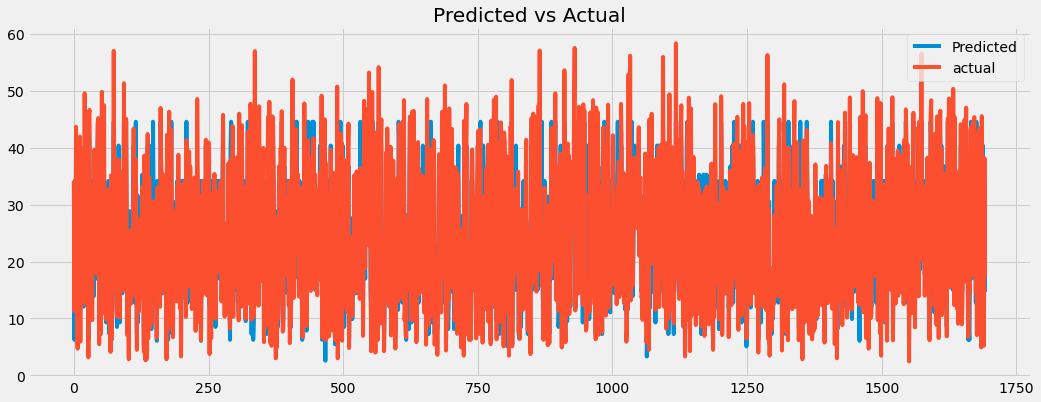

In [280]:
# Visualization
pred_vs_actual_visual(y_pred_dtreg,y_test)

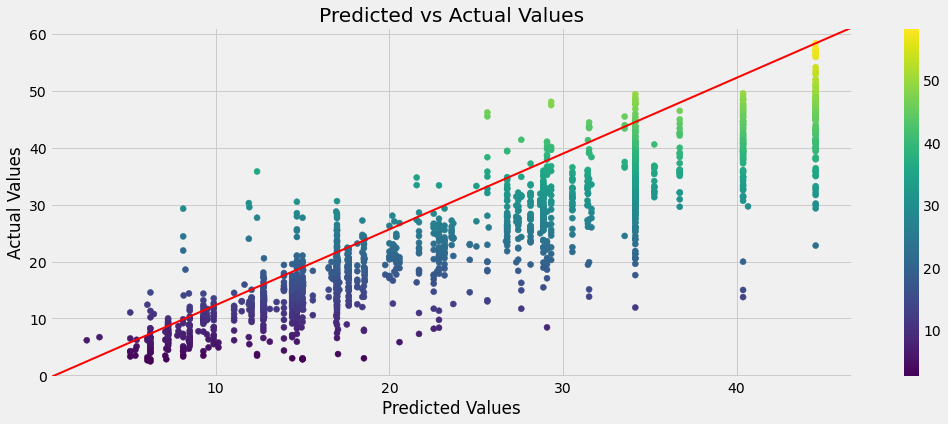

In [281]:
# Visualization
visualize_predictions_scatter(dt_reg,x_test,y_test)

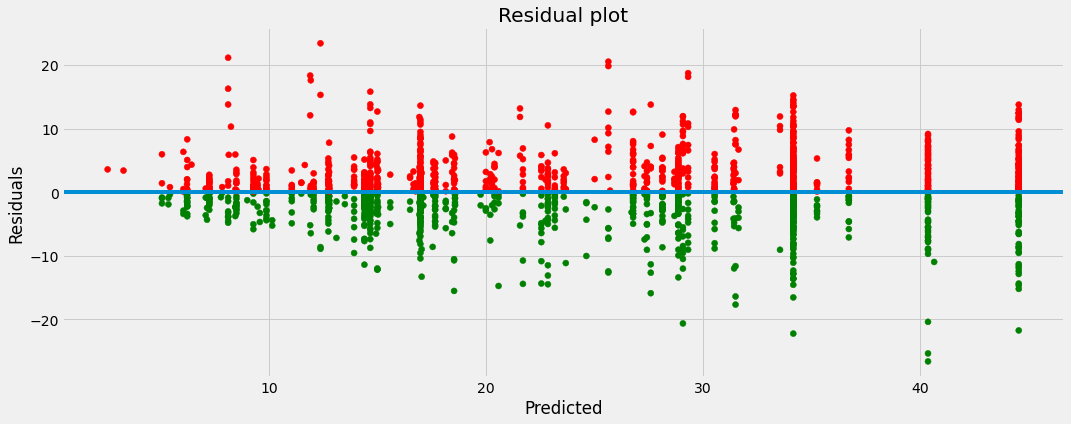

In [282]:
# Visualization
visualize_predictions_residual(dt_reg,x_test,y_test)

####2. Cross- Validation & Hyperparameter Tuning

In [283]:
# Defining the parameter grid
param_grid  = {'criterion' :['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
               'splitter':['best', 'random'],
               'max_depth': [3, 5, 7, 9,11,None],
               'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 4, 6],
              'max_features': ['auto', 'sqrt', 'log2']}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(dt_reg, param_grid, cv=5, scoring='r2') 

# Fitting the GridSearchCV object to the train data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=7, max_features='auto'),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [3, 5, 7, 9, 11, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [284]:
# Showing best parameter
grid_search.best_params_

{'criterion': 'absolute_error',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'splitter': 'best'}

In [285]:
# Training decision tree regressor on optimal parameter.
dt_reg = DecisionTreeRegressor(criterion = 'absolute_error',max_depth=9,max_features='auto',splitter='best',
                               min_samples_leaf = 2,min_samples_split = 2)
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=9,
                      max_features='auto', min_samples_leaf=2)

In [286]:
# Make predictions on the test set
y_pred_dtregcv = dt_reg.predict(x_test)

In [287]:
#calculate other metrics
mae = mean_absolute_error(y_test, y_pred_dtregcv)
mse = mean_squared_error(y_test, y_pred_dtregcv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dtregcv)
adj_r2 = 1 - ((1-r2)*(y_test.shape[0]-1)/(y_test.shape[0]-x_test.shape[1]-1))

# Print the results
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2_Score: ", r2)
print("adjusted_r2_score:", adj_r2)

MAE:  3.3986404269261623
MSE:  26.90229309324997
RMSE:  5.1867420500011345
R2_Score:  0.8167992693984485
adjusted_r2_score: 0.8154906927512946


In [288]:
# Creating a dictionary of testing dataset metrics evaluation through GridSearchCV
test_dict={'Model':"Decision Tree Regressior GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(r2,4),
            'adjusted_r2_score':round(adj_r2,4)}

In [289]:
# Creating a dataframe of metrices
testing_metrics_df = testing_metrics_df.append(test_dict,ignore_index = True)
testing_metrics_df

Model     MAE       MSE     RMSE  R2_Score  \
0                      Linear Regression  5.9437   62.8909   7.9304    0.5717   
1                       Ridge Regression  5.9556   63.0584   7.9409    0.5706   
2          Ridge Regression GridSearchCV  5.9556   63.0584   7.9409    0.5717   
3                       Lasso Regression  8.0939  101.6380  10.0816    0.3079   
4          Lasso Regression GridSearchCV  8.0939  101.6380  10.0816    0.5716   
5               Decision Tree Regression  3.6897   27.2288   5.2181    0.8146   
6  Decision Tree Regressior GridSearchCV  3.6897   27.2288   5.2181    0.8168   

   adjusted_r2_score  
0             0.5687  
1             0.5675  
2             0.5686  
3             0.3029  
4             0.5685  
5             0.8133  
6             0.8155

####FEATURE IMPORTANCE PLOT

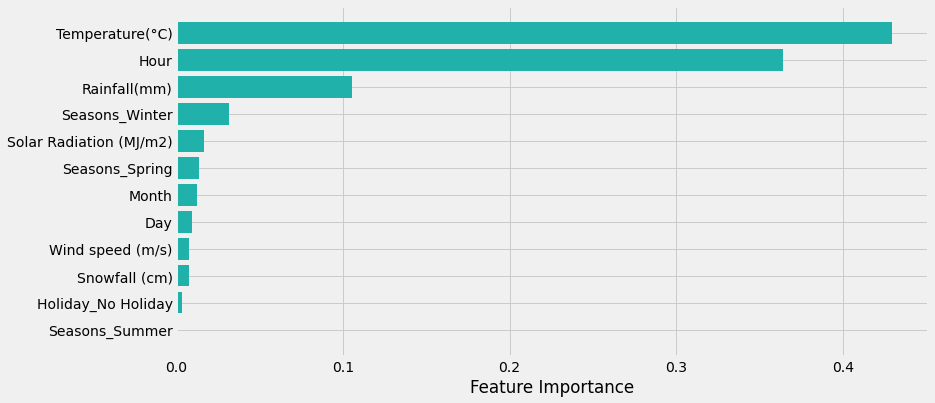

In [290]:
# get the feature importances
importances = dt_reg.feature_importances_

# sort the importances
sorted_idx = importances.argsort()

#create a bar plot
plt.figure(figsize=(12,6))
plt.barh(range(x_train.shape[1]), importances[sorted_idx],color='lightseagreen', align='center')
plt.yticks(range(x_train.shape[1]), x.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()


The feature importance gives an indication of how much each feature contributes to the predictions made by the decision tree regressor. In this case, the feature importance is giving higher weightage to the temperature feature, followed by hour, rainfall, winter season and solar radiation.

From this, we can interpret that the temperature feature has the greatest impact on the predictions made by the decision tree regressor. This means that the temperature feature is the most important feature in determining the output values. It is followed by hour, rainfall, winter season and solar radiation in descending order of importance.

####ML Model - 5

RANDOM FOREST REGRESSOR

In [291]:
from sklearn.ensemble import RandomForestRegressor

In [292]:
# Initialize the random forest regressor
rf_reg = RandomForestRegressor()

# Fit the regressor to the training data
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [293]:
# Predicting the model on train dataset.
y_pred_rfreg_train = rf_reg.predict(x_train)

# Predicting the model on test dataset.
y_pred_rfreg = rf_reg.predict(x_test)

####EVALUATION ON TRAINING DATASET

In [294]:
#calculating Mean Absolute Error
MAE = mean_absolute_error(y_train,y_pred_rfreg_train)
print('MAE :',MAE)

#Calculating Mean Squared Error
MSE = mean_squared_error(y_train,y_pred_rfreg_train)
print('MSE :',MSE)

#Calculating Root Mean Squared Error
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculating R2 Score
R2_score = r2_score(y_train,y_pred_rfreg_train)
print('r2_score :',R2_score)

MAE : 1.0477813155172777
MSE : 2.4691510511529775
RMSE : 1.5713532547307678
r2_score : 0.9822397313462247


In [295]:
# Calculating adjusted r2 score
adjusted_r2=adjusted_r2_score(R2_score,x_train.shape[0],x_train.shape[1])
print('adjusted_r2_score :',adjusted_r2)

adjusted_r2_score : 0.9822081995776427


In [296]:
# Creating a dictionary of training dataset metrics evaluation
train_dict={'Model':"Random Forest Regressior",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(R2_score,4),
            'adjusted_r2_score':round(adjusted_r2,4)}

In [297]:
# Creating a dataframe of metrices
training_metrics_df = pd.DataFrame(train_dict,index = [1])
training_metrics_df

Model     MAE     MSE    RMSE  R2_Score  \
1  Random Forest Regressior  1.0478  2.4692  1.5714    0.9822   

   adjusted_r2_score  
1             0.9822

####EVALUATION ON TEST DATASET

In [298]:
#calculating Mean Absolute Error
MAE = mean_absolute_error(y_test,y_pred_rfreg)
print('MAE :',MAE)

#Calculating Mean Squared Error
MSE = mean_squared_error(y_test,y_pred_rfreg)
print('MSE :',MSE)

#Calculating Root Mean Squared Error
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculating R2 Score
R2_score = r2_score(y_test,y_pred_rfreg)
print('r2_score :',R2_score)

MAE : 2.746938808007483
MSE : 17.14873082010053
RMSE : 4.141102609221429
r2_score : 0.8832196198204371


In [299]:
# Calculating adjusted r2 score
adjusted_r2=adjusted_r2_score(R2_score,x_test.shape[0],x_test.shape[1])
print('adjusted_r2_score :',adjusted_r2)

adjusted_r2_score : 0.882385474247726


In [300]:
# Creating a dictionary of testing dataset metrics evaluation
test_dict={'Model':"Random Forest Regressior",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(R2_score,4),
            'adjusted_r2_score':round(adjusted_r2,4)}

In [301]:
# Creating a dataframe of metrices
testing_metrics_df = testing_metrics_df.append(test_dict,ignore_index = True)
testing_metrics_df

Model     MAE       MSE     RMSE  R2_Score  \
0                      Linear Regression  5.9437   62.8909   7.9304    0.5717   
1                       Ridge Regression  5.9556   63.0584   7.9409    0.5706   
2          Ridge Regression GridSearchCV  5.9556   63.0584   7.9409    0.5717   
3                       Lasso Regression  8.0939  101.6380  10.0816    0.3079   
4          Lasso Regression GridSearchCV  8.0939  101.6380  10.0816    0.5716   
5               Decision Tree Regression  3.6897   27.2288   5.2181    0.8146   
6  Decision Tree Regressior GridSearchCV  3.6897   27.2288   5.2181    0.8168   
7               Random Forest Regressior  2.7469   17.1487   4.1411    0.8832   

   adjusted_r2_score  
0             0.5687  
1             0.5675  
2             0.5686  
3             0.3029  
4             0.5685  
5             0.8133  
6             0.8155  
7             0.8824

####PREDICTED VS ACTUAL VISUALISATION

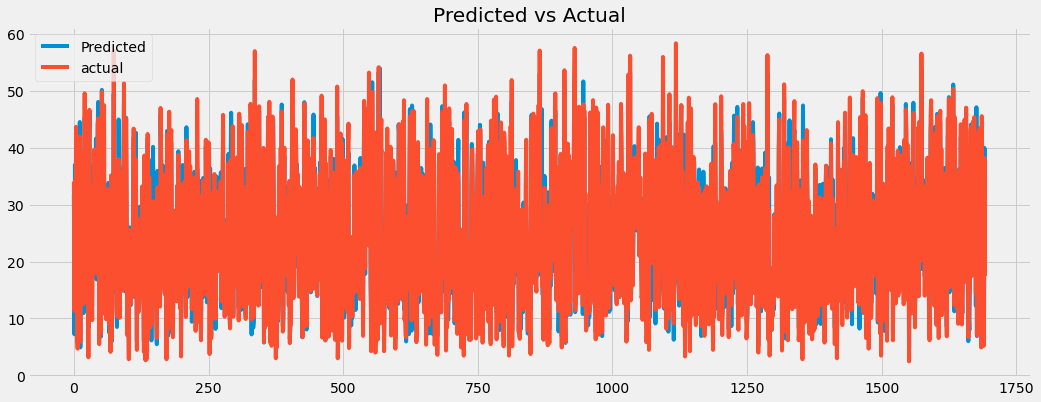

In [302]:
# Visualization
pred_vs_actual_visual(y_pred_rfreg,y_test)

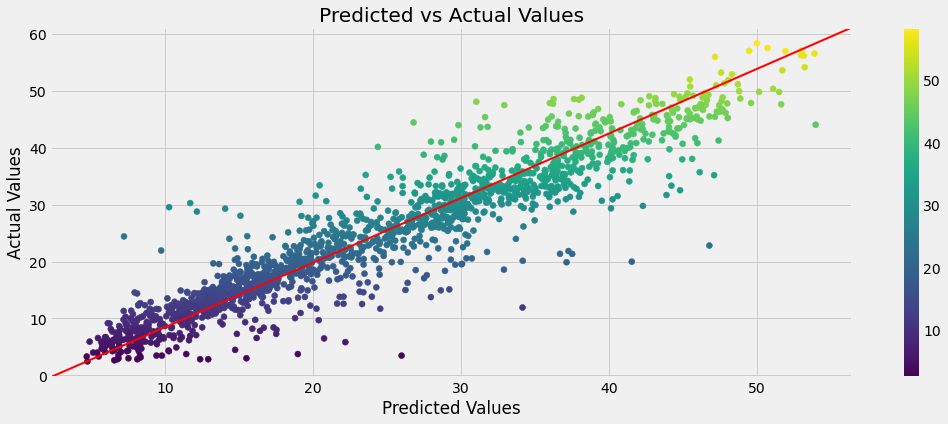

In [303]:
# Visualization
visualize_predictions_scatter(rf_reg,x_test,y_test)

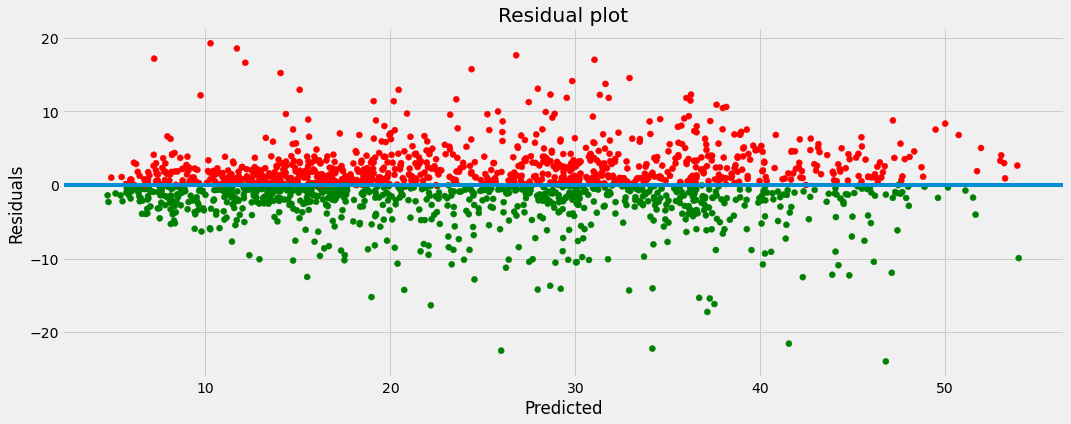

In [304]:
# Visualization
visualize_predictions_residual(rf_reg,x_test,y_test)

####2. Cross- Validation & Hyperparameter Tuning

In [305]:
# Define the parameter grid
param_grid = {'n_estimators': [25,40,50,70,80,90,100,125,135],
              'max_depth': [4,5,6,7,8,9,10,11],
              'min_samples_split': [2,3,4,5,6]}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='r2')  

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [25, 40, 50, 70, 80, 90, 100, 125,
                                          135]},
             scoring='r2')

In [306]:
# Showing best parameters
grid_search.best_params_

{'max_depth': 11, 'min_samples_split': 5, 'n_estimators': 100}

In [307]:
# Training decision tree regressor on optimal parameter.
rf_reg = RandomForestRegressor(n_estimators =70,max_depth = 11,min_samples_split = 4)
# Fitting the model
rf_reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=11, min_samples_split=4, n_estimators=70)

In [308]:
# Make predictions on the test set
y_pred_rfregcv = rf_reg.predict(x_test)

In [309]:
#calculate other metrics
mae = mean_absolute_error(y_test, y_pred_rfregcv)
mse = mean_squared_error(y_test, y_pred_rfregcv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rfregcv)
adj_r2 = 1 - ((1-r2)*(y_test.shape[0]-1)/(y_test.shape[0]-x_test.shape[1]-1))

# Print the results
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2_Score: ", r2)
print("adjusted_r2_score:", adj_r2)

MAE:  2.958375971065972
MSE:  18.549426219207266
RMSE:  4.3069044822479245
R2_Score:  0.8736810864479428
adjusted_r2_score: 0.8727788084939996


In [310]:
# Creating a dictionary of testing dataset metrics evaluation through GridSearchCV
test_dict={'Model':"Random Forest Regressor GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(r2,4),
            'adjusted_r2_score':round(adj_r2,4)}

In [311]:
# Creating a dataframe of metrices
testing_metrics_df = testing_metrics_df.append(test_dict,ignore_index = True)
testing_metrics_df

Model     MAE       MSE     RMSE  R2_Score  \
0                      Linear Regression  5.9437   62.8909   7.9304    0.5717   
1                       Ridge Regression  5.9556   63.0584   7.9409    0.5706   
2          Ridge Regression GridSearchCV  5.9556   63.0584   7.9409    0.5717   
3                       Lasso Regression  8.0939  101.6380  10.0816    0.3079   
4          Lasso Regression GridSearchCV  8.0939  101.6380  10.0816    0.5716   
5               Decision Tree Regression  3.6897   27.2288   5.2181    0.8146   
6  Decision Tree Regressior GridSearchCV  3.6897   27.2288   5.2181    0.8168   
7               Random Forest Regressior  2.7469   17.1487   4.1411    0.8832   
8   Random Forest Regressor GridSearchCV  2.7469   17.1487   4.1411    0.8737   

   adjusted_r2_score  
0             0.5687  
1             0.5675  
2             0.5686  
3             0.3029  
4             0.5685  
5             0.8133  
6             0.8155  
7             0.8824  
8             0.8728

####FEATURE IMPORTANCE PLOT


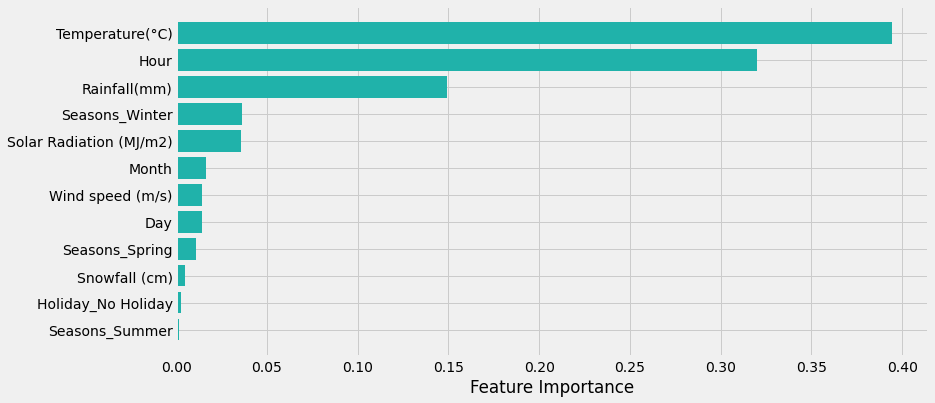

In [312]:
# get the feature importances
importances = rf_reg.feature_importances_

# sort the importances
sorted_idx = importances.argsort()

#create a bar plot
plt.figure(figsize=(12,6))
plt.barh(range(x_train.shape[1]), importances[sorted_idx],color='lightseagreen', align='center')
plt.yticks(range(x_train.shape[1]), x.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()

####ML Model - 6

<b>GRADIENT BOOSTING REGRESSOR

In [313]:
from sklearn.ensemble import GradientBoostingRegressor

In [314]:
# Initialize the gradient boosting regressor
gb_reg = GradientBoostingRegressor()

# Fit the gradient boosting regressor to the data
gb_reg.fit(x_train, y_train)

GradientBoostingRegressor()

In [315]:
# Predicting the model on train dataset.
y_pred_gbreg_train = gb_reg.predict(x_train)

# Predicting the model on test dataset.
y_pred_gbreg = gb_reg.predict(x_test)

####EVALUATION ON TRAINING DATASET

In [316]:
#calculating Mean Absolute Error
MAE = mean_absolute_error(y_train,y_pred_gbreg_train)
print('MAE :',MAE)

#Calculating Mean Squared Error
MSE = mean_squared_error(y_train,y_pred_gbreg_train)
print('MSE :',MSE)

#Calculating Root Mean Squared Error
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculating R2 Score
R2_score = r2_score(y_train,y_pred_gbreg_train)
print('r2_score :',R2_score)

MAE : 3.075592722854503
MSE : 19.460935929650162
RMSE : 4.411455080769854
r2_score : 0.860020127078454


In [317]:
# Calculating adjusted r2 score
adjusted_r2=adjusted_r2_score(R2_score,x_train.shape[0],x_train.shape[1])
print('adjusted_r2_score :',adjusted_r2)

adjusted_r2_score : 0.8597716053333647


In [318]:
# Creating a dictionary of training dataset metrics evaluation
train_dict={'Model':"Gradient Boosting Regressor",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(R2_score,4),
            'adjusted_r2_score':round(adjusted_r2,4)}

In [319]:
# Creating a dataframe of metrices
training_metrics_df = pd.DataFrame(train_dict,index = [1])
training_metrics_df

Model     MAE      MSE    RMSE  R2_Score  \
1  Gradient Boosting Regressor  3.0756  19.4609  4.4115      0.86   

   adjusted_r2_score  
1             0.8598

####EVALUATION ON TESTING DATASETS

In [320]:
#calculating Mean Absolute Error
MAE = mean_absolute_error(y_test,y_pred_gbreg)
print('MAE :',MAE)

#Calculating Mean Squared Error
MSE = mean_squared_error(y_test,y_pred_gbreg)
print('MSE :',MSE)

#Calculating Root Mean Squared Error
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculating R2 Score
R2_score = r2_score(y_test,y_pred_gbreg)
print('r2_score :',R2_score)

MAE : 3.2120871464639715
MSE : 21.781594651834393
RMSE : 4.6670755995413655
r2_score : 0.8516704862276541


In [321]:
# Calculating adjusted r2 score
adjusted_r2=adjusted_r2_score(R2_score,x_test.shape[0],x_test.shape[1])
print('adjusted_r2_score :',adjusted_r2)

adjusted_r2_score : 0.8506109897007087


In [322]:
# Creating a dictionary of testing dataset metrics evaluation
test_dict={'Model':"Gradient Boosting Regressor",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(R2_score,4),
            'adjusted_r2_score':round(adjusted_r2,4)}

In [323]:
# Creating a dataframe of metrices
testing_metrics_df = testing_metrics_df.append(test_dict,ignore_index = True)
testing_metrics_df

Model     MAE       MSE     RMSE  R2_Score  \
0                      Linear Regression  5.9437   62.8909   7.9304    0.5717   
1                       Ridge Regression  5.9556   63.0584   7.9409    0.5706   
2          Ridge Regression GridSearchCV  5.9556   63.0584   7.9409    0.5717   
3                       Lasso Regression  8.0939  101.6380  10.0816    0.3079   
4          Lasso Regression GridSearchCV  8.0939  101.6380  10.0816    0.5716   
5               Decision Tree Regression  3.6897   27.2288   5.2181    0.8146   
6  Decision Tree Regressior GridSearchCV  3.6897   27.2288   5.2181    0.8168   
7               Random Forest Regressior  2.7469   17.1487   4.1411    0.8832   
8   Random Forest Regressor GridSearchCV  2.7469   17.1487   4.1411    0.8737   
9            Gradient Boosting Regressor  3.2121   21.7816   4.6671    0.8517   

   adjusted_r2_score  
0             0.5687  
1             0.5675  
2             0.5686  
3             0.3029  
4             0.5685  
5             0.8133  
6             0.8155  
7             0.8824  
8             0.8728  
9             0.8506

####PREDICTED VS ACTUAL VISUALISATION

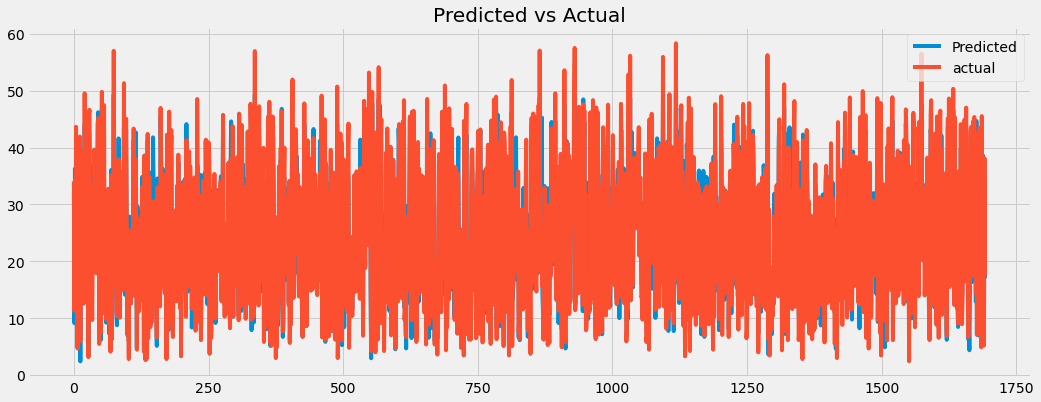

In [324]:
# Visualization
pred_vs_actual_visual(y_pred_gbreg,y_test)

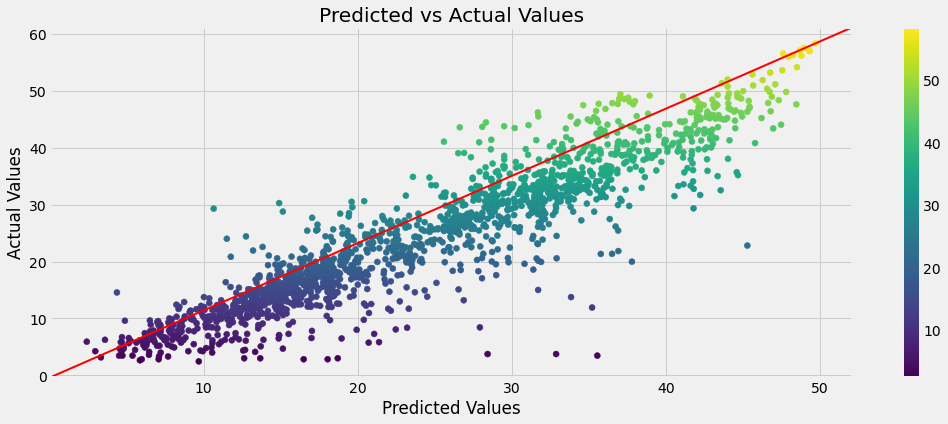

In [325]:
# Visualization
visualize_predictions_scatter(gb_reg,x_test,y_test)

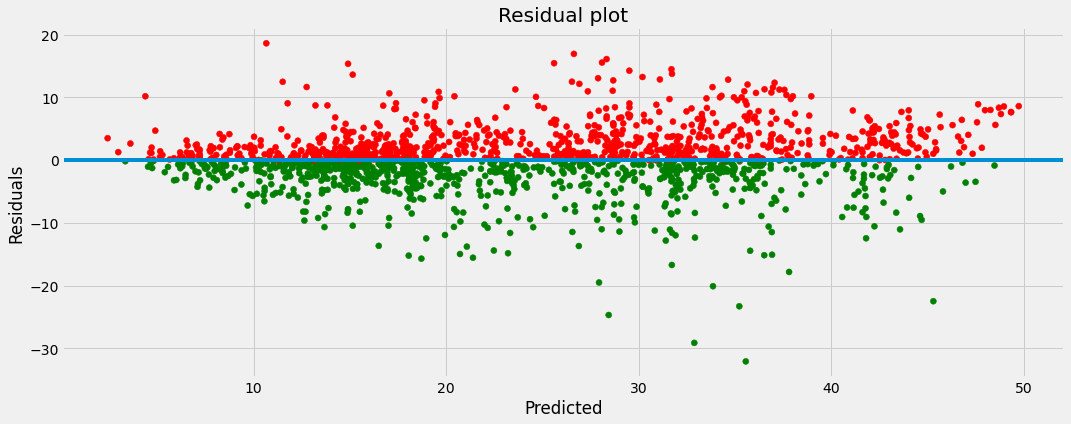

In [326]:
# Visualization
visualize_predictions_residual(gb_reg,x_test,y_test)

####2. Cross- Validation & Hyperparameter Tuning

In [327]:
# Define the parameter grid
param_grid = {'n_estimators': [50, 80,100,120,150],
              'learning_rate': [0.01,0.04,0.07,0.1, 0.3],
              'max_depth': [3,4,5,7,9,10],
              'subsample'    : [0.9, 0.5, 0.2, 0.1]}

# Initialize the gradient boosting regressor
gb_reg = GradientBoostingRegressor() 

# Initialize the GridSearchCV object
grid_search = GridSearchCV(gb_reg, param_grid, cv=5, scoring='r2',n_jobs=1)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.04, 0.07, 0.1, 0.3],
                         'max_depth': [3, 4, 5, 7, 9, 10],
                         'n_estimators': [50, 80, 100, 120, 150],
                         'subsample': [0.9, 0.5, 0.2, 0.1]},
             scoring='r2')

In [328]:
# Showing the best parameters
grid_search.best_params_

{'learning_rate': 0.07, 'max_depth': 9, 'n_estimators': 150, 'subsample': 0.9}

In [329]:
# Training Gradient boosting regressor on optimal parameter.
gb_reg = GradientBoostingRegressor(n_estimators = 150 ,learning_rate = 0.1,max_depth = 9,subsample = 0.9)
# Fitting the model
gb_reg.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=9, n_estimators=150, subsample=0.9)

In [330]:
# Make predictions on the test set
y_pred_gbregcv = gb_reg.predict(x_test)

In [331]:
#calculate other metrics
mae = mean_absolute_error(y_test, y_pred_gbregcv)
mse = mean_squared_error(y_test, y_pred_gbregcv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gbregcv)
adj_r2 = 1 - ((1-r2)*(y_test.shape[0]-1)/(y_test.shape[0]-x_test.shape[1]-1))

# Print the results
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2_Score: ", r2)
print("adjusted_r2_score:", adj_r2)

MAE:  2.438231171277265
MSE:  14.266037976620176
RMSE:  3.777040902164044
R2_Score:  0.9028503417516457
adjusted_r2_score: 0.9021564156213003


In [332]:
# Creating a dictionary of testing dataset metrics evaluation through GridSearchCV
test_dict={'Model':"Gradient Boosting Regressor GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(r2,4),
            'adjusted_r2_score':round(adj_r2,4)}

In [333]:
# Creating a dataframe of metrices
testing_metrics_df = testing_metrics_df.append(test_dict,ignore_index = True)
testing_metrics_df

Model     MAE       MSE     RMSE  \
0                          Linear Regression  5.9437   62.8909   7.9304   
1                           Ridge Regression  5.9556   63.0584   7.9409   
2              Ridge Regression GridSearchCV  5.9556   63.0584   7.9409   
3                           Lasso Regression  8.0939  101.6380  10.0816   
4              Lasso Regression GridSearchCV  8.0939  101.6380  10.0816   
5                   Decision Tree Regression  3.6897   27.2288   5.2181   
6      Decision Tree Regressior GridSearchCV  3.6897   27.2288   5.2181   
7                   Random Forest Regressior  2.7469   17.1487   4.1411   
8       Random Forest Regressor GridSearchCV  2.7469   17.1487   4.1411   
9                Gradient Boosting Regressor  3.2121   21.7816   4.6671   
10  Gradient Boosting Regressor GridSearchCV  3.2121   21.7816   4.6671   

    R2_Score  adjusted_r2_score  
0     0.5717             0.5687  
1     0.5706             0.5675  
2     0.5717             0.5686  
3     0.3079             0.3029  
4     0.5716             0.5685  
5     0.8146             0.8133  
6     0.8168             0.8155  
7     0.8832             0.8824  
8     0.8737             0.8728  
9     0.8517             0.8506  
10    0.9029             0.9022

####FEATURE IMPORTANCE PLOT

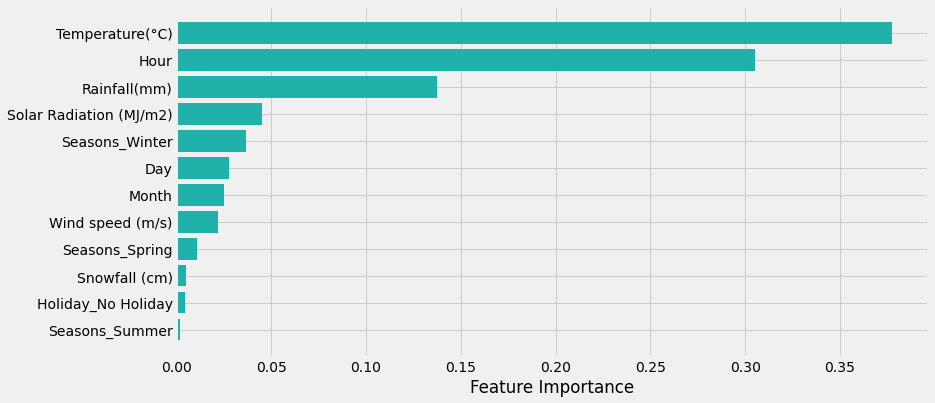

In [334]:
# get the feature importances
importances = gb_reg.feature_importances_

# sort the importances
sorted_idx = importances.argsort()

#create a bar plot
plt.figure(figsize=(12,6))
plt.barh(range(x_train.shape[1]), importances[sorted_idx],color='lightseagreen', align='center')
plt.yticks(range(x_train.shape[1]), x.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In case of a regression problem, the evaluation metrics that I would consider are:

1.Mean Absolute Error (MAE): MAE is a measure of how well the model predicts the true values of the target variable. It is the average absolute difference between the predicted and true values. MAE is a good metric to consider if the goal is to create a model that makes accurate predictions of the target variable.

2.Mean Squared Error (MSE): MSE is a measure of how well the model predicts the true values of the target variable. It is the average squared difference between the predicted and true values. MSE is a good metric to consider if the goal is to create a model that makes accurate predictions of the target variable, and also to identify the outliers.

3.Root Mean Squared Error (RMSE): RMSE is the square root of the MSE. It is a measure of how well the model predicts the true values of the target variable. It is the average difference between the predicted and true values. RMSE is a good metric to consider if the goal is to create a model that makes accurate predictions of the target variable, and also to identify the outliers.

4.R-squared (R2) score: R-squared is a measure of how well the model explains the variation in the target variable. It ranges from 0 to 1, where 1 indicates that the model explains all the variation in the target variable. R2 is a good metric to consider if the goal is to create a model that has a high correlation with the target variable.

5.Adjusted R-squared (Adj-R2) score: Adj-R2 is an adjusted version of the R2 score. It takes into account the number of predictors in the model, and ranges from 0 to 1, where 1 indicates that the model explains all the variation in the target variable. Adj-R2 is a good metric to consider if the goal is to create a model that has a high correlation with the target variable and also to identify if the model is overfitting or underfitting.

These are some of the most commonly used evaluation metrics in regression problems. Based on the specific requirements of the stakeholders and the business goal, the suitable evaluation metric can be chosen. For example, if the goal is to minimize the difference between the predicted and true values of the target variable, I would focus on MAE, MSE and RMSE. If the goal is to maximize the correlation between the predicted and true values of the target variable, I would focus on R2 and Adj-R2.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [335]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [336]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***